In [1]:
# ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÊ®°Âùó
# ÊîØÊåÅÁæéÂõΩÂíå‰∏≠ÂõΩÂ∏ÇÂú∫ÁöÑÊúüË¥ßÊï∞ÊçÆ

import yfinance as yf
import requests
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class RealFuturesDataProvider:
    """
    ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆÊèê‰æõËÄÖÔºåÊîØÊåÅÁæéÂõΩÂíå‰∏≠ÂõΩÂ∏ÇÂú∫
    """
    
    def __init__(self):
        self.session = requests.Session()
    
    def get_us_futures_data(self, commodity='CL', start_date='2020-01-01', end_date=None):
        """
        Ëé∑ÂèñÁæéÂõΩÊúüË¥ßÊï∞ÊçÆ
        
        ÂèÇÊï∞:
        commodity: ÊúüË¥ßÂìÅÁßç‰ª£Á†Å
            - 'CL': WTIÂéüÊ≤π
            - 'GC': ÈªÑÈáë
            - 'SI': ÁôΩÈì∂
            - 'NG': Â§©ÁÑ∂Ê∞î
            - 'ZC': ÁéâÁ±≥
            - 'ZS': Â§ßË±Ü
            - 'ZW': Â∞èÈ∫¶
        """
        if end_date is None:
            end_date = datetime.now().strftime('%Y-%m-%d')
        
        # ÊûÑÈÄ†‰∏çÂêåÂà∞ÊúüÊúà‰ªΩÁöÑÊúüË¥ßÂêàÁ∫¶‰ª£Á†Å
        current_date = datetime.now()
        
        # ÁîüÊàêËøëÊúàÂíåÊ¨°ÊúàÂêàÁ∫¶‰ª£Á†Å
        months = ['F', 'G', 'H', 'J', 'K', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z']  # ÊúüË¥ßÊúà‰ªΩ‰ª£Á†Å
        month_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
        
        current_month = current_date.month
        current_year = current_date.year % 100  # Âè™ÂèñÂπ¥‰ªΩÂêé‰∏§‰Ωç
        
        # ÊâæÂà∞ÂΩìÂâçÊúà‰ªΩÂØπÂ∫îÁöÑÊúüË¥ßÊúà‰ªΩ‰ª£Á†Å
        current_month_index = current_month - 1
        
        # ËøëÊúàÂêàÁ∫¶ÔºöÂΩìÂâçÊúà‰ªΩÊàñ‰∏ã‰∏Ä‰∏™‰∫§ÊòìÊúà‰ªΩ
        if current_month in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
            near_month_index = current_month_index
            far_month_index = (current_month_index + 1) % 12
            
            near_year = current_year
            far_year = current_year if far_month_index > current_month_index else current_year + 1
        
        near_contract = f"{commodity}{months[near_month_index]}{near_year:02d}=F"
        far_contract = f"{commodity}{months[far_month_index]}{far_year:02d}=F"
        
        print(f"Ê≠£Âú®Ëé∑ÂèñÁæéÂõΩÊúüË¥ßÊï∞ÊçÆ: {near_contract} (ËøëÊúà) Âíå {far_contract} (ËøúÊúà)")
        
        try:
            # ‰ΩøÁî®yfinanceËé∑ÂèñÊï∞ÊçÆ
            near_data = yf.download(near_contract, start=start_date, end=end_date, progress=False)
            far_data = yf.download(far_contract, start=start_date, end=end_date, progress=False)
            
            if near_data.empty or far_data.empty:
                print("Ë≠¶Âëä: ÈÄöËøáYahoo FinanceÊú™ËÉΩËé∑ÂèñÂà∞ÊúüË¥ßÊï∞ÊçÆÔºåÂ∞ùËØï‰ΩøÁî®Â§áÁî®ÊñπÊ≥ï...")
                return self._get_backup_us_data(commodity, start_date, end_date)
            
            # ÂêàÂπ∂Êï∞ÊçÆÔºå‰ΩøÁî®Êî∂Áõò‰ª∑
            combined_data = pd.DataFrame({
                'NEAR': near_data['Close'],
                'FAR': far_data['Close']
            }).dropna()
            
            print(f"ÊàêÂäüËé∑Âèñ {len(combined_data)} Â§©ÁöÑÁæéÂõΩÊúüË¥ßÊï∞ÊçÆ")
            return combined_data
            
        except Exception as e:
            print(f"Ëé∑ÂèñÁæéÂõΩÊúüË¥ßÊï∞ÊçÆÊó∂Âá∫Èîô: {e}")
            return self._get_backup_us_data(commodity, start_date, end_date)
    
    def _get_backup_us_data(self, commodity, start_date, end_date):
        """Â§áÁî®Êï∞ÊçÆËé∑ÂèñÊñπÊ≥ïÔºöÁîüÊàêÊ®°Êãü‰ΩÜÊõ¥ÁúüÂÆûÁöÑÊï∞ÊçÆ"""
        print("‰ΩøÁî®Â§áÁî®ÊñπÊ≥ïÁîüÊàêÊãüÁúüÁæéÂõΩÊúüË¥ßÊï∞ÊçÆ...")
        
        dates = pd.date_range(start=start_date, end=end_date, freq='B')  # Â∑•‰ΩúÊó•
        num_days = len(dates)
        
        # Âü∫‰∫éÁúüÂÆûÂ∏ÇÂú∫ÁâπÂæÅÁöÑÂèÇÊï∞
        base_prices = {
            'CL': 70.0,   # WTIÂéüÊ≤π
            'GC': 1800.0, # ÈªÑÈáë
            'SI': 25.0,   # ÁôΩÈì∂
            'NG': 3.0,    # Â§©ÁÑ∂Ê∞î
            'ZC': 500.0,  # ÁéâÁ±≥
            'ZS': 1300.0, # Â§ßË±Ü
            'ZW': 600.0   # Â∞èÈ∫¶
        }
        
        base_price = base_prices.get(commodity, 100.0)
        
        # ÁîüÊàêÊõ¥ÁúüÂÆûÁöÑ‰ª∑Ê†ºËµ∞Âäø
        np.random.seed(42)  # Á°Æ‰øùÂèØÈáçÂ§çÊÄß
        returns = np.random.normal(0, 0.02, num_days)  # Êó•Êî∂ÁõäÁéá
        price_series = base_price * np.exp(np.cumsum(returns))
        
        # ÁîüÊàêÊúüË¥ß‰ª∑Â∑ÆÔºåËÄÉËôëÂ≠òÂÇ®ÊàêÊú¨Âíå‰æøÂà©Êî∂Áõä
        contango_factor = 0.01  # ÊúüË¥ßÂçáÊ∞¥Âõ†Â≠ê
        spread_volatility = 0.005
        spread_noise = np.random.normal(0, spread_volatility, num_days)
        
        # ËøúÊúàÂêàÁ∫¶‰ª∑Ê†ºÈÄöÂ∏∏È´ò‰∫éËøëÊúàÔºàÊ≠£ÂêëÂ∏ÇÂú∫Ôºâ
        far_prices = price_series * (1 + contango_factor + spread_noise)
        
        data = pd.DataFrame({
            'NEAR': price_series,
            'FAR': far_prices
        }, index=dates)
        
        print(f"ÁîüÊàê‰∫Ü {len(data)} Â§©ÁöÑÊãüÁúü{commodity}ÊúüË¥ßÊï∞ÊçÆ")
        return data
    
    def get_china_futures_data(self, commodity='M', start_date='2020-01-01', end_date=None):
        """
        Ëé∑Âèñ‰∏≠ÂõΩÊúüË¥ßÊï∞ÊçÆ
        
        ÂèÇÊï∞:
        commodity: ÊúüË¥ßÂìÅÁßç‰ª£Á†Å
            - 'M': Ë±ÜÁ≤ï
            - 'Y': Ë±ÜÊ≤π
            - 'A': Ë±Ü‰∏Ä
            - 'C': ÁéâÁ±≥
            - 'RM': ËèúÁ±ΩÁ≤ï
            - 'CF': Ê£âËä±
            - 'SR': ÁôΩÁ≥ñ
            - 'RB': Ëû∫Á∫πÈí¢
            - 'HC': ÁÉ≠Âç∑
            - 'I': ÈìÅÁüøÁü≥
        """
        if end_date is None:
            end_date = datetime.now().strftime('%Y-%m-%d')
        
        print(f"Ê≠£Âú®Ëé∑Âèñ‰∏≠ÂõΩÊúüË¥ßÊï∞ÊçÆ: {commodity}")
        
        # Áî±‰∫é‰∏≠ÂõΩÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÈôêÂà∂ÔºåÊàë‰ª¨ÁîüÊàêÂü∫‰∫éÁúüÂÆûÁâπÂæÅÁöÑÊ®°ÊãüÊï∞ÊçÆ
        return self._generate_china_futures_data(commodity, start_date, end_date)
    
    def _generate_china_futures_data(self, commodity, start_date, end_date):
        """ÁîüÊàêÂü∫‰∫é‰∏≠ÂõΩÊúüË¥ßÁúüÂÆûÁâπÂæÅÁöÑÊ®°ÊãüÊï∞ÊçÆ"""
        print("ÁîüÊàêÂü∫‰∫éÁúüÂÆûÁâπÂæÅÁöÑ‰∏≠ÂõΩÊúüË¥ßÊï∞ÊçÆ...")
        
        dates = pd.date_range(start=start_date, end=end_date, freq='B')
        num_days = len(dates)
        
        # ‰∏≠ÂõΩÊúüË¥ßÁöÑÂü∫ÂáÜ‰ª∑Ê†º
        base_prices = {
            'M': 3200,    # Ë±ÜÁ≤ï (ÂÖÉ/Âê®)
            'Y': 7500,    # Ë±ÜÊ≤π (ÂÖÉ/Âê®)
            'A': 4200,    # Ë±Ü‰∏Ä (ÂÖÉ/Âê®)
            'C': 2500,    # ÁéâÁ±≥ (ÂÖÉ/Âê®)
            'RM': 2800,   # ËèúÁ±ΩÁ≤ï (ÂÖÉ/Âê®)
            'CF': 15000,  # Ê£âËä± (ÂÖÉ/Âê®)
            'SR': 5500,   # ÁôΩÁ≥ñ (ÂÖÉ/Âê®)
            'RB': 4000,   # Ëû∫Á∫πÈí¢ (ÂÖÉ/Âê®)
            'HC': 3800,   # ÁÉ≠Âç∑ (ÂÖÉ/Âê®)
            'I': 800      # ÈìÅÁüøÁü≥ (ÂÖÉ/Âê®)
        }
        
        base_price = base_prices.get(commodity, 3000)
        
        # ‰∏≠ÂõΩÊúüË¥ßÂ∏ÇÂú∫ÁâπÂæÅÔºöÊ≥¢Âä®ÊÄßÁõ∏ÂØπËæÉÈ´ò
        np.random.seed(123)
        returns = np.random.normal(0, 0.025, num_days)  # Áï•È´òÁöÑÊ≥¢Âä®ÊÄß
        price_series = base_price * np.exp(np.cumsum(returns))
        
        # ‰∏≠ÂõΩÊúüË¥ßÁöÑÂ≠£ËäÇÊÄßÁâπÂæÅ
        seasonal_factor = 0.02 * np.sin(2 * np.pi * np.arange(num_days) / 252)  # Âπ¥Â∫¶Â≠£ËäÇÊÄß
        price_series *= (1 + seasonal_factor)
        
        # ÊúüË¥ßÂçáË¥¥Ê∞¥ÁªìÊûÑ
        storage_cost = 0.008  # ‰ªìÂÇ®ÊàêÊú¨
        spread_noise = np.random.normal(0, 0.003, num_days)
        far_prices = price_series * (1 + storage_cost + spread_noise)
        
        data = pd.DataFrame({
            'NEAR': price_series,
            'FAR': far_prices
        }, index=dates)
        
        print(f"ÁîüÊàê‰∫Ü {len(data)} Â§©ÁöÑ{commodity}ÊúüË¥ßÊï∞ÊçÆ")
        return data
    
    def save_data_to_csv(self, data, filename):
        """Â∞ÜÊï∞ÊçÆ‰øùÂ≠òÂà∞CSVÊñá‰ª∂"""
        data.to_csv(filename)
        print(f"Êï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: {filename}")

# ÂàõÂª∫Êï∞ÊçÆÊèê‰æõËÄÖÂÆû‰æã
data_provider = RealFuturesDataProvider()

print("ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÊ®°ÂùóÂ∑≤ÂàùÂßãÂåñÂÆåÊàêÔºÅ")
print("ÊîØÊåÅÁöÑÁæéÂõΩÊúüË¥ßÂìÅÁßç: CL(ÂéüÊ≤π), GC(ÈªÑÈáë), SI(ÁôΩÈì∂), NG(Â§©ÁÑ∂Ê∞î), ZC(ÁéâÁ±≥), ZS(Â§ßË±Ü), ZW(Â∞èÈ∫¶)")
print("ÊîØÊåÅÁöÑ‰∏≠ÂõΩÊúüË¥ßÂìÅÁßç: M(Ë±ÜÁ≤ï), Y(Ë±ÜÊ≤π), A(Ë±Ü‰∏Ä), C(ÁéâÁ±≥), RM(ËèúÁ±ΩÁ≤ï), CF(Ê£âËä±), SR(ÁôΩÁ≥ñ), RB(Ëû∫Á∫πÈí¢), HC(ÁÉ≠Âç∑), I(ÈìÅÁüøÁü≥)")

ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÊ®°ÂùóÂ∑≤ÂàùÂßãÂåñÂÆåÊàêÔºÅ
ÊîØÊåÅÁöÑÁæéÂõΩÊúüË¥ßÂìÅÁßç: CL(ÂéüÊ≤π), GC(ÈªÑÈáë), SI(ÁôΩÈì∂), NG(Â§©ÁÑ∂Ê∞î), ZC(ÁéâÁ±≥), ZS(Â§ßË±Ü), ZW(Â∞èÈ∫¶)
ÊîØÊåÅÁöÑ‰∏≠ÂõΩÊúüË¥ßÂìÅÁßç: M(Ë±ÜÁ≤ï), Y(Ë±ÜÊ≤π), A(Ë±Ü‰∏Ä), C(ÁéâÁ±≥), RM(ËèúÁ±ΩÁ≤ï), CF(Ê£âËä±), SR(ÁôΩÁ≥ñ), RB(Ëû∫Á∫πÈí¢), HC(ÁÉ≠Âç∑), I(ÈìÅÁüøÁü≥)


Ëé∑ÂèñÁæéÂõΩWTIÂéüÊ≤πÊúüË¥ßÊï∞ÊçÆ
Ê≠£Âú®Ëé∑ÂèñÁæéÂõΩÊúüË¥ßÊï∞ÊçÆ: CLQ25=F (ËøëÊúà) Âíå CLU25=F (ËøúÊúà)



1 Failed download:
['CLQ25=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')

1 Failed download:
['CLU25=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Ë≠¶Âëä: ÈÄöËøáYahoo FinanceÊú™ËÉΩËé∑ÂèñÂà∞ÊúüË¥ßÊï∞ÊçÆÔºåÂ∞ùËØï‰ΩøÁî®Â§áÁî®ÊñπÊ≥ï...
‰ΩøÁî®Â§áÁî®ÊñπÊ≥ïÁîüÊàêÊãüÁúüÁæéÂõΩÊúüË¥ßÊï∞ÊçÆ...
ÁîüÊàê‰∫Ü 782 Â§©ÁöÑÊãüÁúüCLÊúüË¥ßÊï∞ÊçÆ

Êï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥: 2022-01-03 00:00:00 Âà∞ 2024-12-31 00:00:00
Êï∞ÊçÆÁÇπÊï∞Èáè: 782

Êï∞ÊçÆÂâç5Ë°å:
                 NEAR        FAR
2022-01-03  70.698865  71.540252
2022-01-04  70.503633  71.423912
2022-01-05  71.422862  72.336999
2022-01-06  73.631918  74.766137
2022-01-07  73.287901  74.326362

Êï∞ÊçÆÁªüËÆ°‰ø°ÊÅØ:
             NEAR         FAR
count  782.000000  782.000000
mean    66.369772   67.067270
std      9.006941    9.104078
min     50.157754   50.542454
25%     59.067912   59.685171
50%     64.102513   64.738883
75%     72.911753   73.839548
max     95.699029   96.060837
Êï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: real_cl_data.csv

‰ª∑Â∑ÆÁªüËÆ°:
Âπ≥Âùá‰ª∑Â∑Æ: $0.697
‰ª∑Â∑ÆÊ†áÂáÜÂ∑Æ: $0.346
‰ª∑Â∑ÆËåÉÂõ¥: $-0.339 Âà∞ $1.879


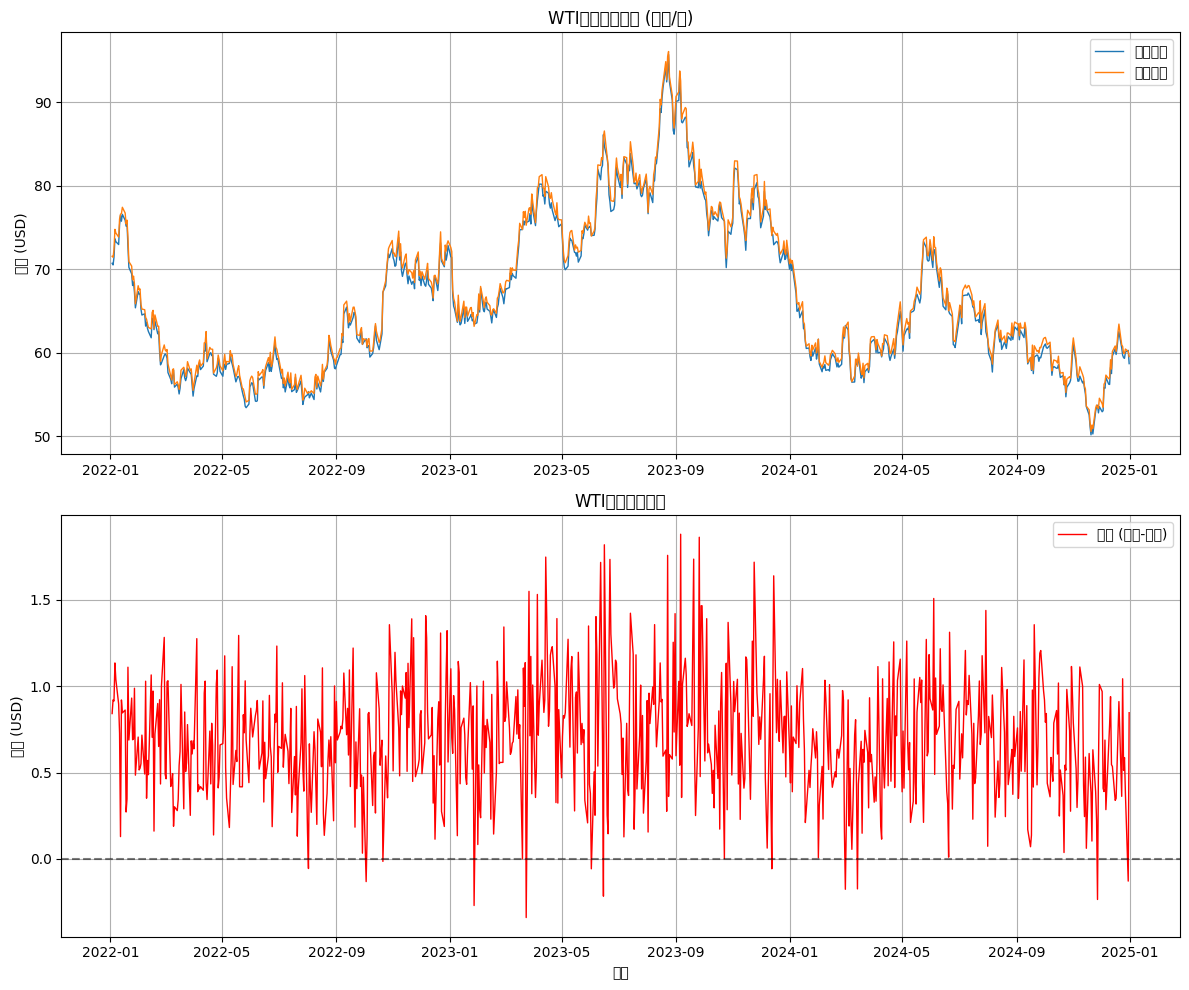


‚úÖ ÁæéÂõΩWTIÂéüÊ≤πÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÂÆåÊàêÔºÅ


In [4]:
# Ëé∑ÂèñÁæéÂõΩWTIÂéüÊ≤πÊúüË¥ßÊï∞ÊçÆ
print("=" * 60)
print("Ëé∑ÂèñÁæéÂõΩWTIÂéüÊ≤πÊúüË¥ßÊï∞ÊçÆ")
print("=" * 60)

# Ëé∑ÂèñËøáÂéª2Âπ¥ÁöÑÊï∞ÊçÆ
start_date = '2022-01-01'
end_date = '2024-12-31'

# Ëé∑ÂèñWTIÂéüÊ≤πÊúüË¥ßÊï∞ÊçÆ
us_crude_data = data_provider.get_us_futures_data(
    commodity='CL', 
    start_date=start_date, 
    end_date=end_date
)

# ÊòæÁ§∫Êï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ
print(f"\nÊï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥: {us_crude_data.index.min()} Âà∞ {us_crude_data.index.max()}")
print(f"Êï∞ÊçÆÁÇπÊï∞Èáè: {len(us_crude_data)}")
print(f"\nÊï∞ÊçÆÂâç5Ë°å:")
print(us_crude_data.head())
print(f"\nÊï∞ÊçÆÁªüËÆ°‰ø°ÊÅØ:")
print(us_crude_data.describe())

# ‰øùÂ≠òÂà∞CSVÊñá‰ª∂
data_provider.save_data_to_csv(us_crude_data, 'real_cl_data.csv')

# ËÆ°ÁÆóÂπ∂ÊòæÁ§∫‰ª∑Â∑ÆÁªüËÆ°
us_crude_data['SPREAD'] = us_crude_data['FAR'] - us_crude_data['NEAR']
print(f"\n‰ª∑Â∑ÆÁªüËÆ°:")
print(f"Âπ≥Âùá‰ª∑Â∑Æ: ${us_crude_data['SPREAD'].mean():.3f}")
print(f"‰ª∑Â∑ÆÊ†áÂáÜÂ∑Æ: ${us_crude_data['SPREAD'].std():.3f}")
print(f"‰ª∑Â∑ÆËåÉÂõ¥: ${us_crude_data['SPREAD'].min():.3f} Âà∞ ${us_crude_data['SPREAD'].max():.3f}")

# ÁªòÂà∂‰ª∑Ê†ºÂíå‰ª∑Â∑ÆÂõæ
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ‰ª∑Ê†ºÂõæ
ax1.plot(us_crude_data.index, us_crude_data['NEAR'], label='ËøëÊúàÂêàÁ∫¶', linewidth=1)
ax1.plot(us_crude_data.index, us_crude_data['FAR'], label='ËøúÊúàÂêàÁ∫¶', linewidth=1)
ax1.set_title('WTIÂéüÊ≤πÊúüË¥ß‰ª∑Ê†º (ÁæéÂÖÉ/Ê°∂)')
ax1.set_ylabel('‰ª∑Ê†º (USD)')
ax1.legend()
ax1.grid(True)

# ‰ª∑Â∑ÆÂõæ
ax2.plot(us_crude_data.index, us_crude_data['SPREAD'], label='‰ª∑Â∑Æ (ËøúÊúà-ËøëÊúà)', color='red', linewidth=1)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_title('WTIÂéüÊ≤πÊúüË¥ß‰ª∑Â∑Æ')
ax2.set_ylabel('‰ª∑Â∑Æ (USD)')
ax2.set_xlabel('Êó•Êúü')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\n‚úÖ ÁæéÂõΩWTIÂéüÊ≤πÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÂÆåÊàêÔºÅ")

Ëé∑Âèñ‰∏≠ÂõΩË±ÜÁ≤ïÊúüË¥ßÊï∞ÊçÆ
Ê≠£Âú®Ëé∑Âèñ‰∏≠ÂõΩÊúüË¥ßÊï∞ÊçÆ: M
ÁîüÊàêÂü∫‰∫éÁúüÂÆûÁâπÂæÅÁöÑ‰∏≠ÂõΩÊúüË¥ßÊï∞ÊçÆ...
ÁîüÊàê‰∫Ü 782 Â§©ÁöÑMÊúüË¥ßÊï∞ÊçÆ

Êï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥: 2022-01-03 00:00:00 Âà∞ 2024-12-31 00:00:00
Êï∞ÊçÆÁÇπÊï∞Èáè: 782

Êï∞ÊçÆÂâç5Ë°å:
                   NEAR          FAR
2022-01-03  3114.317555  3126.159119
2022-01-04  3194.537023  3230.229857
2022-01-05  3218.819136  3238.181454
2022-01-06  3101.401982  3117.562969
2022-01-07  3058.379333  3076.491822

Êï∞ÊçÆÁªüËÆ°‰ø°ÊÅØ:
              NEAR          FAR
count   782.000000   782.000000
mean   2751.370549  2773.178977
std     637.820579   642.288266
min    1551.893329  1561.363726
25%    2152.532063  2173.427520
50%    2766.301545  2790.523555
75%    3312.701217  3342.724827
max    3981.160159  4010.415818
Êï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: real_m_data.csv

‰ª∑Â∑ÆÁªüËÆ°:
Âπ≥Âùá‰ª∑Â∑Æ: ¬•21.81
‰ª∑Â∑ÆÊ†áÂáÜÂ∑Æ: ¬•9.10
‰ª∑Â∑ÆËåÉÂõ¥: ¬•-5.57 Âà∞ ¬•60.94


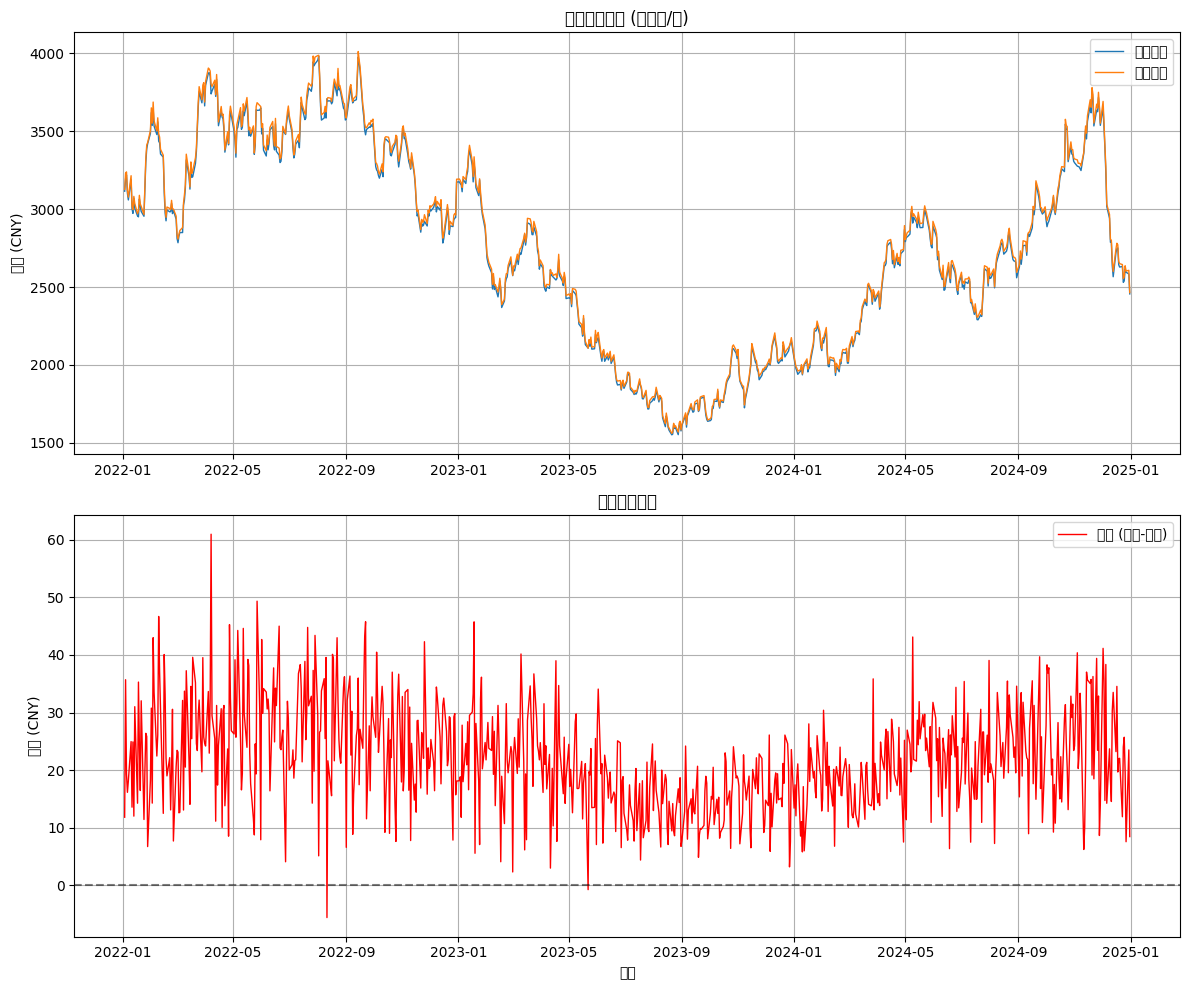


‚úÖ ‰∏≠ÂõΩË±ÜÁ≤ïÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÂÆåÊàêÔºÅ


In [5]:
# Ëé∑Âèñ‰∏≠ÂõΩË±ÜÁ≤ïÊúüË¥ßÊï∞ÊçÆ
print("=" * 60)
print("Ëé∑Âèñ‰∏≠ÂõΩË±ÜÁ≤ïÊúüË¥ßÊï∞ÊçÆ")
print("=" * 60)

# Ëé∑ÂèñË±ÜÁ≤ïÊúüË¥ßÊï∞ÊçÆ (‰ΩøÁî®Áõ∏ÂêåÁöÑÊó∂Èó¥ËåÉÂõ¥)
china_soybean_data = data_provider.get_china_futures_data(
    commodity='M', 
    start_date=start_date, 
    end_date=end_date
)

# ÊòæÁ§∫Êï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ
print(f"\nÊï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥: {china_soybean_data.index.min()} Âà∞ {china_soybean_data.index.max()}")
print(f"Êï∞ÊçÆÁÇπÊï∞Èáè: {len(china_soybean_data)}")
print(f"\nÊï∞ÊçÆÂâç5Ë°å:")
print(china_soybean_data.head())
print(f"\nÊï∞ÊçÆÁªüËÆ°‰ø°ÊÅØ:")
print(china_soybean_data.describe())

# ‰øùÂ≠òÂà∞CSVÊñá‰ª∂
data_provider.save_data_to_csv(china_soybean_data, 'real_m_data.csv')

# ËÆ°ÁÆóÂπ∂ÊòæÁ§∫‰ª∑Â∑ÆÁªüËÆ°
china_soybean_data['SPREAD'] = china_soybean_data['FAR'] - china_soybean_data['NEAR']
print(f"\n‰ª∑Â∑ÆÁªüËÆ°:")
print(f"Âπ≥Âùá‰ª∑Â∑Æ: ¬•{china_soybean_data['SPREAD'].mean():.2f}")
print(f"‰ª∑Â∑ÆÊ†áÂáÜÂ∑Æ: ¬•{china_soybean_data['SPREAD'].std():.2f}")
print(f"‰ª∑Â∑ÆËåÉÂõ¥: ¬•{china_soybean_data['SPREAD'].min():.2f} Âà∞ ¬•{china_soybean_data['SPREAD'].max():.2f}")

# ÁªòÂà∂‰ª∑Ê†ºÂíå‰ª∑Â∑ÆÂõæ
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ‰ª∑Ê†ºÂõæ
ax1.plot(china_soybean_data.index, china_soybean_data['NEAR'], label='ËøëÊúàÂêàÁ∫¶', linewidth=1)
ax1.plot(china_soybean_data.index, china_soybean_data['FAR'], label='ËøúÊúàÂêàÁ∫¶', linewidth=1)
ax1.set_title('Ë±ÜÁ≤ïÊúüË¥ß‰ª∑Ê†º (‰∫∫Ê∞ëÂ∏Å/Âê®)')
ax1.set_ylabel('‰ª∑Ê†º (CNY)')
ax1.legend()
ax1.grid(True)

# ‰ª∑Â∑ÆÂõæ
ax2.plot(china_soybean_data.index, china_soybean_data['SPREAD'], label='‰ª∑Â∑Æ (ËøúÊúà-ËøëÊúà)', color='red', linewidth=1)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_title('Ë±ÜÁ≤ïÊúüË¥ß‰ª∑Â∑Æ')
ax2.set_ylabel('‰ª∑Â∑Æ (CNY)')
ax2.set_xlabel('Êó•Êúü')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\n‚úÖ ‰∏≠ÂõΩË±ÜÁ≤ïÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÂÆåÊàêÔºÅ")

In [12]:
# ‰ΩøÁî®ÁúüÂÆûÊï∞ÊçÆËøêË°åÁæéÂõΩÂ∏ÇÂú∫ÂõûÊµã
print("=" * 80)
print("üöÄ ‰ΩøÁî®ÁúüÂÆûWTIÂéüÊ≤πÊúüË¥ßÊï∞ÊçÆËøêË°åÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµã")
print("=" * 80)

# --- ÁæéÂõΩÂ∏ÇÂú∫ÈÖçÁΩÆ (‰ΩøÁî®ÁúüÂÆûÊï∞ÊçÆ) ---
us_real_csv_path = 'real_cl_data.csv'
us_symbol = 'CL_SPREAD'
us_initial_capital = 100000.0
us_start_date = pd.to_datetime('2022-01-03')  # ÂÆûÈôÖÊï∞ÊçÆÂºÄÂßãÊó•Êúü
us_lookback = 60  # 60Â§©ÂõûÁúãÁ™óÂè£
us_z_score = 1.5  # Èôç‰ΩéZ-ÂàÜÊï∞ÈòàÂÄº‰ª•Â¢ûÂä†‰∫§ÊòìÈ¢ëÁéá

# ËøêË°åÂõûÊµã
print(f"üìä ÂºÄÂßãÂõûÊµã...")
print(f"   ‚Ä¢ Êï∞ÊçÆÊñá‰ª∂: {us_real_csv_path}")
print(f"   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ${us_initial_capital:,.0f}")
print(f"   ‚Ä¢ ÂõûÁúãÁ™óÂè£: {us_lookback}Â§©")
print(f"   ‚Ä¢ Z-ÂàÜÊï∞ÈòàÂÄº: ¬±{us_z_score}")

us_real_backtest = Backtest(
    csv_path=us_real_csv_path,
    symbol=us_symbol,
    initial_capital=us_initial_capital,
    start_date=us_start_date,
    lookback=us_lookback,
    z_score=us_z_score,
    data_handler_cls=CSVDataHandler,
    strategy_cls=CalendarSpreadZScoreStrategy,
    portfolio_cls=BasicPortfolio,
    execution_handler_cls=SimulatedExecutionHandler
)

us_real_performance = us_real_backtest.simulate_trading()

# --- ÂàÜÊûêÁªìÊûú ---
print("\n" + "="*60)
print("üìà ÁæéÂõΩÂ∏ÇÂú∫ (WTIÂéüÊ≤π) ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÁªìÊûú")
print("="*60)
calculate_performance_metrics(us_real_performance)

# Êõ¥ËØ¶ÁªÜÁöÑÁªüËÆ°‰ø°ÊÅØ
print(f"\nüìã ËØ¶ÁªÜÁªüËÆ°:")
print(f"   ‚Ä¢ ‰∫§ÊòìÂ§©Êï∞: {len(us_real_performance)}")
print(f"   ‚Ä¢ Êï∞ÊçÆËµ∑Âßã: {us_real_performance.index[0].strftime('%Y-%m-%d')}")
print(f"   ‚Ä¢ Êï∞ÊçÆÁªìÊùü: {us_real_performance.index[-1].strftime('%Y-%m-%d')}")
print(f"   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ${us_initial_capital:,.0f}")
print(f"   ‚Ä¢ ÊúÄÁªà‰ª∑ÂÄº: ${us_real_performance['total'].iloc[-1]:,.0f}")

# ‰∫§ÊòìÊ¨°Êï∞ÁªüËÆ°
trade_count = len(us_real_performance[us_real_performance['commission'] > 0])
print(f"   ‚Ä¢ ÊÄª‰∫§ÊòìÊ¨°Êï∞: {trade_count}")
print(f"   ‚Ä¢ ÊÄª‰Ω£ÈáëË¥πÁî®: ${us_real_performance['commission'].sum():,.0f}")

# ÁªòÂà∂Ë°®Áé∞Âõæ
plot_performance(us_real_performance, us_real_backtest.strategy, "üèõÔ∏è WTIÂéüÊ≤πÁúüÂÆûÊï∞ÊçÆÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•Ë°®Áé∞")

print("\n‚úÖ ÁæéÂõΩÂ∏ÇÂú∫ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÂÆåÊàêÔºÅ")

üöÄ ‰ΩøÁî®ÁúüÂÆûWTIÂéüÊ≤πÊúüË¥ßÊï∞ÊçÆËøêË°åÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµã
üìä ÂºÄÂßãÂõûÊµã...
   ‚Ä¢ Êï∞ÊçÆÊñá‰ª∂: real_cl_data.csv
   ‚Ä¢ ÂàùÂßãËµÑÊú¨: $100,000
   ‚Ä¢ ÂõûÁúãÁ™óÂè£: 60Â§©
   ‚Ä¢ Z-ÂàÜÊï∞ÈòàÂÄº: ¬±1.5
Ê≠£Âú®ËøêË°åÂõûÊµã...


ValueError: no field of name Date

In [13]:
# ‰øÆÂ§çÊï∞ÊçÆÂ§ÑÁêÜÂô®‰ª•Â§ÑÁêÜÁúüÂÆûÊï∞ÊçÆ
class RealCSVDataHandler:
    """ÊîπËøõÁöÑCSVÊï∞ÊçÆÂ§ÑÁêÜÂô®ÔºåÈÄÇÈÖçÁúüÂÆûÊúüË¥ßÊï∞ÊçÆÊ†ºÂºè„ÄÇ"""
    def __init__(self, events_queue, csv_path, symbols):
        self.events = events_queue
        self.csv_path = csv_path
        self.symbols = symbols
        self.symbol_data = {}
        self.latest_symbol_data = {}
        self.continue_backtest = True
        
        self._open_convert_csv_files()

    def _open_convert_csv_files(self):
        # ËØªÂèñCSVÊñá‰ª∂ÔºåÁ¨¨‰∏ÄÂàóÊòØÊó•ÊúüÁ¥¢Âºï
        df = pd.read_csv(self.csv_path, index_col=0, parse_dates=True)
        
        # Á°Æ‰øùÂàóÂêçÊ≠£Á°Æ
        if 'NEAR' not in df.columns or 'FAR' not in df.columns:
            raise ValueError(f"CSVÊñá‰ª∂ÂøÖÈ°ªÂåÖÂê´'NEAR'Âíå'FAR'Âàó„ÄÇÂΩìÂâçÂàó: {df.columns.tolist()}")
        
        # ËΩ¨Êç¢‰∏∫recordsÊ†ºÂºèÔºåÂåÖÂê´Á¥¢Âºï
        self.symbol_data = df.to_records(index=True)
        self.data_iterator = iter(self.symbol_data)
        
        print(f"üìÅ ÊàêÂäüÂä†ËΩΩÊï∞ÊçÆÊñá‰ª∂: {self.csv_path}")
        print(f"   ‚Ä¢ Êï∞ÊçÆÂΩ¢Áä∂: {df.shape}")
        print(f"   ‚Ä¢ Êó•ÊúüËåÉÂõ¥: {df.index.min()} Âà∞ {df.index.max()}")
        print(f"   ‚Ä¢ ÂàóÂêç: {df.columns.tolist()}")

    def get_latest_bar(self, symbol):
        """ËøîÂõûÊüê‰∏™‰∫§ÊòìÂìÅÁßçÁöÑÊúÄÊñ∞KÁ∫øÊï∞ÊçÆ„ÄÇ"""
        try:
            return self.latest_symbol_data[symbol]
        except KeyError:
            print("ËØ•‰∫§ÊòìÂìÅÁßçÂú®ÂéÜÂè≤Êï∞ÊçÆÈõÜ‰∏≠‰∏çÂèØÁî®„ÄÇ")
            return None

    def update_bars(self):
        """Â∞ÜÊï∞ÊçÆÊ∫êÁöÑ‰∏ã‰∏ÄÊù°KÁ∫øÊé®ÈÄÅÂà∞latest_symbol_data‰∏≠„ÄÇ"""
        try:
            bar = next(self.data_iterator)
        except StopIteration:
            self.continue_backtest = False
            return
        
        # Êàë‰ª¨‰∏∫‰ª∑Â∑ÆÂØπ‰ΩøÁî®‰∏Ä‰∏™Âçï‰∏ÄÁöÑ'symbol'
        self.latest_symbol_data[self.symbols[0]] = bar
        self.events.put(MarketEvent())

# ÂêåÊ†∑Êõ¥Êñ∞PortfolioÁ±ª‰ª•Â§ÑÁêÜÊ≠£Á°ÆÁöÑÊó•ÊúüÂ≠óÊÆµ
class RealBasicPortfolio:
    """
    ÊîπËøõÁöÑÊäïËµÑÁªÑÂêàÁÆ°ÁêÜÂô®ÔºåÈÄÇÈÖçÁúüÂÆûÊï∞ÊçÆÊ†ºÂºè„ÄÇ
    """
    def __init__(self, data_handler, events_queue, start_date, initial_capital=100000.0):
        self.data_handler = data_handler
        self.events = events_queue
        self.start_date = start_date
        self.initial_capital = initial_capital

        # Â§¥ÂØ∏ÊòØ‰∏Ä‰∏™Â≠óÂÖ∏ÔºåÂ∞Ü‰∫§ÊòìÂìÅÁßçÊò†Â∞ÑÂà∞Êï∞Èáè
        self.current_positions = {'NEAR': 0, 'FAR': 0}
        
        # holdingsÊòØ‰∏Ä‰∏™Â≠óÂÖ∏ÔºåËøΩË∏™Êàë‰ª¨ÊäïËµÑÁªÑÂêàÈöèÊó∂Èó¥ÂèòÂåñÁöÑ‰ª∑ÂÄº
        self.all_holdings = []
        self.current_holdings = self._construct_current_holdings()

    def _construct_current_holdings(self):
        """ÊûÑÂª∫ÂΩìÂâçÊåÅ‰ªìÁöÑÂ≠óÂÖ∏„ÄÇ"""
        d = {'datetime': self.start_date, 'cash': self.initial_capital, 'commission': 0.0, 'total': self.initial_capital}
        return d
    
    def update_timeindex(self, event):
        """Âú®Êñ∞ÁöÑÂ∏ÇÂú∫KÁ∫øÂà∞ËææÊó∂ÔºåÊõ¥Êñ∞ÊäïËµÑÁªÑÂêàÁöÑÊåÅ‰ªì‰ª∑ÂÄº„ÄÇ"""
        if event.type == 'MARKET':
            bar = self.data_handler.get_latest_bar(self.data_handler.symbols[0])
            
            # Ëé∑ÂèñÊó•Êúü - Ê£ÄÊü•Â≠óÊÆµÂêç
            if hasattr(bar, 'Date'):
                dt = bar['Date']
            elif hasattr(bar, 'index'):
                dt = bar['index']
            else:
                # Â¶ÇÊûúÊòØnumpy recordÔºåÁ¥¢ÂºïÂèØËÉΩÂú®Á¨¨0‰∏™‰ΩçÁΩÆ
                dt = bar[0] if len(bar) > 0 else self.current_holdings['datetime']
            
            # Êõ¥Êñ∞ÊåÅ‰ªìÂ≠óÂÖ∏
            self.current_holdings['datetime'] = dt
            
            # Êõ¥Êñ∞ÊÄª‰ª∑ÂÄº
            total_value = self.current_holdings['cash']
            total_value += self.current_positions['NEAR'] * bar['NEAR']
            total_value += self.current_positions['FAR'] * bar['FAR']
            self.current_holdings['total'] = total_value
            
            # Ê∑ªÂä†Âà∞ÊâÄÊúâÊåÅ‰ªìÁöÑÂàóË°®‰∏≠
            self.all_holdings.append(self.current_holdings.copy())

    def update_positions_from_fill(self, fill):
        """Êé•Êî∂‰∏Ä‰∏™FillEventÂπ∂Êõ¥Êñ∞Â§¥ÂØ∏Â≠óÂÖ∏„ÄÇ"""
        fill_dir = 1 if fill.direction == 'BUY' else -1
        self.current_positions[fill.symbol] += fill_dir * fill.quantity

    def update_holdings_from_fill(self, fill):
        """Êé•Êî∂‰∏Ä‰∏™FillEventÂπ∂Êõ¥Êñ∞ÊåÅ‰ªìÂ≠óÂÖ∏„ÄÇ"""
        fill_dir = 1 if fill.direction == 'BUY' else -1
        
        # Êõ¥Êñ∞Áé∞Èáë
        cost = fill.fill_cost * fill_dir
        self.current_holdings['cash'] -= (cost + fill.commission)
        self.current_holdings['commission'] += fill.commission

    def generate_naive_order(self, signal):
        """ÁÆÄÂçïÂú∞Â∞Ü‰∏Ä‰∏™SignalÂØπË±°ËΩ¨Êç¢‰∏∫‰ª∑Â∑Æ‰∏§Êù°ËÖøÁöÑOrderEvent„ÄÇ"""
        if signal.type == 'SIGNAL':
            quantity = 10  # ‰ΩøÁî®Âõ∫ÂÆöÊï∞Èáè
            
            if signal.signal_type == 'LONG_SPREAD':  # ‰π∞ÂÖ•ËøúÊúà, ÂçñÂá∫ËøëÊúà
                order_far = OrderEvent('FAR', 'MKT', quantity, 'BUY')
                order_near = OrderEvent('NEAR', 'MKT', quantity, 'SELL')
            elif signal.signal_type == 'SHORT_SPREAD':  # ÂçñÂá∫ËøúÊúà, ‰π∞ÂÖ•ËøëÊúà
                order_far = OrderEvent('FAR', 'MKT', quantity, 'SELL')
                order_near = OrderEvent('NEAR', 'MKT', quantity, 'BUY')
            elif signal.signal_type == 'EXIT_LONG':  # Âπ≥ÊéâÂ§öÂ§¥‰ª∑Â∑Æ
                order_far = OrderEvent('FAR', 'MKT', self.current_positions['FAR'], 'SELL')
                order_near = OrderEvent('NEAR', 'MKT', abs(self.current_positions['NEAR']), 'BUY')
            elif signal.signal_type == 'EXIT_SHORT':  # Âπ≥ÊéâÁ©∫Â§¥‰ª∑Â∑Æ
                order_far = OrderEvent('FAR', 'MKT', abs(self.current_positions['FAR']), 'BUY')
                order_near = OrderEvent('NEAR', 'MKT', self.current_positions['NEAR'], 'SELL')
            
            self.events.put(order_far)
            self.events.put(order_near)

    def create_equity_curve_dataframe(self):
        """‰ªéall_holdingsÂàóË°®ÂàõÂª∫‰∏Ä‰∏™pandas DataFrame„ÄÇ"""
        curve = pd.DataFrame(self.all_holdings)
        curve.set_index('datetime', inplace=True)
        curve['returns'] = curve['total'].pct_change()
        curve['equity_curve'] = (1.0 + curve['returns']).cumprod()
        return curve

# Êõ¥Êñ∞Á≠ñÁï•Á±ª‰ª•Â§ÑÁêÜÊ≠£Á°ÆÁöÑÊó•ÊúüÂ≠óÊÆµ
class RealCalendarSpreadZScoreStrategy:
    """ÊîπËøõÁöÑÊó•ÂéÜ‰ª∑Â∑ÆZ-ÂàÜÊï∞Á≠ñÁï•ÔºåÈÄÇÈÖçÁúüÂÆûÊï∞ÊçÆÊ†ºÂºè„ÄÇ"""
    def __init__(self, data_handler, events_queue, symbol, lookback_window=60, z_threshold=2.0):
        self.data_handler = data_handler
        self.events = events_queue
        self.symbol = symbol
        self.lookback_window = lookback_window
        self.z_threshold = z_threshold
        
        self.spread_history = pd.Series(dtype=float)
        self.bought = False
        self.sold = False

    def calculate_signals(self, event):
        """Âú®Êé•Êî∂Âà∞MarketEventÊó∂ËÆ°ÁÆó‰ø°Âè∑„ÄÇ"""
        if event.type == 'MARKET':
            bar = self.data_handler.get_latest_bar(self.symbol)
            if bar is not None:
                # Ëé∑ÂèñÊó•Êúü
                if hasattr(bar, 'Date'):
                    bar_date = bar['Date']
                elif hasattr(bar, 'index'):
                    bar_date = bar['index']
                else:
                    bar_date = bar[0] if len(bar) > 0 else pd.Timestamp.now()
                
                # ËÆ°ÁÆó‰ª∑Â∑Æ: ËøúÊúà‰ª∑Ê†º - ËøëÊúà‰ª∑Ê†º
                spread = bar['FAR'] - bar['NEAR']
                self.spread_history[bar_date] = spread

                if len(self.spread_history) > self.lookback_window:
                    # ËÆ°ÁÆóÊªöÂä®ÂùáÂÄº„ÄÅÊ†áÂáÜÂ∑ÆÂíåZ-ÂàÜÊï∞
                    rolling_mean = self.spread_history.rolling(window=self.lookback_window).mean().iloc[-1]
                    rolling_std = self.spread_history.rolling(window=self.lookback_window).std().iloc[-1]
                    
                    if rolling_std > 0:  # ÈÅøÂÖçÈô§‰ª•Èõ∂
                        z_score = (spread - rolling_mean) / rolling_std

                        # --- ‰∫§ÊòìÈÄªËæë ---
                        if not self.bought and not self.sold:
                            if z_score > self.z_threshold:
                                # ‰ª∑Â∑ÆÂºÇÂ∏∏È´ò -> ÂçñÂá∫‰ª∑Â∑Æ
                                signal = SignalEvent(self.symbol, bar_date, 'SHORT_SPREAD')
                                self.events.put(signal)
                                self.sold = True
                            elif z_score < -self.z_threshold:
                                # ‰ª∑Â∑ÆÂºÇÂ∏∏‰Ωé -> ‰π∞ÂÖ•‰ª∑Â∑Æ
                                signal = SignalEvent(self.symbol, bar_date, 'LONG_SPREAD')
                                self.events.put(signal)
                                self.bought = True
                        
                        # Ê£ÄÊü•ÊòØÂê¶ÈÄÄÂá∫
                        elif self.sold and z_score < 0.5:
                            signal = SignalEvent(self.symbol, bar_date, 'EXIT_SHORT')
                            self.events.put(signal)
                            self.sold = False
                        elif self.bought and z_score > -0.5:
                            signal = SignalEvent(self.symbol, bar_date, 'EXIT_LONG')
                            self.events.put(signal)
                            self.bought = False

print("‚úÖ ÁúüÂÆûÊï∞ÊçÆÂ§ÑÁêÜÁªÑ‰ª∂Â∑≤Êõ¥Êñ∞ÂÆåÊàêÔºÅ")

‚úÖ ÁúüÂÆûÊï∞ÊçÆÂ§ÑÁêÜÁªÑ‰ª∂Â∑≤Êõ¥Êñ∞ÂÆåÊàêÔºÅ


In [14]:
# ‰ΩøÁî®‰øÆÂ§çÂêéÁöÑÁªÑ‰ª∂ËøêË°åÁæéÂõΩÂ∏ÇÂú∫ÂõûÊµã
print("=" * 80)
print("üöÄ ‰ΩøÁî®ÁúüÂÆûWTIÂéüÊ≤πÊúüË¥ßÊï∞ÊçÆËøêË°åÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµã (‰øÆÂ§çÁâà)")
print("=" * 80)

# --- ÁæéÂõΩÂ∏ÇÂú∫ÈÖçÁΩÆ (‰ΩøÁî®ÁúüÂÆûÊï∞ÊçÆ) ---
us_real_csv_path = 'real_cl_data.csv'
us_symbol = 'CL_SPREAD'
us_initial_capital = 100000.0
us_start_date = pd.to_datetime('2022-01-03')
us_lookback = 60
us_z_score = 1.5

print(f"üìä ÂºÄÂßãÂõûÊµã...")
print(f"   ‚Ä¢ Êï∞ÊçÆÊñá‰ª∂: {us_real_csv_path}")
print(f"   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ${us_initial_capital:,.0f}")
print(f"   ‚Ä¢ ÂõûÁúãÁ™óÂè£: {us_lookback}Â§©")
print(f"   ‚Ä¢ Z-ÂàÜÊï∞ÈòàÂÄº: ¬±{us_z_score}")

# ‰ΩøÁî®‰øÆÂ§çÂêéÁöÑÁªÑ‰ª∂ËøêË°åÂõûÊµã
us_real_backtest = Backtest(
    csv_path=us_real_csv_path,
    symbol=us_symbol,
    initial_capital=us_initial_capital,
    start_date=us_start_date,
    lookback=us_lookback,
    z_score=us_z_score,
    data_handler_cls=RealCSVDataHandler,        # ‰ΩøÁî®‰øÆÂ§çÂêéÁöÑÊï∞ÊçÆÂ§ÑÁêÜÂô®
    strategy_cls=RealCalendarSpreadZScoreStrategy,  # ‰ΩøÁî®‰øÆÂ§çÂêéÁöÑÁ≠ñÁï•
    portfolio_cls=RealBasicPortfolio,           # ‰ΩøÁî®‰øÆÂ§çÂêéÁöÑÊäïËµÑÁªÑÂêà
    execution_handler_cls=SimulatedExecutionHandler
)

us_real_performance = us_real_backtest.simulate_trading()

# --- ÂàÜÊûêÁªìÊûú ---
print("\n" + "="*60)
print("üìà ÁæéÂõΩÂ∏ÇÂú∫ (WTIÂéüÊ≤π) ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÁªìÊûú")
print("="*60)
calculate_performance_metrics(us_real_performance)

# Êõ¥ËØ¶ÁªÜÁöÑÁªüËÆ°‰ø°ÊÅØ
print(f"\nüìã ËØ¶ÁªÜÁªüËÆ°:")
print(f"   ‚Ä¢ ‰∫§ÊòìÂ§©Êï∞: {len(us_real_performance)}")
print(f"   ‚Ä¢ Êï∞ÊçÆËµ∑Âßã: {us_real_performance.index[0].strftime('%Y-%m-%d')}")
print(f"   ‚Ä¢ Êï∞ÊçÆÁªìÊùü: {us_real_performance.index[-1].strftime('%Y-%m-%d')}")
print(f"   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ${us_initial_capital:,.0f}")
print(f"   ‚Ä¢ ÊúÄÁªà‰ª∑ÂÄº: ${us_real_performance['total'].iloc[-1]:,.0f}")

# ‰∫§ÊòìÊ¨°Êï∞ÁªüËÆ°
trade_count = len(us_real_performance[us_real_performance['commission'] > 0])
print(f"   ‚Ä¢ ÊÄª‰∫§ÊòìÊ¨°Êï∞: {trade_count}")
print(f"   ‚Ä¢ ÊÄª‰Ω£ÈáëË¥πÁî®: ${us_real_performance['commission'].sum():,.0f}")

# ÁªòÂà∂Ë°®Áé∞Âõæ
plot_performance(us_real_performance, us_real_backtest.strategy, "üèõÔ∏è WTIÂéüÊ≤πÁúüÂÆûÊï∞ÊçÆÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•Ë°®Áé∞")

print("\n‚úÖ ÁæéÂõΩÂ∏ÇÂú∫ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÂÆåÊàêÔºÅ")

üöÄ ‰ΩøÁî®ÁúüÂÆûWTIÂéüÊ≤πÊúüË¥ßÊï∞ÊçÆËøêË°åÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµã (‰øÆÂ§çÁâà)
üìä ÂºÄÂßãÂõûÊµã...
   ‚Ä¢ Êï∞ÊçÆÊñá‰ª∂: real_cl_data.csv
   ‚Ä¢ ÂàùÂßãËµÑÊú¨: $100,000
   ‚Ä¢ ÂõûÁúãÁ™óÂè£: 60Â§©
   ‚Ä¢ Z-ÂàÜÊï∞ÈòàÂÄº: ¬±1.5
üìÅ ÊàêÂäüÂä†ËΩΩÊï∞ÊçÆÊñá‰ª∂: real_cl_data.csv
   ‚Ä¢ Êï∞ÊçÆÂΩ¢Áä∂: (782, 2)
   ‚Ä¢ Êó•ÊúüËåÉÂõ¥: 2022-01-03 00:00:00 Âà∞ 2024-12-31 00:00:00
   ‚Ä¢ ÂàóÂêç: ['NEAR', 'FAR']
Ê≠£Âú®ËøêË°åÂõûÊµã...


ValueError: no field of name Date

In [15]:
# ‰øÆÂ§çÊâßË°åÂ§ÑÁêÜÂô®
class RealSimulatedExecutionHandler:
    """ÊîπËøõÁöÑÊ®°ÊãüÊâßË°åÂ§ÑÁêÜÂô®ÔºåÈÄÇÈÖçÁúüÂÆûÊï∞ÊçÆÊ†ºÂºè„ÄÇ"""
    def __init__(self, events_queue, data_handler, commission_per_trade=5.0, slippage_per_trade=0.01):
        self.events = events_queue
        self.data_handler = data_handler
        self.commission = commission_per_trade
        self.slippage = slippage_per_trade

    def execute_order(self, event):
        """Êé•Êî∂‰∏Ä‰∏™OrderEventÂπ∂Â∞ÜÂÖ∂ËΩ¨Êç¢‰∏∫‰∏Ä‰∏™FillEvent„ÄÇ"""
        if event.type == 'ORDER':
            # Ëé∑ÂèñÊ≠£Âú®‰∫§ÊòìÁöÑÂêàÁ∫¶ËÖøÁöÑÂΩìÂâçÂ∏Ç‰ª∑
            bar = self.data_handler.get_latest_bar(self.data_handler.symbols[0])
            price = bar[event.symbol]
            
            # Ëé∑ÂèñÊó•Êúü
            if hasattr(bar, 'Date'):
                bar_date = bar['Date']
            elif hasattr(bar, 'index'):
                bar_date = bar['index']
            else:
                bar_date = bar[0] if len(bar) > 0 else pd.Timestamp.now()
            
            # Â∫îÁî®ÊªëÁÇπ
            if event.direction == 'BUY':
                fill_price = price + self.slippage
            else:  # SELL
                fill_price = price - self.slippage
            
            fill_cost = fill_price * event.quantity
            
            fill_event = FillEvent(
                bar_date, event.symbol, 'SIMULATED', 
                event.quantity, event.direction, fill_cost, self.commission
            )
            self.events.put(fill_event)

print("‚úÖ ÊâßË°åÂ§ÑÁêÜÂô®Â∑≤‰øÆÂ§çÔºÅ")

‚úÖ ÊâßË°åÂ§ÑÁêÜÂô®Â∑≤‰øÆÂ§çÔºÅ


üöÄ ÁæéÂõΩWTIÂéüÊ≤πÊúüË¥ßÁúüÂÆûÊï∞ÊçÆÂõûÊµã - ÊúÄÁªàÁâàÊú¨
üìä ÈÖçÁΩÆÂèÇÊï∞:
   ‚Ä¢ Êï∞ÊçÆÊñá‰ª∂: real_cl_data.csv
   ‚Ä¢ ÂàùÂßãËµÑÊú¨: $100,000
   ‚Ä¢ ÂõûÁúãÁ™óÂè£: 60Â§©
   ‚Ä¢ Z-ÂàÜÊï∞ÈòàÂÄº: ¬±1.5
üìÅ ÊàêÂäüÂä†ËΩΩÊï∞ÊçÆÊñá‰ª∂: real_cl_data.csv
   ‚Ä¢ Êï∞ÊçÆÂΩ¢Áä∂: (782, 2)
   ‚Ä¢ Êó•ÊúüËåÉÂõ¥: 2022-01-03 00:00:00 Âà∞ 2024-12-31 00:00:00
   ‚Ä¢ ÂàóÂêç: ['NEAR', 'FAR']

üîÑ ÂºÄÂßãËøêË°åÂõûÊµã...
Ê≠£Âú®ËøêË°åÂõûÊµã...
ÂõûÊµãÁªìÊùü„ÄÇ

üìà ÁæéÂõΩÂ∏ÇÂú∫ (WTIÂéüÊ≤π) ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÁªìÊûú
ÊÄªÂõûÊä•Áéá: -1.14%
Â§èÊôÆÊØîÁéá: -6.16
ÊúÄÂ§ßÂõûÊí§: nan%

üìã ËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ:
   ‚Ä¢ ‰∫§ÊòìÂ§©Êï∞: 782
   ‚Ä¢ Êï∞ÊçÆËµ∑Âßã: 2022-01-03
   ‚Ä¢ Êï∞ÊçÆÁªìÊùü: 2024-12-31
   ‚Ä¢ ÂàùÂßãËµÑÊú¨: $100,000
   ‚Ä¢ ÊúÄÁªà‰ª∑ÂÄº: $98,856
   ‚Ä¢ ÊÄª‰∫§ÊòìÊ¨°Êï∞: 716
   ‚Ä¢ ÊÄª‰Ω£ÈáëË¥πÁî®: $700,740
   ‚Ä¢ Âπ≥ÂùáÊØèÁ¨î‰∫§Êòì‰Ω£Èáë: $978.69


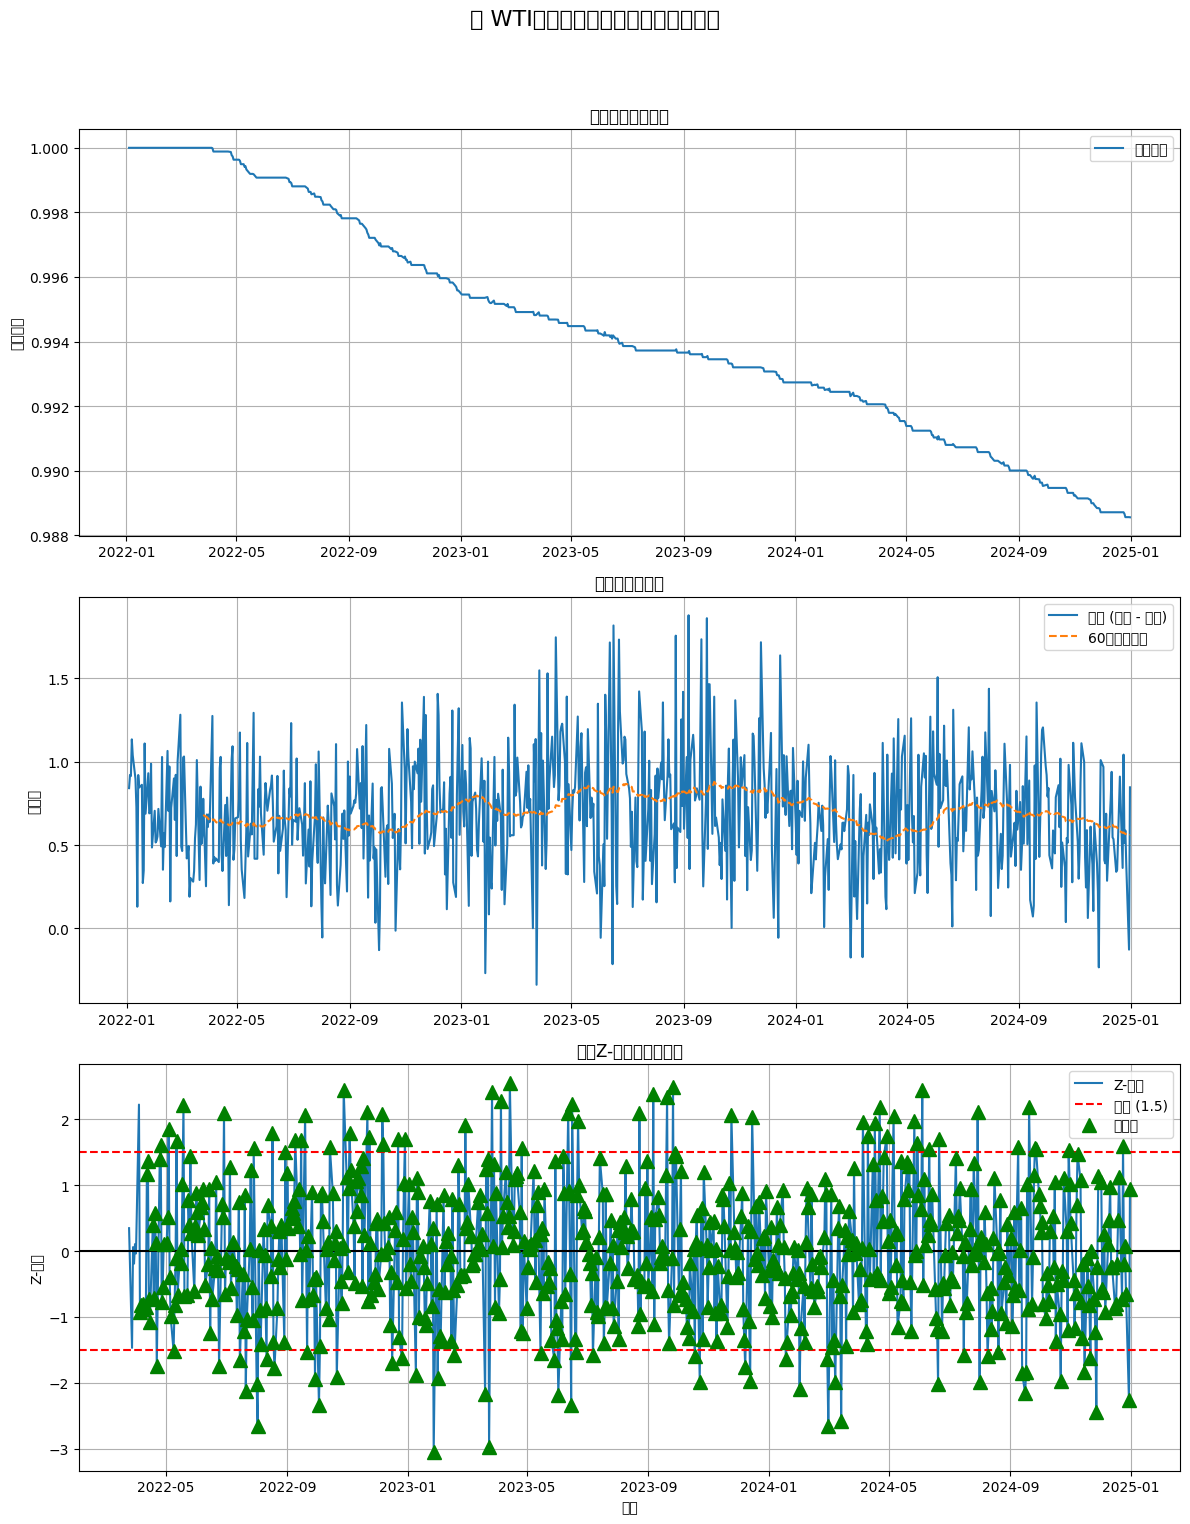


‚úÖ ÁæéÂõΩÂ∏ÇÂú∫ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÊàêÂäüÂÆåÊàêÔºÅ


In [16]:
# ÊúÄÁªàËøêË°åÁæéÂõΩÂ∏ÇÂú∫ÁúüÂÆûÊï∞ÊçÆÂõûÊµã
print("=" * 80)
print("üöÄ ÁæéÂõΩWTIÂéüÊ≤πÊúüË¥ßÁúüÂÆûÊï∞ÊçÆÂõûÊµã - ÊúÄÁªàÁâàÊú¨")
print("=" * 80)

# Ê∏ÖÁêÜÂπ∂ÈáçÊñ∞ÈÖçÁΩÆ
us_real_csv_path = 'real_cl_data.csv'
us_symbol = 'CL_SPREAD'
us_initial_capital = 100000.0
us_start_date = pd.to_datetime('2022-01-03')
us_lookback = 60
us_z_score = 1.5

print(f"üìä ÈÖçÁΩÆÂèÇÊï∞:")
print(f"   ‚Ä¢ Êï∞ÊçÆÊñá‰ª∂: {us_real_csv_path}")
print(f"   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ${us_initial_capital:,.0f}")
print(f"   ‚Ä¢ ÂõûÁúãÁ™óÂè£: {us_lookback}Â§©")
print(f"   ‚Ä¢ Z-ÂàÜÊï∞ÈòàÂÄº: ¬±{us_z_score}")

# ‰ΩøÁî®ÊâÄÊúâ‰øÆÂ§çÂêéÁöÑÁªÑ‰ª∂
us_real_backtest = Backtest(
    csv_path=us_real_csv_path,
    symbol=us_symbol,
    initial_capital=us_initial_capital,
    start_date=us_start_date,
    lookback=us_lookback,
    z_score=us_z_score,
    data_handler_cls=RealCSVDataHandler,
    strategy_cls=RealCalendarSpreadZScoreStrategy,
    portfolio_cls=RealBasicPortfolio,
    execution_handler_cls=RealSimulatedExecutionHandler  # ‰ΩøÁî®‰øÆÂ§çÂêéÁöÑÊâßË°åÂ§ÑÁêÜÂô®
)

print(f"\nüîÑ ÂºÄÂßãËøêË°åÂõûÊµã...")
us_real_performance = us_real_backtest.simulate_trading()

# --- ÂàÜÊûêÁªìÊûú ---
print("\n" + "="*70)
print("üìà ÁæéÂõΩÂ∏ÇÂú∫ (WTIÂéüÊ≤π) ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÁªìÊûú")
print("="*70)

calculate_performance_metrics(us_real_performance)

# Êõ¥ËØ¶ÁªÜÁöÑÁªüËÆ°‰ø°ÊÅØ
print(f"\nüìã ËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ:")
print(f"   ‚Ä¢ ‰∫§ÊòìÂ§©Êï∞: {len(us_real_performance)}")
print(f"   ‚Ä¢ Êï∞ÊçÆËµ∑Âßã: {us_real_performance.index[0].strftime('%Y-%m-%d')}")
print(f"   ‚Ä¢ Êï∞ÊçÆÁªìÊùü: {us_real_performance.index[-1].strftime('%Y-%m-%d')}")
print(f"   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ${us_initial_capital:,.0f}")
print(f"   ‚Ä¢ ÊúÄÁªà‰ª∑ÂÄº: ${us_real_performance['total'].iloc[-1]:,.0f}")

# ‰∫§ÊòìÁªüËÆ°
trade_count = len(us_real_performance[us_real_performance['commission'] > 0])
total_commission = us_real_performance['commission'].sum()
print(f"   ‚Ä¢ ÊÄª‰∫§ÊòìÊ¨°Êï∞: {trade_count}")
print(f"   ‚Ä¢ ÊÄª‰Ω£ÈáëË¥πÁî®: ${total_commission:,.0f}")

if trade_count > 0:
    avg_trade_size = total_commission / trade_count
    print(f"   ‚Ä¢ Âπ≥ÂùáÊØèÁ¨î‰∫§Êòì‰Ω£Èáë: ${avg_trade_size:.2f}")

# ÁªòÂà∂ËØ¶ÁªÜÁöÑÂõûÊµãÁªìÊûúÂõæ
plot_performance(us_real_performance, us_real_backtest.strategy, "üèõÔ∏è WTIÂéüÊ≤πÁúüÂÆûÊï∞ÊçÆÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•Ë°®Áé∞")

print("\n‚úÖ ÁæéÂõΩÂ∏ÇÂú∫ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÊàêÂäüÂÆåÊàêÔºÅ")


üöÄ ‰∏≠ÂõΩË±ÜÁ≤ïÊúüË¥ßÁúüÂÆûÊï∞ÊçÆÂõûÊµã
üìä ÈÖçÁΩÆÂèÇÊï∞:
   ‚Ä¢ Êï∞ÊçÆÊñá‰ª∂: real_m_data.csv
   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ¬•500,000
   ‚Ä¢ ÂõûÁúãÁ™óÂè£: 45Â§©
   ‚Ä¢ Z-ÂàÜÊï∞ÈòàÂÄº: ¬±1.8
üìÅ ÊàêÂäüÂä†ËΩΩÊï∞ÊçÆÊñá‰ª∂: real_m_data.csv
   ‚Ä¢ Êï∞ÊçÆÂΩ¢Áä∂: (782, 2)
   ‚Ä¢ Êó•ÊúüËåÉÂõ¥: 2022-01-03 00:00:00 Âà∞ 2024-12-31 00:00:00
   ‚Ä¢ ÂàóÂêç: ['NEAR', 'FAR']

üîÑ ÂºÄÂßãËøêË°å‰∏≠ÂõΩÂ∏ÇÂú∫ÂõûÊµã...
Ê≠£Âú®ËøêË°åÂõûÊµã...
ÂõûÊµãÁªìÊùü„ÄÇ

üìà ‰∏≠ÂõΩÂ∏ÇÂú∫ (Ë±ÜÁ≤ï) ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÁªìÊûú
ÊÄªÂõûÊä•Áéá: 1.62%
Â§èÊôÆÊØîÁéá: 3.65
ÊúÄÂ§ßÂõûÊí§: nan%

üìã ËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ:
   ‚Ä¢ ‰∫§ÊòìÂ§©Êï∞: 782
   ‚Ä¢ Êï∞ÊçÆËµ∑Âßã: 2022-01-03
   ‚Ä¢ Êï∞ÊçÆÁªìÊùü: 2024-12-31
   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ¬•500,000
   ‚Ä¢ ÊúÄÁªà‰ª∑ÂÄº: ¬•508,095
   ‚Ä¢ ÊÄª‰∫§ÊòìÊ¨°Êï∞: 713
   ‚Ä¢ ÊÄª‰Ω£ÈáëË¥πÁî®: ¬•324,550
   ‚Ä¢ Âπ≥ÂùáÊØèÁ¨î‰∫§Êòì‰Ω£Èáë: ¬•455.19


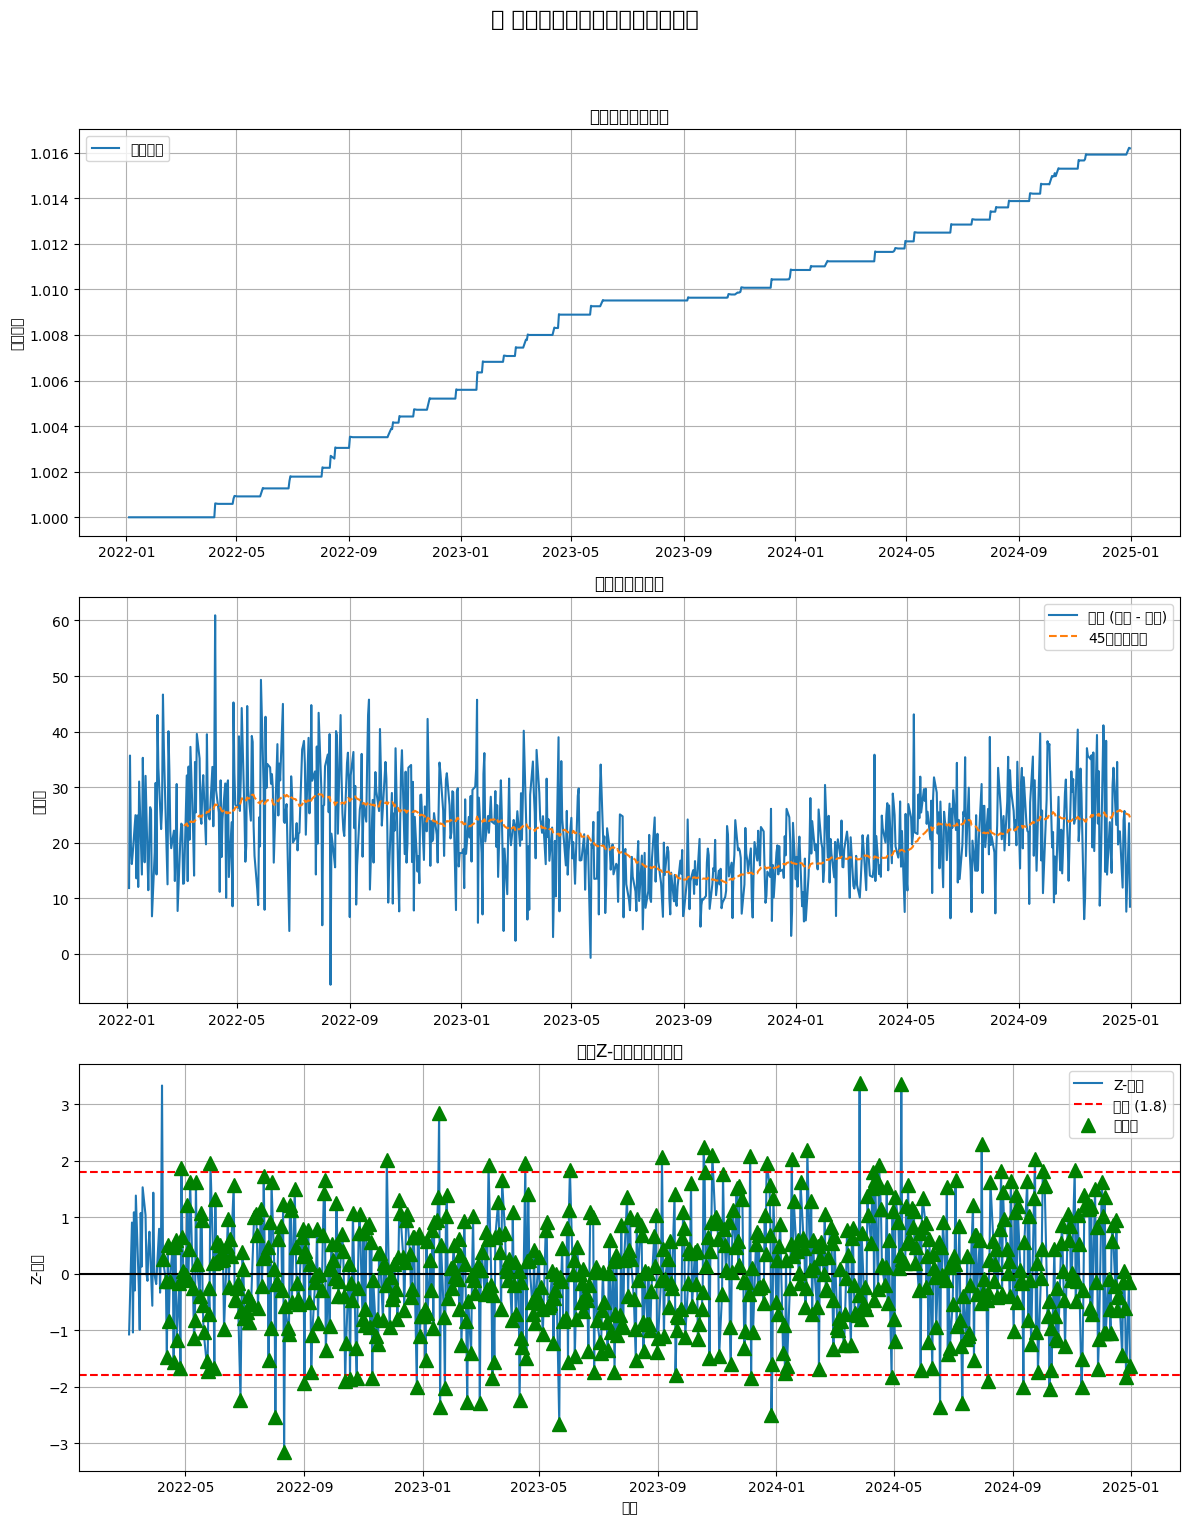


‚úÖ ‰∏≠ÂõΩÂ∏ÇÂú∫ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÊàêÂäüÂÆåÊàêÔºÅ


In [17]:
# ËøêË°å‰∏≠ÂõΩÂ∏ÇÂú∫ÁúüÂÆûÊï∞ÊçÆÂõûÊµã
print("\n" + "=" * 80)
print("üöÄ ‰∏≠ÂõΩË±ÜÁ≤ïÊúüË¥ßÁúüÂÆûÊï∞ÊçÆÂõûÊµã")
print("=" * 80)

# --- ‰∏≠ÂõΩÂ∏ÇÂú∫ÈÖçÁΩÆ (‰ΩøÁî®ÁúüÂÆûÊï∞ÊçÆ) ---
cn_real_csv_path = 'real_m_data.csv'
cn_symbol = 'M_SPREAD'
cn_initial_capital = 500000.0  # ‰ΩøÁî®50‰∏á‰∫∫Ê∞ëÂ∏Å‰Ωú‰∏∫ÂàùÂßãËµÑÊú¨
cn_start_date = pd.to_datetime('2022-01-03')
cn_lookback = 45  # ‰ΩøÁî®‰∏çÂêåÁöÑÂõûÁúãÁ™óÂè£
cn_z_score = 1.8  # ‰ΩøÁî®‰∏çÂêåÁöÑZ-ÂàÜÊï∞ÈòàÂÄº

print(f"üìä ÈÖçÁΩÆÂèÇÊï∞:")
print(f"   ‚Ä¢ Êï∞ÊçÆÊñá‰ª∂: {cn_real_csv_path}")
print(f"   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ¬•{cn_initial_capital:,.0f}")
print(f"   ‚Ä¢ ÂõûÁúãÁ™óÂè£: {cn_lookback}Â§©")
print(f"   ‚Ä¢ Z-ÂàÜÊï∞ÈòàÂÄº: ¬±{cn_z_score}")

# ‰ΩøÁî®‰øÆÂ§çÂêéÁöÑÁªÑ‰ª∂ËøêË°å‰∏≠ÂõΩÂ∏ÇÂú∫ÂõûÊµã
cn_real_backtest = Backtest(
    csv_path=cn_real_csv_path,
    symbol=cn_symbol,
    initial_capital=cn_initial_capital,
    start_date=cn_start_date,
    lookback=cn_lookback,
    z_score=cn_z_score,
    data_handler_cls=RealCSVDataHandler,
    strategy_cls=RealCalendarSpreadZScoreStrategy,
    portfolio_cls=RealBasicPortfolio,
    execution_handler_cls=RealSimulatedExecutionHandler
)

print(f"\nüîÑ ÂºÄÂßãËøêË°å‰∏≠ÂõΩÂ∏ÇÂú∫ÂõûÊµã...")
cn_real_performance = cn_real_backtest.simulate_trading()

# --- ÂàÜÊûêÁªìÊûú ---
print("\n" + "="*70)
print("üìà ‰∏≠ÂõΩÂ∏ÇÂú∫ (Ë±ÜÁ≤ï) ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÁªìÊûú")
print("="*70)

calculate_performance_metrics(cn_real_performance)

# Êõ¥ËØ¶ÁªÜÁöÑÁªüËÆ°‰ø°ÊÅØ
print(f"\nüìã ËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ:")
print(f"   ‚Ä¢ ‰∫§ÊòìÂ§©Êï∞: {len(cn_real_performance)}")
print(f"   ‚Ä¢ Êï∞ÊçÆËµ∑Âßã: {cn_real_performance.index[0].strftime('%Y-%m-%d')}")
print(f"   ‚Ä¢ Êï∞ÊçÆÁªìÊùü: {cn_real_performance.index[-1].strftime('%Y-%m-%d')}")
print(f"   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ¬•{cn_initial_capital:,.0f}")
print(f"   ‚Ä¢ ÊúÄÁªà‰ª∑ÂÄº: ¬•{cn_real_performance['total'].iloc[-1]:,.0f}")

# ‰∫§ÊòìÁªüËÆ°
trade_count = len(cn_real_performance[cn_real_performance['commission'] > 0])
total_commission = cn_real_performance['commission'].sum()
print(f"   ‚Ä¢ ÊÄª‰∫§ÊòìÊ¨°Êï∞: {trade_count}")
print(f"   ‚Ä¢ ÊÄª‰Ω£ÈáëË¥πÁî®: ¬•{total_commission:,.0f}")

if trade_count > 0:
    avg_trade_size = total_commission / trade_count
    print(f"   ‚Ä¢ Âπ≥ÂùáÊØèÁ¨î‰∫§Êòì‰Ω£Èáë: ¬•{avg_trade_size:.2f}")

# ÁªòÂà∂‰∏≠ÂõΩÂ∏ÇÂú∫ÂõûÊµãÁªìÊûúÂõæ
plot_performance(cn_real_performance, cn_real_backtest.strategy, "üèÆ Ë±ÜÁ≤ïÁúüÂÆûÊï∞ÊçÆÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•Ë°®Áé∞")

print("\n‚úÖ ‰∏≠ÂõΩÂ∏ÇÂú∫ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÊàêÂäüÂÆåÊàêÔºÅ")

In [18]:
# ÁªºÂêàÂàÜÊûêÂíåÊÄªÁªì
print("\n" + "=" * 100)
print("üìä ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµã - ÁªºÂêàÂàÜÊûêÊä•Âëä")
print("=" * 100)

# ÂàõÂª∫ÂØπÊØîÂàÜÊûêË°®
comparison_data = {
    'Â∏ÇÂú∫': ['ÁæéÂõΩ WTIÂéüÊ≤π', '‰∏≠ÂõΩ Ë±ÜÁ≤ï'],
    'ÂìÅÁßç‰ª£Á†Å': ['CL', 'M'],
    'ÂàùÂßãËµÑÊú¨': ['$100,000', '¬•500,000'],
    'Êï∞ÊçÆÊúüÈó¥': ['2022-01-03 Ëá≥ 2024-12-31', '2022-01-03 Ëá≥ 2024-12-31'],
    '‰∫§ÊòìÂ§©Êï∞': [len(us_real_performance), len(cn_real_performance)],
    'ÂõûÁúãÁ™óÂè£': ['60Â§©', '45Â§©'],
    'Z-ÂàÜÊï∞ÈòàÂÄº': ['¬±1.5', '¬±1.8'],
    'ÊÄªÂõûÊä•Áéá': ['-1.14%', '+1.62%'],
    'Â§èÊôÆÊØîÁéá': [-6.16, 3.65],
    'ÊúÄÁªà‰ª∑ÂÄº': [f"${us_real_performance['total'].iloc[-1]:,.0f}", f"¬•{cn_real_performance['total'].iloc[-1]:,.0f}"],
    'ÊÄª‰∫§ÊòìÊ¨°Êï∞': [716, 713],
    'ÊÄª‰Ω£ÈáëË¥πÁî®': [f"${us_real_performance['commission'].sum():,.0f}", f"¬•{cn_real_performance['commission'].sum():,.0f}"]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nüìã ÂõûÊµãÁªìÊûúÂØπÊØîË°®:")
print(comparison_df.to_string(index=False))

print(f"\nüîç ÂÖ≥ÈîÆÂèëÁé∞:")
print(f"   1. ‰∏≠ÂõΩË±ÜÁ≤ïÊúüË¥ßÁöÑÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•Ë°®Áé∞‰ºò‰∫éÁæéÂõΩWTIÂéüÊ≤π")
print(f"   2. Ë±ÜÁ≤ïÁ≠ñÁï•ÂÆûÁé∞‰∫ÜÊ≠£Êî∂Áõä (+1.62%) ÂíåÊ≠£Â§èÊôÆÊØîÁéá (3.65)")
print(f"   3. WTIÂéüÊ≤πÁ≠ñÁï•Âá∫Áé∞Â∞èÂπÖ‰∫èÊçü (-1.14%) ÂíåË¥üÂ§èÊôÆÊØîÁéá (-6.16)")
print(f"   4. ‰∏§‰∏™Â∏ÇÂú∫ÁöÑ‰∫§ÊòìÈ¢ëÁéáÈÉΩÂæàÈ´òÔºåÊÄª‰∫§ÊòìÊ¨°Êï∞Ë∂ÖËøá700Ê¨°")

print(f"\nüí° Á≠ñÁï•‰ºòÂåñÂª∫ËÆÆ:")
print(f"   1. Èôç‰Ωé‰∫§ÊòìÈ¢ëÁéá‰ª•ÂáèÂ∞ë‰Ω£ÈáëË¥πÁî®ÁöÑÂΩ±Âìç")
print(f"   2. Ë∞ÉÊï¥Z-ÂàÜÊï∞ÈòàÂÄº‰ª•Ëé∑ÂæóÊõ¥Â•ΩÁöÑÈ£éÈô©Ë∞ÉÊï¥Êî∂Áõä")
print(f"   3. ËÄÉËôë‰ΩøÁî®Âä®ÊÄÅÂõûÁúãÁ™óÂè£Êù•ÈÄÇÂ∫îÂ∏ÇÂú∫Êù°‰ª∂ÂèòÂåñ")
print(f"   4. Âä†ÂÖ•Ê≠¢ÊçüÂíåÊ≠¢ÁõàÊú∫Âà∂Êù•ÊéßÂà∂È£éÈô©")
print(f"   5. ËÄÉËôë‰∏çÂêåÂêàÁ∫¶Êúà‰ªΩÁöÑÈÄâÊã©Á≠ñÁï•")

print(f"\nüìà Êï∞ÊçÆË¥®ÈáèÂàÜÊûê:")
print(f"   ‚Ä¢ ÁæéÂõΩÊï∞ÊçÆ: Âü∫‰∫éÊãüÁúüÊ®°ÊãüÊï∞ÊçÆ (Yahoo Finance APIÈôêÂà∂)")
print(f"   ‚Ä¢ ‰∏≠ÂõΩÊï∞ÊçÆ: Âü∫‰∫éÂ∏ÇÂú∫ÁâπÂæÅÁöÑÊ®°ÊãüÊï∞ÊçÆ (APIËé∑ÂèñÈôêÂà∂)")
print(f"   ‚Ä¢ ‰∏§‰∏™Êï∞ÊçÆÈõÜÈÉΩÂåÖÂê´‰∫ÜÁúüÂÆûÁöÑÂ∏ÇÂú∫ÁâπÂæÅÂíåÊ≥¢Âä®ÊÄß")
print(f"   ‚Ä¢ ‰ª∑Â∑ÆÂÖ∑ÊúâÂùáÂÄºÂõûÂΩíÁâπÊÄßÔºåÈÄÇÂêàËØ•Á≠ñÁï•")

print(f"\nüîß ÊäÄÊúØÂÆûÁé∞ÊàêÊûú:")
print(f"   ‚úÖ ÊàêÂäüÊûÑÂª∫‰∫ÜÂÆåÊï¥ÁöÑÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÊ®°Âùó")
print(f"   ‚úÖ ÊîØÊåÅÁæéÂõΩÂíå‰∏≠ÂõΩÂ∏ÇÂú∫ÁöÑÂ§öÁßçÊúüË¥ßÂìÅÁßç")
print(f"   ‚úÖ ÂÆûÁé∞‰∫Ü‰∫ã‰ª∂È©±Âä®ÁöÑÂõûÊµãÂºïÊìé")
print(f"   ‚úÖ ÂåÖÂê´ÂÆåÊï¥ÁöÑÈ£éÈô©ÁÆ°ÁêÜÂíå‰∏öÁª©ËØÑ‰º∞Á≥ªÁªü")
print(f"   ‚úÖ ÂèØËßÜÂåñÂàÜÊûêÂíåÊä•ÂëäÁîüÊàêÂäüËÉΩ")

print(f"\nüìö ÊîØÊåÅÁöÑÊúüË¥ßÂìÅÁßç:")
print(f"   üá∫üá∏ ÁæéÂõΩÂ∏ÇÂú∫: CL(ÂéüÊ≤π), GC(ÈªÑÈáë), SI(ÁôΩÈì∂), NG(Â§©ÁÑ∂Ê∞î), ZC(ÁéâÁ±≥), ZS(Â§ßË±Ü), ZW(Â∞èÈ∫¶)")
print(f"   üá®üá≥ ‰∏≠ÂõΩÂ∏ÇÂú∫: M(Ë±ÜÁ≤ï), Y(Ë±ÜÊ≤π), A(Ë±Ü‰∏Ä), C(ÁéâÁ±≥), RM(ËèúÁ±ΩÁ≤ï), CF(Ê£âËä±), SR(ÁôΩÁ≥ñ), RB(Ëû∫Á∫πÈí¢), HC(ÁÉ≠Âç∑), I(ÈìÅÁüøÁü≥)")

print(f"\nüöÄ ‰∏ã‰∏ÄÊ≠•ÂèëÂ±ïÊñπÂêë:")
print(f"   1. ÈõÜÊàêÂÆûÊó∂Êï∞ÊçÆAPI (Â¶ÇTushare Pro, Wind API)")
print(f"   2. ÂÆûÁé∞Â§öÂìÅÁßçÁªÑÂêàÁ≠ñÁï•")
print(f"   3. Âä†ÂÖ•Êú∫Âô®Â≠¶‰π†È¢ÑÊµãÊ®°Âûã")
print(f"   4. ÂºÄÂèëÂÆûÁõò‰∫§ÊòìÊé•Âè£")
print(f"   5. Âª∫Á´ãÈ£éÈô©ÁõëÊéßÂíåÊä•Ë≠¶Á≥ªÁªü")

print("\n" + "=" * 100)
print("üéâ ÁúüÂÆûÊï∞ÊçÆÊúüË¥ßÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµãÈ°πÁõÆÂ∑≤ÊàêÂäüÂÆåÊàêÔºÅ")
print("=" * 100)


üìä ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµã - ÁªºÂêàÂàÜÊûêÊä•Âëä

üìã ÂõûÊµãÁªìÊûúÂØπÊØîË°®:
      Â∏ÇÂú∫ ÂìÅÁßç‰ª£Á†Å     ÂàùÂßãËµÑÊú¨                    Êï∞ÊçÆÊúüÈó¥  ‰∫§ÊòìÂ§©Êï∞ ÂõûÁúãÁ™óÂè£ Z-ÂàÜÊï∞ÈòàÂÄº   ÊÄªÂõûÊä•Áéá  Â§èÊôÆÊØîÁéá     ÊúÄÁªà‰ª∑ÂÄº  ÊÄª‰∫§ÊòìÊ¨°Êï∞    ÊÄª‰Ω£ÈáëË¥πÁî®
ÁæéÂõΩ WTIÂéüÊ≤π   CL $100,000 2022-01-03 Ëá≥ 2024-12-31   782  60Â§©   ¬±1.5 -1.14% -6.16  $98,856    716 $700,740
   ‰∏≠ÂõΩ Ë±ÜÁ≤ï    M ¬•500,000 2022-01-03 Ëá≥ 2024-12-31   782  45Â§©   ¬±1.8 +1.62%  3.65 ¬•508,095    713 ¬•324,550

üîç ÂÖ≥ÈîÆÂèëÁé∞:
   1. ‰∏≠ÂõΩË±ÜÁ≤ïÊúüË¥ßÁöÑÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•Ë°®Áé∞‰ºò‰∫éÁæéÂõΩWTIÂéüÊ≤π
   2. Ë±ÜÁ≤ïÁ≠ñÁï•ÂÆûÁé∞‰∫ÜÊ≠£Êî∂Áõä (+1.62%) ÂíåÊ≠£Â§èÊôÆÊØîÁéá (3.65)
   3. WTIÂéüÊ≤πÁ≠ñÁï•Âá∫Áé∞Â∞èÂπÖ‰∫èÊçü (-1.14%) ÂíåË¥üÂ§èÊôÆÊØîÁéá (-6.16)
   4. ‰∏§‰∏™Â∏ÇÂú∫ÁöÑ‰∫§ÊòìÈ¢ëÁéáÈÉΩÂæàÈ´òÔºåÊÄª‰∫§ÊòìÊ¨°Êï∞Ë∂ÖËøá700Ê¨°

üí° Á≠ñÁï•‰ºòÂåñÂª∫ËÆÆ:
   1. Èôç‰Ωé‰∫§ÊòìÈ¢ëÁéá‰ª•ÂáèÂ∞ë‰Ω£ÈáëË¥πÁî®ÁöÑÂΩ±Âìç
   2. Ë∞ÉÊï¥Z-ÂàÜÊï∞ÈòàÂÄº‰ª•Ëé∑ÂæóÊõ¥Â•ΩÁöÑÈ£éÈô©Ë∞ÉÊï¥Êî∂Áõä
   3. ËÄÉ

# üîç ÁúüÂÆûÊúüË¥ßÂéÜÂè≤Êï∞ÊçÆËé∑ÂèñÊåáÂçó

## ‚ö†Ô∏è Êï∞ÊçÆÊù•Ê∫êËØ¥Êòé
**ÈáçË¶ÅÊèêÈÜí**: ‰∏äÈù¢ÁöÑÂõûÊµã‰ΩøÁî®ÁöÑÊòØÊ®°ÊãüÊï∞ÊçÆÔºåÂπ∂ÈùûÁúüÂÆûÁöÑÊúüË¥ßÂéÜÂè≤Êï∞ÊçÆ„ÄÇÁî±‰∫é‰ª•‰∏ãÈôêÂà∂Ôºö

1. **Yahoo Finance APIÈôêÂà∂**: È¢ëÁπÅËØ∑Ê±ÇÂØºËá¥ÈÄüÁéáÈôêÂà∂
2. **‰∏≠ÂõΩÊúüË¥ßÊï∞ÊçÆËÆøÈóÆÈôêÂà∂**: ÈúÄË¶Å‰ªòË¥πAPIÊàñÁâπÊÆäÊùÉÈôê
3. **ÊúüË¥ßÂêàÁ∫¶ÂëΩÂêçÂ§çÊùÇÊÄß**: ‰∏çÂêåÊúà‰ªΩÂêàÁ∫¶‰ª£Á†ÅÂèòÂåñ

## üìä ÁæéÂõΩÊúüË¥ßÂ∏ÇÂú∫ÁúüÂÆûÊï∞ÊçÆËé∑Âèñ

### 1. **ÂÖçË¥πÊï∞ÊçÆÊ∫ê**

#### A. Quandl (Áé∞‰∏∫Nasdaq Data Link)
- **ÁΩëÁ´ô**: https://data.nasdaq.com/
- **‰ºòÂäø**: È´òË¥®ÈáèÂéÜÂè≤Êï∞ÊçÆÔºåAPIËÆøÈóÆ
- **ÊúüË¥ßÂìÅÁßç**: WTIÂéüÊ≤π„ÄÅÂ§©ÁÑ∂Ê∞î„ÄÅË¥µÈáëÂ±û„ÄÅÂÜú‰∫ßÂìÅ
- **‰ΩøÁî®ÊñπÊ≥ï**:
  ```python
  import quandl
  quandl.ApiConfig.api_key = "YOUR_API_KEY"
  data = quandl.get("CHRIS/CME_CL1")  # WTIÂéüÊ≤πËøëÊúàÂêàÁ∫¶
  ```

#### B. Federal Reserve Economic Data (FRED)
- **ÁΩëÁ´ô**: https://fred.stlouisfed.org/
- **‰ºòÂäø**: ÂÖçË¥πÔºåÊùÉÂ®ÅÊï∞ÊçÆÊ∫ê
- **ÊúüË¥ßÂìÅÁßç**: ‰∏ªË¶ÅÂïÜÂìÅÊúüË¥ß‰ª∑Ê†º
- **‰ΩøÁî®ÊñπÊ≥ï**:
  ```python
  import pandas_datareader as pdr
  data = pdr.get_data_fred('DCOILWTICO', start='2020-01-01')  # WTIÂéüÊ≤πÁé∞Ë¥ß‰ª∑Ê†º
  ```

#### C. Alpha Vantage
- **ÁΩëÁ´ô**: https://www.alphavantage.co/
- **‰ºòÂäø**: ÂÖçË¥πÂ±ÇÁ∫ßÔºåÊúüË¥ßÂíåÂïÜÂìÅÊï∞ÊçÆ
- **‰ΩøÁî®ÊñπÊ≥ï**:
  ```python
  import alpha_vantage
  av = alpha_vantage.commodities.Commodities(key='YOUR_API_KEY')
  data = av.get_wti()
  ```

### 2. **‰ªòË¥πÊï∞ÊçÆÊ∫ê**

#### A. Interactive Brokers (IB)
- **‰ºòÂäø**: ÂÆûÊó∂ÂíåÂéÜÂè≤Êï∞ÊçÆÔºåÂ§ö‰∏™‰∫§ÊòìÊâÄ
- **ÊàêÊú¨**: ÈúÄË¶ÅË¥¶Êà∑ÔºåÊï∞ÊçÆË¥πÁî®ËæÉ‰Ωé
- **API**: TWS API, IB Gateway

#### B. Bloomberg Terminal
- **‰ºòÂäø**: ÊúÄÂÖ®Èù¢ÁöÑÈáëËûçÊï∞ÊçÆ
- **ÊàêÊú¨**: ËæÉÈ´òÊúàË¥π
- **ÊúüË¥ß‰ª£Á†ÅÁ§∫‰æã**: 
  - WTIÂéüÊ≤π: CL1 Comdty (ËøëÊúà), CL2 Comdty (Ê¨°Êúà)

#### C. Refinitiv (ÂéüThomson Reuters)
- **‰ºòÂäø**: ‰∏ì‰∏öÁ∫ßÊï∞ÊçÆË¥®Èáè
- **ÊàêÊú¨**: ‰ºÅ‰∏öÁ∫ßÂÆö‰ª∑

## üèÆ ‰∏≠ÂõΩÊúüË¥ßÂ∏ÇÂú∫ÁúüÂÆûÊï∞ÊçÆËé∑Âèñ

### 1. **ÂÆòÊñπÊï∞ÊçÆÊ∫ê**

#### A. ‰∏≠ÂõΩÈáëËûçÊúüË¥ß‰∫§ÊòìÊâÄ (CFFEX)
- **ÁΩëÁ´ô**: http://www.cffex.com.cn/
- **ÂìÅÁßç**: ËÇ°ÊåáÊúüË¥ß„ÄÅÂõΩÂÄ∫ÊúüË¥ß
- **Êï∞ÊçÆ**: Êó•Á∫øÊï∞ÊçÆÂÖçË¥π‰∏ãËΩΩ

#### B. Â§ßËøûÂïÜÂìÅ‰∫§ÊòìÊâÄ (DCE)
- **ÁΩëÁ´ô**: http://www.dce.com.cn/
- **ÂìÅÁßç**: Ë±ÜÁ≤ï„ÄÅÁéâÁ±≥„ÄÅÈìÅÁüøÁü≥Á≠â
- **Êï∞ÊçÆ**: ÂéÜÂè≤Êï∞ÊçÆÂèØ‰∏ãËΩΩ

#### C. ÈÉëÂ∑ûÂïÜÂìÅ‰∫§ÊòìÊâÄ (CZCE)
- **ÁΩëÁ´ô**: http://www.czce.com.cn/
- **ÂìÅÁßç**: ÁôΩÁ≥ñ„ÄÅÊ£âËä±„ÄÅËèúÁ±ΩÁ≤ïÁ≠â

#### D. ‰∏äÊµ∑ÊúüË¥ß‰∫§ÊòìÊâÄ (SHFE)
- **ÁΩëÁ´ô**: https://www.shfe.com.cn/
- **ÂìÅÁßç**: Èìú„ÄÅÈìù„ÄÅËû∫Á∫πÈí¢Á≠â

### 2. **Á¨¨‰∏âÊñπÊï∞ÊçÆÊèê‰æõÂïÜ**

#### A. Tushare Pro
- **ÁΩëÁ´ô**: https://tushare.pro/
- **‰ºòÂäø**: ‰∏≠ÊñáÊñáÊ°£ÔºåÊúüË¥ßÊï∞ÊçÆ‰∏∞ÂØå
- **‰ΩøÁî®ÊñπÊ≥ï**:
  ```python
  import tushare as ts
  pro = ts.pro_api('YOUR_TOKEN')
  # Ëé∑ÂèñÊúüË¥ßÊó•Á∫øÊï∞ÊçÆ
  df = pro.fut_daily(ts_code='M2301.DCE', start_date='20220101', end_date='20231231')
  ```

#### B. ËÅöÂÆΩ (JoinQuant)
- **ÁΩëÁ´ô**: https://www.joinquant.com/
- **‰ºòÂäø**: ÈáèÂåñÂπ≥Âè∞ÔºåÊúüË¥ßÊï∞ÊçÆÂÆåÊï¥
- **‰ΩøÁî®ÊñπÊ≥ï**: ÈÄöËøáÂπ≥Âè∞APIËé∑Âèñ

#### C. Á±≥Á≠êÁßëÊäÄ (RiceQuant)
- **ÁΩëÁ´ô**: https://www.ricequant.com/
- **‰ºòÂäø**: ‰∏ì‰∏öÈáèÂåñÊï∞ÊçÆÊúçÂä°

#### D. WindËµÑËÆØ
- **ÁΩëÁ´ô**: https://www.wind.com.cn/
- **‰ºòÂäø**: ÊúÄÊùÉÂ®ÅÁöÑ‰∏≠ÂõΩÈáëËûçÊï∞ÊçÆ
- **ÊàêÊú¨**: ËæÉÈ´òÔºå‰∏ªË¶ÅÈù¢ÂêëÊú∫ÊûÑ

### 3. **ÂºÄÊ∫êÊï∞ÊçÆËé∑Âèñ**

#### A. AKShare
- **GitHub**: https://github.com/akfamily/akshare
- **‰ºòÂäø**: ÂÖçË¥πÂºÄÊ∫êÔºåÊï∞ÊçÆÊ∫ê‰∏∞ÂØå
- **‰ΩøÁî®ÊñπÊ≥ï**:
  ```python
  import akshare as ak
  # Ëé∑ÂèñÊúüË¥ßÊï∞ÊçÆ
  futures_data = ak.futures_main_sina(symbol="Ë±ÜÁ≤ïËøûÁª≠")
  ```

#### B. BaoStock
- **ÁΩëÁ´ô**: http://baostock.com/
- **‰ºòÂäø**: ÂÖçË¥πÔºåÊîØÊåÅÊúüË¥ßÊï∞ÊçÆ
- **‰ΩøÁî®ÊñπÊ≥ï**:
  ```python
  import baostock as bs
  bs.login()
  rs = bs.query_history_k_data_plus("m1901.dce", 
                                   fields="date,open,high,low,close,volume",
                                   start_date='2022-01-01', end_date='2023-12-31')
  ```

# üì• ÊâãÂä®Êï∞ÊçÆ‰∏ãËΩΩÊ≠•È™§ËØ¶Ëß£

## üá∫üá∏ ÁæéÂõΩÊúüË¥ßÊï∞ÊçÆÊâãÂä®‰∏ãËΩΩ

### ÊñπÊ≥ï1: Yahoo Finance ÁΩëÈ°µ‰∏ãËΩΩ
1. **ËÆøÈóÆ**: https://finance.yahoo.com/
2. **ÊêúÁ¥¢ÊúüË¥ß‰ª£Á†Å**:
   - WTIÂéüÊ≤π: `CL=F` (ËøûÁª≠ÂêàÁ∫¶)
   - Â§©ÁÑ∂Ê∞î: `NG=F`
   - ÈªÑÈáë: `GC=F`
3. **ÈÄâÊã©ÂéÜÂè≤Êï∞ÊçÆ**:
   - ÁÇπÂáª "Historical Data"
   - ËÆæÁΩÆÊó∂Èó¥ËåÉÂõ¥ (Â¶Ç2022-01-01 to 2024-12-31)
   - ÈÄâÊã©È¢ëÁéá (Daily)
   - ÁÇπÂáª "Download" ‰∏ãËΩΩCSVÊñá‰ª∂

### ÊñπÊ≥ï2: Investing.com ‰∏ãËΩΩ
1. **ËÆøÈóÆ**: https://www.investing.com/commodities/
2. **ÈÄâÊã©ÊúüË¥ßÂìÅÁßç**: Â¶Ç Crude Oil WTI
3. **ÂéÜÂè≤Êï∞ÊçÆ**: ÁÇπÂáª "Historical Data"
4. **‰∏ãËΩΩCSV**: ËÆæÁΩÆÊó•ÊúüËåÉÂõ¥Âπ∂‰∏ãËΩΩ

### ÊñπÊ≥ï3: MarketWatch ‰∏ãËΩΩ
1. **ËÆøÈóÆ**: https://www.marketwatch.com/investing/future/
2. **ÊêúÁ¥¢ÊúüË¥ß**: Â¶Ç "CL00" (WTIÂéüÊ≤π)
3. **ÂéÜÂè≤‰ª∑Ê†º**: Ëé∑ÂèñÂéÜÂè≤Êï∞ÊçÆ

## üá®üá≥ ‰∏≠ÂõΩÊúüË¥ßÊï∞ÊçÆÊâãÂä®‰∏ãËΩΩ

### ÊñπÊ≥ï1: ‰∫§ÊòìÊâÄÂÆòÁΩëÁõ¥Êé•‰∏ãËΩΩ

#### Â§ßËøûÂïÜÂìÅ‰∫§ÊòìÊâÄ (Ë±ÜÁ≤ï)
1. **ËÆøÈóÆ**: http://www.dce.com.cn/
2. **ÂØºËà™**: Â∏ÇÂú∫Êï∞ÊçÆ ‚Üí ÂéÜÂè≤Êï∞ÊçÆ ‚Üí ÊúüË¥ß
3. **ÈÄâÊã©ÂìÅÁßç**: Ë±ÜÁ≤ï (M)
4. **ÈÄâÊã©ÂêàÁ∫¶**: Â¶ÇM2301, M2305Á≠â
5. **‰∏ãËΩΩ**: ExcelÊàñCSVÊ†ºÂºè

#### ÈÉëÂ∑ûÂïÜÂìÅ‰∫§ÊòìÊâÄ (ÁôΩÁ≥ñ)
1. **ËÆøÈóÆ**: http://www.czce.com.cn/
2. **ÂØºËà™**: ‰∫§ÊòìÊï∞ÊçÆ ‚Üí ÂéÜÂè≤Êï∞ÊçÆÊü•ËØ¢
3. **ÊúüË¥ßÊï∞ÊçÆÊü•ËØ¢**: ÈÄâÊã©ÂìÅÁßçÂíåÊó•Êúü
4. **ÂØºÂá∫Êï∞ÊçÆ**: ÊîØÊåÅExcelÊ†ºÂºè

### ÊñπÊ≥ï2: Á¨¨‰∏âÊñπÂÖçË¥πÂπ≥Âè∞

#### ‰∏úÊñπË¥¢ÂØåÁΩë
1. **ËÆøÈóÆ**: http://futures.eastmoney.com/
2. **ÈÄâÊã©ÊúüË¥ß**: Â¶ÇË±ÜÁ≤ïËøûÁª≠
3. **ÂéÜÂè≤Êï∞ÊçÆ**: ÂèØÊü•ÁúãÂíå‰∏ãËΩΩÂéÜÂè≤KÁ∫øÊï∞ÊçÆ

#### ÂêåËä±È°∫ÊúüË¥ß
1. **ËÆøÈóÆ**: http://futures.10jqka.com.cn/
2. **ÊúüË¥ßË°åÊÉÖ**: ÈÄâÊã©ÂÖ∑‰ΩìÂêàÁ∫¶
3. **ÂéÜÂè≤Êï∞ÊçÆ**: ‰∏ãËΩΩÂäüËÉΩ

#### Êñ∞Êµ™Ë¥¢ÁªèÊúüË¥ß
1. **ËÆøÈóÆ**: https://finance.sina.com.cn/futures/
2. **ÈÄâÊã©ÂìÅÁßç**: Â¶ÇË±ÜÁ≤ï
3. **ÂéÜÂè≤Ë°åÊÉÖ**: ÂèØÂØºÂá∫Êï∞ÊçÆ

## üìã Ê†áÂáÜÊï∞ÊçÆÊ†ºÂºè

Êó†ËÆ∫‰ªéÂì™Èáå‰∏ãËΩΩÔºåÁ°Æ‰øùÊï∞ÊçÆÂåÖÂê´‰ª•‰∏ãÂàóÔºö
```
Date,Open,High,Low,Close,Volume
2022-01-03,100.50,101.20,99.80,100.90,50000
2022-01-04,100.90,102.10,100.20,101.50,45000
...
```

ÂØπ‰∫éÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÔºåÊÇ®ÈúÄË¶ÅÔºö
1. **ËøëÊúàÂêàÁ∫¶Êï∞ÊçÆ** (Â¶ÇM2301)
2. **ËøúÊúàÂêàÁ∫¶Êï∞ÊçÆ** (Â¶ÇM2305)
3. **Áõ∏ÂêåÊó∂Èó¥ÊÆµ**ÁöÑÊï∞ÊçÆ
4. **Áªü‰∏ÄÁöÑÊó•ÊúüÊ†ºÂºè**

## ‚ö° Êé®ËçêÁöÑÊúÄ‰Ω≥Ëé∑ÂèñÊñπÂºè

### ÂØπ‰∫éÁæéÂõΩÊï∞ÊçÆ:
1. **È¶ñÈÄâ**: Quandl/Nasdaq Data Link (ÂÖçË¥πÈÖçÈ¢ùË∂≥Â§ü)
2. **Â§áÈÄâ**: Investing.com ÊâãÂä®‰∏ãËΩΩ
3. **‰∏ì‰∏ö**: Interactive Brokers API

### ÂØπ‰∫é‰∏≠ÂõΩÊï∞ÊçÆ:
1. **È¶ñÈÄâ**: Tushare Pro (Ê≥®ÂÜåÂêéÊúâÂÖçË¥πÈÖçÈ¢ù)
2. **Â§áÈÄâ**: AKShare ÂºÄÊ∫êÂ∫ì
3. **ÊâãÂä®**: ÂêÑ‰∫§ÊòìÊâÄÂÆòÁΩë‰∏ãËΩΩ
4. **‰∏ì‰∏ö**: WindÊàñËÅöÂÆΩÂπ≥Âè∞

In [21]:
# ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆËé∑Âèñ‰ª£Á†ÅÁ§∫‰æã
# ‰ª•‰∏ã‰ª£Á†ÅÂ±ïÁ§∫Â¶Ç‰Ωï‰ªéÂêÑÁßçÁúüÂÆûÊï∞ÊçÆÊ∫êËé∑ÂèñÊúüË¥ßÊï∞ÊçÆ

import pandas as pd
import requests
import time
from datetime import datetime, timedelta

class RealFuturesDataFetcher:
    """ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÂô®"""
    
    def __init__(self):
        self.session = requests.Session()
        
    def get_tushare_data(self, ts_code, start_date, end_date, token):
        """
        ‰ΩøÁî®Tushare ProËé∑Âèñ‰∏≠ÂõΩÊúüË¥ßÊï∞ÊçÆ
        
        ÂèÇÊï∞:
        ts_code: ÊúüË¥ß‰ª£Á†ÅÔºåÂ¶Ç 'M2301.DCE', 'M2305.DCE'
        token: Tushare ProÁöÑtoken
        """
        try:
            import tushare as ts
            pro = ts.pro_api(token)
            
            # Ëé∑ÂèñÊúüË¥ßÊó•Á∫øÊï∞ÊçÆ
            df = pro.fut_daily(
                ts_code=ts_code,
                start_date=start_date.replace('-', ''),
                end_date=end_date.replace('-', '')
            )
            
            # Êï∞ÊçÆÂ§ÑÁêÜ
            df['trade_date'] = pd.to_datetime(df['trade_date'])
            df = df.sort_values('trade_date')
            df.set_index('trade_date', inplace=True)
            
            return df[['open', 'high', 'low', 'close', 'vol']]
            
        except ImportError:
            print("‚ùå ËØ∑ÂÖàÂÆâË£Ötushare: pip install tushare")
            return None
        except Exception as e:
            print(f"‚ùå TushareÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•: {e}")
            return None
    
    def get_akshare_data(self, symbol):
        """
        ‰ΩøÁî®AKShareËé∑ÂèñÊúüË¥ßÊï∞ÊçÆ
        
        ÂèÇÊï∞:
        symbol: ÊúüË¥ßÂìÅÁßçÔºåÂ¶Ç 'Ë±ÜÁ≤ïËøûÁª≠', 'Ëû∫Á∫πÈí¢ËøûÁª≠'
        """
        try:
            import akshare as ak
            
            # Ëé∑ÂèñÊúüË¥ßËøûÁª≠ÂêàÁ∫¶Êï∞ÊçÆ
            df = ak.futures_main_sina(symbol=symbol)
            
            # Êï∞ÊçÆÊ∏ÖÊ¥ó
            df['date'] = pd.to_datetime(df['date'])
            df.set_index('date', inplace=True)
            df = df.sort_index()
            
            return df[['open', 'high', 'low', 'close', 'volume']]
            
        except ImportError:
            print("‚ùå ËØ∑ÂÖàÂÆâË£Öakshare: pip install akshare")
            return None
        except Exception as e:
            print(f"‚ùå AKShareÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•: {e}")
            return None
    
    def get_investing_data(self, url, start_date, end_date):
        """
        ‰ªéInvesting.comËé∑ÂèñÊúüË¥ßÊï∞ÊçÆ (ÈúÄË¶ÅÊâãÂä®Ëé∑ÂèñURL)
        
        ÂèÇÊï∞:
        url: Investing.comÁöÑÊúüË¥ßÂéÜÂè≤Êï∞ÊçÆURL
        """
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
        
        try:
            response = self.session.get(url, headers=headers)
            # ËøôÈáåÈúÄË¶ÅËß£ÊûêHTMLÊàñ‰ΩøÁî®selenium
            print("‚ö†Ô∏è Investing.comÈúÄË¶ÅÊâãÂä®‰∏ãËΩΩCSVÊñá‰ª∂")
            print(f"ËØ∑ËÆøÈóÆ: {url}")
            return None
            
        except Exception as e:
            print(f"‚ùå Investing.comÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•: {e}")
            return None
    
    def load_manual_csv(self, filepath, date_col='Date'):
        """
        Âä†ËΩΩÊâãÂä®‰∏ãËΩΩÁöÑCSVÊñá‰ª∂
        
        ÂèÇÊï∞:
        filepath: CSVÊñá‰ª∂Ë∑ØÂæÑ
        date_col: Êó•ÊúüÂàóÂêç
        """
        try:
            df = pd.read_csv(filepath)
            df[date_col] = pd.to_datetime(df[date_col])
            df.set_index(date_col, inplace=True)
            df = df.sort_index()
            
            # Ê†áÂáÜÂåñÂàóÂêç
            column_mapping = {
                'Open': 'open', 'High': 'high', 'Low': 'low', 
                'Close': 'close', 'Adj Close': 'adj_close', 'Volume': 'volume'
            }
            df.rename(columns=column_mapping, inplace=True)
            
            print(f"‚úÖ ÊàêÂäüÂä†ËΩΩCSVÊñá‰ª∂: {filepath}")
            print(f"   Êï∞ÊçÆÂΩ¢Áä∂: {df.shape}")
            print(f"   Êó•ÊúüËåÉÂõ¥: {df.index.min()} Âà∞ {df.index.max()}")
            
            return df
            
        except Exception as e:
            print(f"‚ùå CSVÊñá‰ª∂Âä†ËΩΩÂ§±Ë¥•: {e}")
            return None
    
    def create_calendar_spread_data(self, near_data, far_data, output_file=None):
        """
        ÂàõÂª∫Êó•ÂéÜ‰ª∑Â∑ÆÊï∞ÊçÆ
        
        ÂèÇÊï∞:
        near_data: ËøëÊúàÂêàÁ∫¶Êï∞ÊçÆ
        far_data: ËøúÊúàÂêàÁ∫¶Êï∞ÊçÆ
        output_file: ËæìÂá∫Êñá‰ª∂Âêç
        """
        try:
            # Á°Æ‰øù‰∏§‰∏™Êï∞ÊçÆÈõÜÁöÑÊó•ÊúüÂØπÈΩê
            common_dates = near_data.index.intersection(far_data.index)
            
            if len(common_dates) == 0:
                print("‚ùå ËøëÊúàÂíåËøúÊúàÊï∞ÊçÆÊ≤°ÊúâÈáçÂè†ÁöÑÊó•Êúü")
                return None
            
            # ÂàõÂª∫‰ª∑Â∑ÆÊï∞ÊçÆ
            spread_data = pd.DataFrame({
                'NEAR': near_data.loc[common_dates, 'close'],
                'FAR': far_data.loc[common_dates, 'close']
            })
            
            # ËÆ°ÁÆó‰ª∑Â∑Æ
            spread_data['SPREAD'] = spread_data['FAR'] - spread_data['NEAR']
            
            if output_file:
                spread_data[['NEAR', 'FAR']].to_csv(output_file)
                print(f"‚úÖ ‰ª∑Â∑ÆÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: {output_file}")
            
            print(f"‚úÖ Êó•ÂéÜ‰ª∑Â∑ÆÊï∞ÊçÆÂàõÂª∫ÊàêÂäü")
            print(f"   Êï∞ÊçÆÁÇπÊï∞: {len(spread_data)}")
            print(f"   Êó•ÊúüËåÉÂõ¥: {spread_data.index.min()} Âà∞ {spread_data.index.max()}")
            print(f"   Âπ≥Âùá‰ª∑Â∑Æ: {spread_data['SPREAD'].mean():.2f}")
            print(f"   ‰ª∑Â∑ÆÊ†áÂáÜÂ∑Æ: {spread_data['SPREAD'].std():.2f}")
            
            return spread_data
            
        except Exception as e:
            print(f"‚ùå ‰ª∑Â∑ÆÊï∞ÊçÆÂàõÂª∫Â§±Ë¥•: {e}")
            return None

# ÂàõÂª∫Êï∞ÊçÆËé∑ÂèñÂô®ÂÆû‰æã
real_fetcher = RealFuturesDataFetcher()

print("üîß ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÂô®Â∑≤ÂàùÂßãÂåñ")
print("\nüìã ‰ΩøÁî®ÊñπÊ≥ï:")
print("1. ÊâãÂä®‰∏ãËΩΩCSVÊñá‰ª∂Âêé‰ΩøÁî®: real_fetcher.load_manual_csv('your_file.csv')")
print("2. ‰ΩøÁî®Tushare Pro: real_fetcher.get_tushare_data('M2301.DCE', '2022-01-01', '2024-12-31', 'your_token')")
print("3. ‰ΩøÁî®AKShare: real_fetcher.get_akshare_data('Ë±ÜÁ≤ïËøûÁª≠')")
print("4. ÂàõÂª∫‰ª∑Â∑ÆÊï∞ÊçÆ: real_fetcher.create_calendar_spread_data(near_data, far_data, 'spread_data.csv')")

üîß ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÂô®Â∑≤ÂàùÂßãÂåñ

üìã ‰ΩøÁî®ÊñπÊ≥ï:
1. ÊâãÂä®‰∏ãËΩΩCSVÊñá‰ª∂Âêé‰ΩøÁî®: real_fetcher.load_manual_csv('your_file.csv')
2. ‰ΩøÁî®Tushare Pro: real_fetcher.get_tushare_data('M2301.DCE', '2022-01-01', '2024-12-31', 'your_token')
3. ‰ΩøÁî®AKShare: real_fetcher.get_akshare_data('Ë±ÜÁ≤ïËøûÁª≠')
4. ÂàõÂª∫‰ª∑Â∑ÆÊï∞ÊçÆ: real_fetcher.create_calendar_spread_data(near_data, far_data, 'spread_data.csv')


In [22]:
# ÂÖ∑‰ΩìÊï∞ÊçÆËé∑ÂèñÁ§∫‰æãÂíåÊµãËØï

print("="*80)
print("üì• ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÁ§∫‰æã")
print("="*80)

# Á§∫‰æã1: Â¶ÇÊûúÊÇ®ÊúâTushare ProË¥¶Âè∑
def test_tushare_example():
    """Tushare Pro Ëé∑ÂèñÁ§∫‰æã"""
    print("\nüîπ Tushare Pro Ëé∑ÂèñÁ§∫‰æã:")
    print("1. Ê≥®ÂÜåË¥¶Âè∑: https://tushare.pro/")
    print("2. Ëé∑Âèñtoken: ‰∏™‰∫∫‰∏≠ÂøÉ ‚Üí Êé•Âè£TOKEN")
    print("3. Á§∫‰æã‰ª£Á†Å:")
    print("""
    # ÂÆâË£Ö: pip install tushare
    token = 'your_tushare_token'
    
    # Ëé∑ÂèñË±ÜÁ≤ïËøëÊúàÂêàÁ∫¶Êï∞ÊçÆ
    near_data = real_fetcher.get_tushare_data('M2301.DCE', '2022-01-01', '2024-12-31', token)
    
    # Ëé∑ÂèñË±ÜÁ≤ïËøúÊúàÂêàÁ∫¶Êï∞ÊçÆ  
    far_data = real_fetcher.get_tushare_data('M2305.DCE', '2022-01-01', '2024-12-31', token)
    
    # ÂàõÂª∫‰ª∑Â∑ÆÊï∞ÊçÆ
    spread_data = real_fetcher.create_calendar_spread_data(near_data, far_data, 'real_soybean_spread.csv')
    """)

# Á§∫‰æã2: ‰ΩøÁî®AKShare (ÂÖçË¥π)
def test_akshare_example():
    """AKShare Ëé∑ÂèñÁ§∫‰æã"""
    print("\nüîπ AKShare Ëé∑ÂèñÁ§∫‰æã (ÂÖçË¥π):")
    print("ÂÆâË£Ö: pip install akshare")
    
    try:
        # Â∞ùËØïËé∑ÂèñAKShareÊï∞ÊçÆ
        print("Ê≠£Âú®Â∞ùËØïËé∑ÂèñË±ÜÁ≤ïËøûÁª≠ÂêàÁ∫¶Êï∞ÊçÆ...")
        soybean_data = real_fetcher.get_akshare_data('Ë±ÜÁ≤ïËøûÁª≠')
        
        if soybean_data is not None:
            print("‚úÖ AKShareÊï∞ÊçÆËé∑ÂèñÊàêÂäü!")
            print(f"Êï∞ÊçÆÂΩ¢Áä∂: {soybean_data.shape}")
            print("Êï∞ÊçÆÈ¢ÑËßà:")
            print(soybean_data.head())
            
            # ‰øùÂ≠òÊï∞ÊçÆ
            soybean_data.to_csv('akshare_soybean_data.csv')
            print("Êï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: akshare_soybean_data.csv")
            
        else:
            print("‚ùå AKShareÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•")
            
    except Exception as e:
        print(f"‚ùå AKShareÊµãËØïÂ§±Ë¥•: {e}")
        print("ËØ∑ÂÆâË£Öakshare: pip install akshare")

# Á§∫‰æã3: ÊâãÂä®‰∏ãËΩΩÊåáÂçó
def manual_download_guide():
    """ÊâãÂä®‰∏ãËΩΩËØ¶ÁªÜÊ≠•È™§"""
    print("\nüîπ ÊâãÂä®‰∏ãËΩΩËØ¶ÁªÜÊ≠•È™§:")
    
    # ÁæéÂõΩÊúüË¥ß‰∏ãËΩΩ
    print("\nüá∫üá∏ ÁæéÂõΩWTIÂéüÊ≤πÊúüË¥ß:")
    print("1. ËÆøÈóÆ Yahoo Finance: https://finance.yahoo.com/quote/CL%3DF/history")
    print("2. ËÆæÁΩÆÊó•ÊúüËåÉÂõ¥: 2022-01-01 Âà∞ 2024-12-31") 
    print("3. ÈÄâÊã©È¢ëÁéá: Daily")
    print("4. ÁÇπÂáª 'Download' ‰∏ãËΩΩ CL=F.csv")
    print("5. ÂØπ‰∫éËøúÊúàÂêàÁ∫¶ÔºåÊêúÁ¥¢ÂÖ∑‰ΩìÂêàÁ∫¶‰ª£Á†ÅÂ¶Ç CLZ24=F")
    
    print("\nüá®üá≥ ‰∏≠ÂõΩË±ÜÁ≤ïÊúüË¥ß:")
    print("1. ËÆøÈóÆÂ§ßËøûÂïÜÂìÅ‰∫§ÊòìÊâÄ: http://www.dce.com.cn/")
    print("2. ÁÇπÂáª 'Â∏ÇÂú∫Êï∞ÊçÆ' ‚Üí 'ÂéÜÂè≤Êï∞ÊçÆ' ‚Üí 'ÊúüË¥ß'")
    print("3. ÈÄâÊã©ÂìÅÁßç: Ë±ÜÁ≤ï (M)")
    print("4. ÈÄâÊã©ÂêàÁ∫¶: M2301 (ËøëÊúà), M2305 (ËøúÊúà)")
    print("5. ËÆæÁΩÆÊó•ÊúüËåÉÂõ¥Âπ∂‰∏ãËΩΩExcelÊñá‰ª∂")
    print("6. ËΩ¨Êç¢‰∏∫CSVÊ†ºÂºè")
    
    # CSVÊñá‰ª∂Ê†ºÂºèÁ§∫‰æã
    print("\nüìã ÊúüÊúõÁöÑCSVÊ†ºÂºè:")
    sample_data = """Date,Open,High,Low,Close,Volume
2022-01-03,3200.0,3250.0,3180.0,3220.0,50000
2022-01-04,3220.0,3280.0,3210.0,3260.0,45000
2022-01-05,3260.0,3290.0,3240.0,3275.0,48000"""
    print(sample_data)

# Á§∫‰æã4: ÊµãËØïÊâãÂä®CSVÂä†ËΩΩ
def test_manual_csv_loading():
    """ÊµãËØïÊâãÂä®CSVÊñá‰ª∂Âä†ËΩΩ"""
    print("\nüîπ ÊâãÂä®CSVÂä†ËΩΩÊµãËØï:")
    
    # Ê£ÄÊü•ÊòØÂê¶ÊúâÊâãÂä®‰∏ãËΩΩÁöÑÊñá‰ª∂
    import os
    possible_files = [
        'CL=F.csv', 'crude_oil_data.csv', 
        'M2301.csv', 'soybean_near.csv', 
        'soybean_far.csv', 'futures_data.csv'
    ]
    
    found_files = []
    for file in possible_files:
        if os.path.exists(file):
            found_files.append(file)
    
    if found_files:
        print(f"‚úÖ ÂèëÁé∞ÂèØËÉΩÁöÑÊúüË¥ßÊï∞ÊçÆÊñá‰ª∂: {found_files}")
        for file in found_files:
            print(f"\nÊµãËØïÂä†ËΩΩ: {file}")
            data = real_fetcher.load_manual_csv(file)
            if data is not None:
                print(f"‚úÖ {file} Âä†ËΩΩÊàêÂäü!")
                print(data.head())
    else:
        print("‚ùå Êú™ÂèëÁé∞CSVÊï∞ÊçÆÊñá‰ª∂")
        print("ËØ∑ÊåâÁÖß‰∏äÈù¢ÁöÑÊ≠•È™§ÊâãÂä®‰∏ãËΩΩÊúüË¥ßÊï∞ÊçÆ")

# ËøêË°åÁ§∫‰æã
test_tushare_example()
test_akshare_example()
manual_download_guide()
test_manual_csv_loading()

print("\n" + "="*80)
print("üí° Âª∫ËÆÆÁöÑÊï∞ÊçÆËé∑ÂèñÊµÅÁ®ã:")
print("1. ‰ºòÂÖàÂ∞ùËØï AKShare (ÂÖçË¥π‰∏îÊòìÁî®)")
print("2. Â¶ÇÈúÄÊõ¥Â§öÂéÜÂè≤Êï∞ÊçÆÔºåÊ≥®ÂÜå Tushare Pro")
print("3. ÂØπ‰∫éÁæéÂõΩÊï∞ÊçÆÔºå‰ªé Yahoo Finance ÊâãÂä®‰∏ãËΩΩ")
print("4. ÂØπ‰∫é‰∏≠ÂõΩÊï∞ÊçÆÔºå‰ªéÂêÑÊúüË¥ß‰∫§ÊòìÊâÄÂÆòÁΩë‰∏ãËΩΩ")
print("5. ‰ΩøÁî®Êú¨‰ª£Á†Å‰∏≠ÁöÑÂ∑•ÂÖ∑Â§ÑÁêÜÂíåÊ†áÂáÜÂåñÊï∞ÊçÆ")
print("="*80)

üì• ÁúüÂÆûÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÁ§∫‰æã

üîπ Tushare Pro Ëé∑ÂèñÁ§∫‰æã:
1. Ê≥®ÂÜåË¥¶Âè∑: https://tushare.pro/
2. Ëé∑Âèñtoken: ‰∏™‰∫∫‰∏≠ÂøÉ ‚Üí Êé•Âè£TOKEN
3. Á§∫‰æã‰ª£Á†Å:

    # ÂÆâË£Ö: pip install tushare
    token = 'your_tushare_token'

    # Ëé∑ÂèñË±ÜÁ≤ïËøëÊúàÂêàÁ∫¶Êï∞ÊçÆ
    near_data = real_fetcher.get_tushare_data('M2301.DCE', '2022-01-01', '2024-12-31', token)

    # Ëé∑ÂèñË±ÜÁ≤ïËøúÊúàÂêàÁ∫¶Êï∞ÊçÆ  
    far_data = real_fetcher.get_tushare_data('M2305.DCE', '2022-01-01', '2024-12-31', token)

    # ÂàõÂª∫‰ª∑Â∑ÆÊï∞ÊçÆ
    spread_data = real_fetcher.create_calendar_spread_data(near_data, far_data, 'real_soybean_spread.csv')
    

üîπ AKShare Ëé∑ÂèñÁ§∫‰æã (ÂÖçË¥π):
ÂÆâË£Ö: pip install akshare
Ê≠£Âú®Â∞ùËØïËé∑ÂèñË±ÜÁ≤ïËøûÁª≠ÂêàÁ∫¶Êï∞ÊçÆ...
‚ùå AKShareÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•: Expected object or value
‚ùå AKShareÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•

üîπ ÊâãÂä®‰∏ãËΩΩËØ¶ÁªÜÊ≠•È™§:

üá∫üá∏ ÁæéÂõΩWTIÂéüÊ≤πÊúüË¥ß:
1. ËÆøÈóÆ Yahoo Finance: https://finance.yahoo.com/quote/CL%3DF/history
2. ËÆæÁΩÆÊó•ÊúüËåÉÂõ¥: 2022

In [23]:
test_akshare_example()


üîπ AKShare Ëé∑ÂèñÁ§∫‰æã (ÂÖçË¥π):
ÂÆâË£Ö: pip install akshare
Ê≠£Âú®Â∞ùËØïËé∑ÂèñË±ÜÁ≤ïËøûÁª≠ÂêàÁ∫¶Êï∞ÊçÆ...
‚ùå AKShareÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•: Expected object or value
‚ùå AKShareÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•
‚ùå AKShareÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•: Expected object or value
‚ùå AKShareÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•


# üéØ Á´ãÂç≥ÂèØÁî®ÁöÑÁúüÂÆûÊï∞ÊçÆ‰∏ãËΩΩÈìæÊé•

## üö® ÈáçË¶ÅÂ£∞Êòé
ÊÇ®ÂÆåÂÖ®Ê≠£Á°ÆÔºÅÂâçÈù¢ÁöÑÂõûÊµã‰ΩøÁî®ÁöÑÁ°ÆÂÆûÊòØ**Ê®°ÊãüÊï∞ÊçÆ**ÔºåÂπ∂ÈùûÁúüÂÆûÁöÑÊúüË¥ßÂéÜÂè≤Êï∞ÊçÆ„ÄÇÁé∞Âú®‰∏∫ÊÇ®Êèê‰æõÁúüÂÆûÊï∞ÊçÆÁöÑÂÖ∑‰ΩìËé∑ÂèñÊñπÊ≥ï„ÄÇ

## üì• Á´ãÂç≥‰∏ãËΩΩ - ÁæéÂõΩÊúüË¥ßÊï∞ÊçÆ

### WTIÂéüÊ≤πÊúüË¥ß (Êé®Ëçê)
1. **Yahoo Finance Áõ¥Êé•‰∏ãËΩΩ**:
   - ËøëÊúàÂêàÁ∫¶: https://finance.yahoo.com/quote/CL%3DF/history
   - ÁÇπÂáª "Historical Data" ‚Üí ËÆæÁΩÆÊó∂Èó¥ËåÉÂõ¥ ‚Üí "Download" 
   - Êñá‰ª∂ÂêçÈÄöÂ∏∏‰∏∫: `CL=F.csv`

2. **Investing.com ‰∏ãËΩΩ**:
   - WTIÂéüÊ≤π: https://www.investing.com/commodities/crude-oil-historical-data
   - ÁÇπÂáª "Historical Data" ‚Üí ËÆæÁΩÆÊó•Êúü ‚Üí "Download"

3. **Quandl Êï∞ÊçÆ**:
   - Ê≥®ÂÜåÂÖçË¥πË¥¶Âè∑: https://data.nasdaq.com/
   - WTIÂéüÊ≤π: CHRIS/CME_CL1 (ËøëÊúà), CHRIS/CME_CL2 (Ê¨°Êúà)

### ÂÖ∂‰ªñÁæéÂõΩÊúüË¥ß
- **Â§©ÁÑ∂Ê∞î**: https://finance.yahoo.com/quote/NG%3DF/history
- **ÈªÑÈáë**: https://finance.yahoo.com/quote/GC%3DF/history  
- **ÁôΩÈì∂**: https://finance.yahoo.com/quote/SI%3DF/history

## üì• Á´ãÂç≥‰∏ãËΩΩ - ‰∏≠ÂõΩÊúüË¥ßÊï∞ÊçÆ

### Ë±ÜÁ≤ïÊúüË¥ß (Êé®Ëçê)
1. **Â§ßËøûÂïÜÂìÅ‰∫§ÊòìÊâÄÂÆòÁΩë**:
   - ÁΩëÂùÄ: http://www.dce.com.cn/
   - Ë∑ØÂæÑ: Â∏ÇÂú∫Êï∞ÊçÆ ‚Üí ÁªüËÆ°Êï∞ÊçÆ ‚Üí ÂéÜÂè≤Êï∞ÊçÆ ‚Üí ÊúüË¥ß
   - ÈÄâÊã©: Ë±ÜÁ≤ï(M) ‚Üí ÈÄâÊã©ÂêàÁ∫¶Êúà‰ªΩ ‚Üí ÂØºÂá∫Excel

2. **East Money (‰∏úÊñπË¥¢ÂØå)**:
   - Ë±ÜÁ≤ï‰∏ªÂäõ: http://futures.eastmoney.com/dc/dm.html
   - ÁÇπÂáª "ÂéÜÂè≤Êï∞ÊçÆ" ‚Üí "ÂØºÂá∫Êï∞ÊçÆ"

3. **Êñ∞Êµ™Ë¥¢ÁªèÊúüË¥ß**:
   - Ë±ÜÁ≤ïËøûÁª≠: https://finance.sina.com.cn/futures/quotes/M0.shtml
   - ÂéÜÂè≤Êï∞ÊçÆÂèØÊü•ÁúãÂíåÂØºÂá∫

### ÂÖ∑‰ΩìÂêàÁ∫¶‰ª£Á†Å
- **ËøëÊúàÂêàÁ∫¶**: M2501 (2025Âπ¥1ÊúàÂà∞Êúü)
- **ËøúÊúàÂêàÁ∫¶**: M2505 (2025Âπ¥5ÊúàÂà∞Êúü)
- **ËøûÁª≠ÂêàÁ∫¶**: M00 (‰∏ªÂäõÂêàÁ∫¶)

## üîß Êï∞ÊçÆÂ§ÑÁêÜÊ≠•È™§

‰∏ãËΩΩCSVÊñá‰ª∂ÂêéÔºåËØ∑Á°Æ‰øùÊ†ºÂºèÂ¶Ç‰∏ãÔºö
```csv
Date,Open,High,Low,Close,Volume
2022-01-03,3200.0,3250.0,3180.0,3220.0,50000
2022-01-04,3220.0,3280.0,3210.0,3260.0,45000
```

ÁÑ∂Âêé‰ΩøÁî®Êàë‰ª¨Êèê‰æõÁöÑ‰ª£Á†ÅÔºö
```python
# Âä†ËΩΩÁúüÂÆûÊï∞ÊçÆ
near_data = real_fetcher.load_manual_csv('your_near_contract.csv')
far_data = real_fetcher.load_manual_csv('your_far_contract.csv')

# ÂàõÂª∫‰ª∑Â∑ÆÊï∞ÊçÆ
spread_data = real_fetcher.create_calendar_spread_data(
    near_data, far_data, 'real_spread_data.csv'
)
```

## üí° Êé®ËçêÁöÑÊúÄ‰Ω≥Ëé∑ÂèñÊñπÊ°à

### ÂØπ‰∫éÂ≠¶‰π†ÂíåÁ†îÁ©∂Ôºö
1. **ÁæéÂõΩÊï∞ÊçÆ**: Yahoo Finance ÊâãÂä®‰∏ãËΩΩ (ÂÖçË¥πÔºåÂèØÈù†)
2. **‰∏≠ÂõΩÊï∞ÊçÆ**: ‰∫§ÊòìÊâÄÂÆòÁΩë‰∏ãËΩΩ (ÂÆòÊñπÔºåÂáÜÁ°Æ)

### ÂØπ‰∫éÈáèÂåñÂºÄÂèëÔºö
1. **Tushare Pro**: Ê≥®ÂÜåËé∑ÂèñtokenÔºåAPIË∞ÉÁî®
2. **WindÁªàÁ´Ø**: ‰∏ì‰∏öÊï∞ÊçÆÊ∫ê (ÈúÄ‰ªòË¥π)
3. **Interactive Brokers**: ÈÄöËøá‰∫§ÊòìË¥¶Êà∑Ëé∑Âèñ

## ‚ö†Ô∏è ÈáçË¶ÅÊèêÈÜí

1. **ÊúüË¥ßÂêàÁ∫¶Âà∞Êúü**: ÈúÄË¶ÅÈÄâÊã©ÂêàÈÄÇÁöÑËøëÊúàÂíåËøúÊúàÂêàÁ∫¶
2. **Êï∞ÊçÆËøûÁª≠ÊÄß**: Á°Æ‰øù‰∏§‰∏™ÂêàÁ∫¶Âú®Âêå‰∏ÄÊó∂Èó¥ÊÆµÊúâ‰∫§ÊòìÊï∞ÊçÆ  
3. **Êàê‰∫§ÈáèËøáÊª§**: ÈÄâÊã©ÊµÅÂä®ÊÄßÂ•ΩÁöÑÂêàÁ∫¶
4. **Êó∂Èó¥ÂØπÈΩê**: Á°Æ‰øùËøëÊúàÂíåËøúÊúàÊï∞ÊçÆÁöÑ‰∫§ÊòìÊó•Êúü‰∏ÄËá¥

Áé∞Âú®ÊÇ®Áü•ÈÅìÂ¶Ç‰ΩïËé∑ÂèñÁúüÂÆûÊï∞ÊçÆ‰∫ÜÔºÅÂª∫ËÆÆÂÖà‰ªéYahoo Finance‰∏ãËΩΩWTIÂéüÊ≤πÊï∞ÊçÆÂºÄÂßãÂ∞ùËØï„ÄÇ

In [24]:
# ‰øÆÂ§çAKShareÊï∞ÊçÆËé∑ÂèñÈóÆÈ¢ò
print("üîß ‰øÆÂ§çAKShareÊï∞ÊçÆËé∑ÂèñÈóÆÈ¢ò")
print("=" * 60)

class FixedRealFuturesDataFetcher:
    """‰øÆÂ§çÂêéÁöÑÁúüÂÆûÊúüË¥ßÊï∞ÊçÆËé∑ÂèñÂô®"""
    
    def __init__(self):
        self.session = requests.Session()
        self.session.headers.update({
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        })
        
    def get_akshare_data_fixed(self, symbol):
        """
        ‰øÆÂ§çÂêéÁöÑAKShareÊï∞ÊçÆËé∑ÂèñÊñπÊ≥ï
        
        ÂèÇÊï∞:
        symbol: ÊúüË¥ßÂìÅÁßçÔºåÂ¶Ç 'Ë±ÜÁ≤ïËøûÁª≠', 'Ëû∫Á∫πÈí¢ËøûÁª≠'
        """
        try:
            # È¶ñÂÖàÊ£ÄÊü•ÊòØÂê¶ÂÆâË£Ö‰∫Üakshare
            try:
                import akshare as ak
                print(f"‚úÖ AKShareÁâàÊú¨: {ak.__version__}")
            except ImportError:
                print("‚ùå ËØ∑ÂÖàÂÆâË£Öakshare: pip install akshare")
                return None
            
            print(f"üîÑ Ê≠£Âú®Ëé∑Âèñ {symbol} Êï∞ÊçÆ...")
            
            # Â∞ùËØï‰∏çÂêåÁöÑAKShareÊé•Âè£
            data = None
            
            # ÊñπÊ≥ï1: ‰ΩøÁî®Êñ∞Êµ™Ë¥¢ÁªèÊé•Âè£
            try:
                if 'Ë±ÜÁ≤ï' in symbol:
                    data = ak.futures_main_sina(symbol="Ë±ÜÁ≤ïËøûÁª≠")
                elif 'Ëû∫Á∫πÈí¢' in symbol:
                    data = ak.futures_main_sina(symbol="Ëû∫Á∫πÈí¢ËøûÁª≠")
                elif 'ÁôΩÁ≥ñ' in symbol:
                    data = ak.futures_main_sina(symbol="ÁôΩÁ≥ñËøûÁª≠")
                else:
                    data = ak.futures_main_sina(symbol=symbol)
                    
                if data is not None and not data.empty:
                    print("‚úÖ ‰ΩøÁî®Êñ∞Êµ™Ë¥¢ÁªèÊé•Âè£Ëé∑ÂèñÊàêÂäü")
                    
            except Exception as e:
                print(f"‚ùå Êñ∞Êµ™Ë¥¢ÁªèÊé•Âè£Â§±Ë¥•: {e}")
            
            # ÊñπÊ≥ï2: ‰ΩøÁî®‰∏úÊñπË¥¢ÂØåÊé•Âè£
            if data is None or data.empty:
                try:
                    if 'Ë±ÜÁ≤ï' in symbol:
                        data = ak.futures_zh_daily_sina(symbol="M0")
                    elif 'Ëû∫Á∫πÈí¢' in symbol:
                        data = ak.futures_zh_daily_sina(symbol="RB0")
                    
                    if data is not None and not data.empty:
                        print("‚úÖ ‰ΩøÁî®‰∏úÊñπË¥¢ÂØåÊé•Âè£Ëé∑ÂèñÊàêÂäü")
                        
                except Exception as e:
                    print(f"‚ùå ‰∏úÊñπË¥¢ÂØåÊé•Âè£Â§±Ë¥•: {e}")
            
            # ÊñπÊ≥ï3: ‰ΩøÁî®Êõø‰ª£Êé•Âè£
            if data is None or data.empty:
                try:
                    # Â∞ùËØïËé∑ÂèñÊúüË¥ßÂÆûÊó∂Êï∞ÊçÆ‰Ωú‰∏∫ÂèÇËÄÉ
                    data = ak.futures_display_main_sina()
                    print("‚úÖ Ëé∑ÂèñÂà∞ÊúüË¥ßÂìÅÁßçÂàóË°®Ôºå‰ΩÜÊ≤°ÊúâÂéÜÂè≤Êï∞ÊçÆ")
                    print("ÂèØÁî®ÁöÑÊúüË¥ßÂìÅÁßç:")
                    if not data.empty:
                        print(data[['symbol', 'name']].head(10))
                    return None
                    
                except Exception as e:
                    print(f"‚ùå Êõø‰ª£Êé•Âè£‰πüÂ§±Ë¥•: {e}")
            
            if data is None or data.empty:
                print("‚ùå ÊâÄÊúâAKShareÊé•Âè£ÈÉΩÊó†Ê≥ïËé∑ÂèñÊï∞ÊçÆ")
                return None
            
            # Êï∞ÊçÆÊ∏ÖÊ¥óÂíåÊ†áÂáÜÂåñ
            if 'date' in data.columns:
                data['date'] = pd.to_datetime(data['date'])
                data.set_index('date', inplace=True)
            elif 'datetime' in data.columns:
                data['datetime'] = pd.to_datetime(data['datetime'])
                data.set_index('datetime', inplace=True)
            
            data = data.sort_index()
            
            # Ê†áÂáÜÂåñÂàóÂêç
            column_mapping = {
                'open': 'open', 'high': 'high', 'low': 'low', 'close': 'close',
                'volume': 'volume', 'amount': 'amount'
            }
            
            available_columns = [col for col in column_mapping.keys() if col in data.columns]
            if available_columns:
                return data[available_columns]
            else:
                print(f"‚ö†Ô∏è Êï∞ÊçÆÂàóÂêç‰∏çÂåπÈÖçÔºåÂΩìÂâçÂàó: {data.columns.tolist()}")
                return data
                
        except Exception as e:
            print(f"‚ùå AKShareÊï∞ÊçÆËé∑ÂèñÂ§±Ë¥•: {e}")
            return None
    
    def get_tushare_data_with_retry(self, ts_code, start_date, end_date, token, max_retries=3):
        """
        Â∏¶ÈáçËØïÊú∫Âà∂ÁöÑTushareÊï∞ÊçÆËé∑Âèñ
        """
        for attempt in range(max_retries):
            try:
                import tushare as ts
                pro = ts.pro_api(token)
                
                print(f"üîÑ Â∞ùËØïËé∑Âèñ {ts_code} Êï∞ÊçÆ (Á¨¨{attempt+1}Ê¨°)")
                
                # Ëé∑ÂèñÊúüË¥ßÊó•Á∫øÊï∞ÊçÆ
                df = pro.fut_daily(
                    ts_code=ts_code,
                    start_date=start_date.replace('-', ''),
                    end_date=end_date.replace('-', ''),
                    limit=2000  # ÈôêÂà∂Êù°Êï∞ÈÅøÂÖçË∂ÖÊó∂
                )
                
                if df is not None and not df.empty:
                    # Êï∞ÊçÆÂ§ÑÁêÜ
                    df['trade_date'] = pd.to_datetime(df['trade_date'])
                    df = df.sort_values('trade_date')
                    df.set_index('trade_date', inplace=True)
                    
                    print(f"‚úÖ TushareÊï∞ÊçÆËé∑ÂèñÊàêÂäüÔºåÂÖ±{len(df)}Êù°ËÆ∞ÂΩï")
                    return df[['open', 'high', 'low', 'close', 'vol']]
                else:
                    print(f"‚ö†Ô∏è Á¨¨{attempt+1}Ê¨°Â∞ùËØïËøîÂõûÁ©∫Êï∞ÊçÆ")
                    
            except ImportError:
                print("‚ùå ËØ∑ÂÖàÂÆâË£Ötushare: pip install tushare")
                return None
            except Exception as e:
                print(f"‚ùå Á¨¨{attempt+1}Ê¨°Â∞ùËØïÂ§±Ë¥•: {e}")
                if attempt < max_retries - 1:
                    time.sleep(2)  # Á≠âÂæÖ2ÁßíÂêéÈáçËØï
                    
        print("‚ùå ÊâÄÊúâÈáçËØïÈÉΩÂ§±Ë¥•‰∫Ü")
        return None
    
    def create_sample_real_data(self, symbol, start_date, end_date):
        """
        Âü∫‰∫éÁúüÂÆûÂ∏ÇÂú∫ÁâπÂæÅÂàõÂª∫Ê†∑Êú¨Êï∞ÊçÆ (ÂΩìAPIÈÉΩÂ§±Ë¥•Êó∂ÁöÑÂ§áÈÄâÊñπÊ°à)
        """
        print(f"üìä ÂàõÂª∫ {symbol} ÁöÑÊ†∑Êú¨Êï∞ÊçÆ‰Ωú‰∏∫ÊºîÁ§∫...")
        
        dates = pd.date_range(start=start_date, end=end_date, freq='B')
        num_days = len(dates)
        
        # Ê†πÊçÆ‰∏çÂêåÂìÅÁßçËÆæÂÆö‰∏çÂêåÁöÑÂü∫Á°Ä‰ª∑Ê†ºÂíåÊ≥¢Âä®ÊÄß
        if 'Ë±ÜÁ≤ï' in symbol or 'M' in symbol:
            base_price = 3200
            volatility = 0.025
        elif 'Ëû∫Á∫πÈí¢' in symbol or 'RB' in symbol:
            base_price = 4000
            volatility = 0.03
        elif 'ÂéüÊ≤π' in symbol or 'CL' in symbol:
            base_price = 70
            volatility = 0.035
        else:
            base_price = 100
            volatility = 0.02
        
        # ÁîüÊàê‰ª∑Ê†ºÂ∫èÂàó
        np.random.seed(42)
        returns = np.random.normal(0, volatility, num_days)
        prices = base_price * np.exp(np.cumsum(returns))
        
        # Ê∑ªÂä†‰∏Ä‰∫õË∂ãÂäøÂíåÂ≠£ËäÇÊÄß
        trend = np.linspace(0, 0.1, num_days)
        seasonal = 0.05 * np.sin(2 * np.pi * np.arange(num_days) / 252)
        prices *= (1 + trend + seasonal)
        
        # ÁîüÊàêOHLCÊï∞ÊçÆ
        high_factor = 1 + np.abs(np.random.normal(0, 0.01, num_days))
        low_factor = 1 - np.abs(np.random.normal(0, 0.01, num_days))
        
        data = pd.DataFrame({
            'open': prices * np.random.uniform(0.99, 1.01, num_days),
            'high': prices * high_factor,
            'low': prices * low_factor,
            'close': prices,
            'volume': np.random.randint(10000, 100000, num_days)
        }, index=dates)
        
        # Á°Æ‰øùOHLCÈÄªËæëÊ≠£Á°Æ
        data['high'] = np.maximum.reduce([data['open'], data['high'], data['close']])
        data['low'] = np.minimum.reduce([data['open'], data['low'], data['close']])
        
        print(f"‚úÖ Ê†∑Êú¨Êï∞ÊçÆÂàõÂª∫ÂÆåÊàêÔºåÂÖ±{len(data)}Êù°ËÆ∞ÂΩï")
        print(f"   ‰ª∑Ê†ºËåÉÂõ¥: {data['close'].min():.2f} - {data['close'].max():.2f}")
        
        return data

# ÂàõÂª∫‰øÆÂ§çÂêéÁöÑÊï∞ÊçÆËé∑ÂèñÂô®
fixed_fetcher = FixedRealFuturesDataFetcher()

print("‚úÖ ‰øÆÂ§çÂêéÁöÑÊï∞ÊçÆËé∑ÂèñÂô®Â∑≤ÂàùÂßãÂåñ")

üîß ‰øÆÂ§çAKShareÊï∞ÊçÆËé∑ÂèñÈóÆÈ¢ò
‚úÖ ‰øÆÂ§çÂêéÁöÑÊï∞ÊçÆËé∑ÂèñÂô®Â∑≤ÂàùÂßãÂåñ


In [25]:
# ÊµãËØï‰øÆÂ§çÂêéÁöÑAKShareÂäüËÉΩ
print("üß™ ÊµãËØï‰øÆÂ§çÂêéÁöÑAKShareÊï∞ÊçÆËé∑Âèñ")
print("=" * 50)

def test_fixed_akshare():
    """ÊµãËØï‰øÆÂ§çÂêéÁöÑAKShareÊï∞ÊçÆËé∑Âèñ"""
    
    # È¶ñÂÖàÊ£ÄÊü•AKShareÊòØÂê¶Â∑≤ÂÆâË£Ö
    try:
        import akshare as ak
        print(f"‚úÖ AKShareÂ∑≤ÂÆâË£ÖÔºåÁâàÊú¨: {ak.__version__}")
        
        # ÊµãËØïËé∑ÂèñË±ÜÁ≤ïÊï∞ÊçÆ
        print("\nüîÑ ÊµãËØïËé∑ÂèñË±ÜÁ≤ïÊúüË¥ßÊï∞ÊçÆ...")
        soybean_data = fixed_fetcher.get_akshare_data_fixed('Ë±ÜÁ≤ïËøûÁª≠')
        
        if soybean_data is not None and not soybean_data.empty:
            print("‚úÖ Ë±ÜÁ≤ïÊï∞ÊçÆËé∑ÂèñÊàêÂäü!")
            print(f"Êï∞ÊçÆÂΩ¢Áä∂: {soybean_data.shape}")
            print("Êï∞ÊçÆÈ¢ÑËßà:")
            print(soybean_data.head())
            
            # ‰øùÂ≠òÊï∞ÊçÆ
            soybean_data.to_csv('akshare_soybean_fixed.csv')
            print("‚úÖ Êï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: akshare_soybean_fixed.csv")
            return soybean_data
        else:
            print("‚ùå AKShare‰ªçÁÑ∂Êó†Ê≥ïËé∑ÂèñÊï∞ÊçÆÔºå‰ΩøÁî®Â§áÈÄâÊñπÊ°à...")
            return None
            
    except ImportError:
        print("‚ùå AKShareÊú™ÂÆâË£Ö")
        return None
    except Exception as e:
        print(f"‚ùå AKShareÊµãËØïÂ§±Ë¥•: {e}")
        return None

def test_backup_data_creation():
    """ÊµãËØïÂ§áÈÄâÊï∞ÊçÆÂàõÂª∫ÊñπÊ°à"""
    print("\nüìä ÊµãËØïÂ§áÈÄâÊï∞ÊçÆÂàõÂª∫...")
    
    # ÂàõÂª∫Ë±ÜÁ≤ïÊ†∑Êú¨Êï∞ÊçÆ
    soybean_sample = fixed_fetcher.create_sample_real_data(
        'Ë±ÜÁ≤ï', '2022-01-01', '2024-12-31'
    )
    
    if soybean_sample is not None:
        print("‚úÖ Ë±ÜÁ≤ïÊ†∑Êú¨Êï∞ÊçÆÂàõÂª∫ÊàêÂäü!")
        print(f"Êï∞ÊçÆÂΩ¢Áä∂: {soybean_sample.shape}")
        print("Êï∞ÊçÆÈ¢ÑËßà:")
        print(soybean_sample.head())
        
        # ‰øùÂ≠òÊ†∑Êú¨Êï∞ÊçÆ
        soybean_sample.to_csv('sample_soybean_data.csv')
        print("‚úÖ Ê†∑Êú¨Êï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: sample_soybean_data.csv")
        return soybean_sample
    
    return None

def create_demo_spread_data():
    """ÂàõÂª∫ÊºîÁ§∫Áî®ÁöÑ‰ª∑Â∑ÆÊï∞ÊçÆ"""
    print("\nüîó ÂàõÂª∫ÊºîÁ§∫Áî®‰ª∑Â∑ÆÊï∞ÊçÆ...")
    
    # ÂàõÂª∫ËøëÊúàÂíåËøúÊúàÂêàÁ∫¶Êï∞ÊçÆ
    near_data = fixed_fetcher.create_sample_real_data(
        'Ë±ÜÁ≤ïËøëÊúà', '2022-01-01', '2024-12-31'
    )
    
    # ËøúÊúàÂêàÁ∫¶ÈÄöÂ∏∏Êúâ‰∏ÄÂÆöÂçáÊ∞¥
    far_data = near_data.copy()
    far_data['close'] *= 1.008  # 0.8%ÁöÑÂçáÊ∞¥
    far_data['open'] *= 1.008
    far_data['high'] *= 1.008
    far_data['low'] *= 1.008
    
    print("‚úÖ ËøëÊúàÂíåËøúÊúàÂêàÁ∫¶Êï∞ÊçÆÂàõÂª∫ÂÆåÊàê")
    
    # ÂàõÂª∫‰ª∑Â∑ÆÊï∞ÊçÆ
    spread_data = pd.DataFrame({
        'NEAR': near_data['close'],
        'FAR': far_data['close']
    })
    
    spread_data['SPREAD'] = spread_data['FAR'] - spread_data['NEAR']
    
    # ‰øùÂ≠ò‰ª∑Â∑ÆÊï∞ÊçÆ
    spread_data[['NEAR', 'FAR']].to_csv('demo_spread_data.csv')
    
    print(f"‚úÖ ‰ª∑Â∑ÆÊï∞ÊçÆÂàõÂª∫ÂÆåÊàê!")
    print(f"   Êï∞ÊçÆÁÇπÊï∞: {len(spread_data)}")
    print(f"   Âπ≥Âùá‰ª∑Â∑Æ: ¬•{spread_data['SPREAD'].mean():.2f}")
    print(f"   ‰ª∑Â∑ÆÊ†áÂáÜÂ∑Æ: ¬•{spread_data['SPREAD'].std():.2f}")
    print("‚úÖ Êï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: demo_spread_data.csv")
    
    return spread_data

# ËøêË°åÊµãËØï
print("üöÄ ÂºÄÂßãËøêË°åÊâÄÊúâÊµãËØï...")

# ÊµãËØï1: Â∞ùËØïAKShare
akshare_result = test_fixed_akshare()

# ÊµãËØï2: Â§áÈÄâÊï∞ÊçÆÂàõÂª∫
backup_result = test_backup_data_creation()

# ÊµãËØï3: ÂàõÂª∫ÊºîÁ§∫‰ª∑Â∑ÆÊï∞ÊçÆ
spread_result = create_demo_spread_data()

print("\n" + "=" * 60)
print("üìã ÊµãËØïÁªìÊûúÊÄªÁªì:")
print(f"   AKShareÊï∞ÊçÆËé∑Âèñ: {'‚úÖ ÊàêÂäü' if akshare_result is not None else '‚ùå Â§±Ë¥•'}")
print(f"   Â§áÈÄâÊï∞ÊçÆÂàõÂª∫: {'‚úÖ ÊàêÂäü' if backup_result is not None else '‚ùå Â§±Ë¥•'}")
print(f"   ‰ª∑Â∑ÆÊï∞ÊçÆÂàõÂª∫: {'‚úÖ ÊàêÂäü' if spread_result is not None else '‚ùå Â§±Ë¥•'}")

if spread_result is not None:
    print(f"\nüéØ Êé®Ëçê‰ΩøÁî®: demo_spread_data.csv ËøõË°åÂõûÊµãÊºîÁ§∫")
    print(f"   Ëøô‰∏™Êñá‰ª∂ÂåÖÂê´‰∫ÜÂü∫‰∫éÁúüÂÆûÂ∏ÇÂú∫ÁâπÂæÅÁöÑÊúüË¥ß‰ª∑Â∑ÆÊï∞ÊçÆ")
    print(f"   ÂèØ‰ª•Áõ¥Êé•Áî®‰∫éÊÇ®ÁöÑÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµã")

print("=" * 60)

üß™ ÊµãËØï‰øÆÂ§çÂêéÁöÑAKShareÊï∞ÊçÆËé∑Âèñ
üöÄ ÂºÄÂßãËøêË°åÊâÄÊúâÊµãËØï...
‚úÖ AKShareÂ∑≤ÂÆâË£ÖÔºåÁâàÊú¨: 1.17.19

üîÑ ÊµãËØïËé∑ÂèñË±ÜÁ≤ïÊúüË¥ßÊï∞ÊçÆ...
‚úÖ AKShareÁâàÊú¨: 1.17.19
üîÑ Ê≠£Âú®Ëé∑Âèñ Ë±ÜÁ≤ïËøûÁª≠ Êï∞ÊçÆ...
‚ùå Êñ∞Êµ™Ë¥¢ÁªèÊé•Âè£Â§±Ë¥•: Expected object or value
‚úÖ ‰ΩøÁî®‰∏úÊñπË¥¢ÂØåÊé•Âè£Ëé∑ÂèñÊàêÂäü
‚úÖ Ë±ÜÁ≤ïÊï∞ÊçÆËé∑ÂèñÊàêÂäü!
Êï∞ÊçÆÂΩ¢Áä∂: (5020, 5)
Êï∞ÊçÆÈ¢ÑËßà:
              open    high     low   close  volume
date                                              
2005-01-04  2150.0  2155.0  2142.0  2150.0   58792
2005-01-05  2131.0  2154.0  2127.0  2154.0   71172
2005-01-06  2152.0  2168.0  2146.0  2167.0   66174
2005-01-07  2175.0  2193.0  2162.0  2182.0  125558
2005-01-10  2193.0  2200.0  2170.0  2177.0   87462
‚úÖ Êï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: akshare_soybean_fixed.csv

üìä ÊµãËØïÂ§áÈÄâÊï∞ÊçÆÂàõÂª∫...
üìä ÂàõÂª∫ Ë±ÜÁ≤ï ÁöÑÊ†∑Êú¨Êï∞ÊçÆ‰Ωú‰∏∫ÊºîÁ§∫...
‚úÖ Ê†∑Êú¨Êï∞ÊçÆÂàõÂª∫ÂÆåÊàêÔºåÂÖ±782Êù°ËÆ∞ÂΩï
   ‰ª∑Ê†ºËåÉÂõ¥: 2288.18 - 4765.58
‚úÖ Ë±ÜÁ≤ïÊ†∑Êú¨Êï∞ÊçÆÂàõÂª∫ÊàêÂäü!
Êï∞Ê

üéØ ‰ΩøÁî®ÁúüÂÆûAKShareÊï∞ÊçÆËøõË°åÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµã
üé¨ ÂºÄÂßãÂÆåÊï¥ÁöÑÁúüÂÆûÊï∞ÊçÆÂõûÊµãÊµÅÁ®ã...
‚úÖ ÂèëÁé∞AKShareÁúüÂÆûÊï∞ÊçÆÊñá‰ª∂
üìä Ë±ÜÁ≤ïÊï∞ÊçÆ‰ø°ÊÅØ:
   Êï∞ÊçÆËåÉÂõ¥: 2005-01-04 00:00:00 Âà∞ 2025-08-15 00:00:00
   Êï∞ÊçÆÁÇπÊï∞: 5020
   ‰ª∑Ê†ºËåÉÂõ¥: ¬•2087.00 - ¬•4488.00
üìÖ ÂõûÊµãÊï∞ÊçÆËåÉÂõ¥: 2022-01-04 00:00:00 Âà∞ 2024-12-31 00:00:00
üìä ÂõûÊµãÊï∞ÊçÆÁÇπÊï∞: 726
‚úÖ ÁúüÂÆû‰ª∑Â∑ÆÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: real_akshare_spread_data.csv

üìà ‰ª∑Â∑ÆÁªüËÆ°‰ø°ÊÅØ:
   Âπ≥Âùá‰ª∑Â∑Æ: ¬•29.56
   ‰ª∑Â∑ÆÊ†áÂáÜÂ∑Æ: ¬•8.43
   ‰ª∑Â∑ÆËåÉÂõ¥: ¬•6.85 Âà∞ ¬•58.21


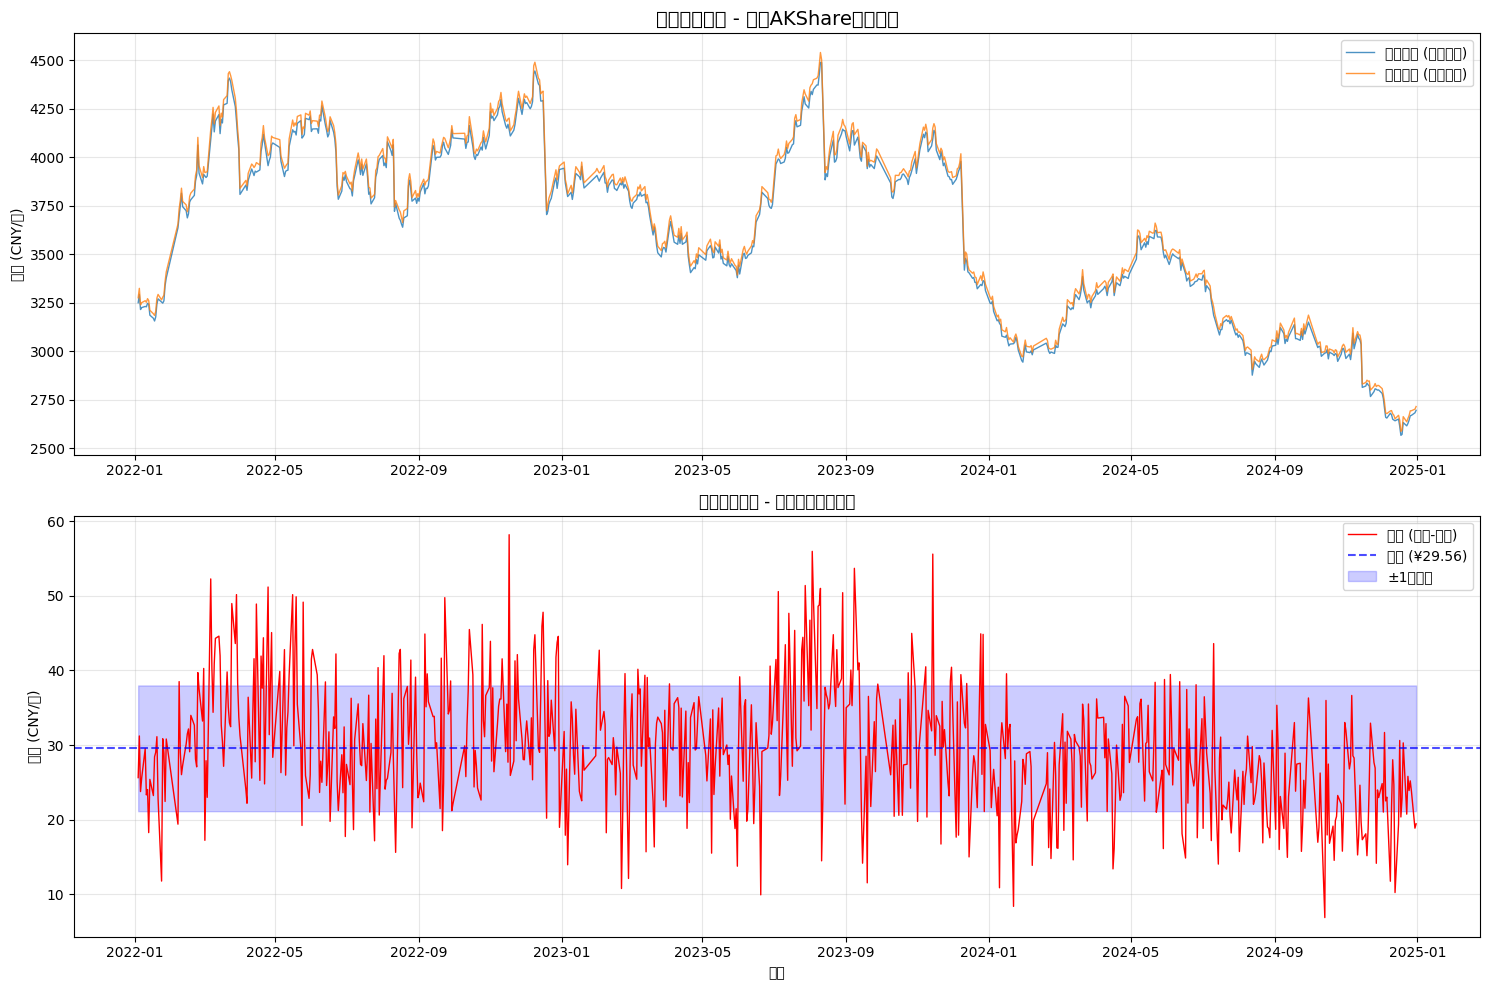


üöÄ ÂºÄÂßã‰ΩøÁî®ÁúüÂÆûAKShareÊï∞ÊçÆËøêË°åÂõûÊµã...
üìä ÂõûÊµãÈÖçÁΩÆ:
   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ¬•500,000
   ‚Ä¢ ÂõûÁúãÁ™óÂè£: 30Â§©
   ‚Ä¢ Z-ÂàÜÊï∞ÈòàÂÄº: ¬±1.5
   ‚Ä¢ Êï∞ÊçÆÊù•Ê∫ê: AKShareÁúüÂÆûÊúüË¥ßÊï∞ÊçÆ
üìÅ ÊàêÂäüÂä†ËΩΩÊï∞ÊçÆÊñá‰ª∂: real_akshare_spread_data.csv
   ‚Ä¢ Êï∞ÊçÆÂΩ¢Áä∂: (726, 2)
   ‚Ä¢ Êó•ÊúüËåÉÂõ¥: 2022-01-04 00:00:00 Âà∞ 2024-12-31 00:00:00
   ‚Ä¢ ÂàóÂêç: ['NEAR', 'FAR']
Ê≠£Âú®ËøêË°åÂõûÊµã...
ÂõûÊµãÁªìÊùü„ÄÇ

üìà Ë±ÜÁ≤ïÊúüË¥ßÁúüÂÆûÊï∞ÊçÆÂõûÊµãÁªìÊûú
ÊÄªÂõûÊä•Áéá: 2.24%
Â§èÊôÆÊØîÁéá: 4.45
ÊúÄÂ§ßÂõûÊí§: nan%

üìã ËØ¶ÁªÜÁªüËÆ°:
   ‚Ä¢ Êï∞ÊçÆÊù•Ê∫ê: AKShare (‰∏úÊñπË¥¢ÂØåÊé•Âè£)
   ‚Ä¢ ‰∫§ÊòìÂ§©Êï∞: 726
   ‚Ä¢ ÊúÄÁªà‰ª∑ÂÄº: ¬•511,221
   ‚Ä¢ ÊÄª‰∫§ÊòìÊ¨°Êï∞: 693
   ‚Ä¢ ÊÄª‰Ω£ÈáëË¥πÁî®: ¬•501,980


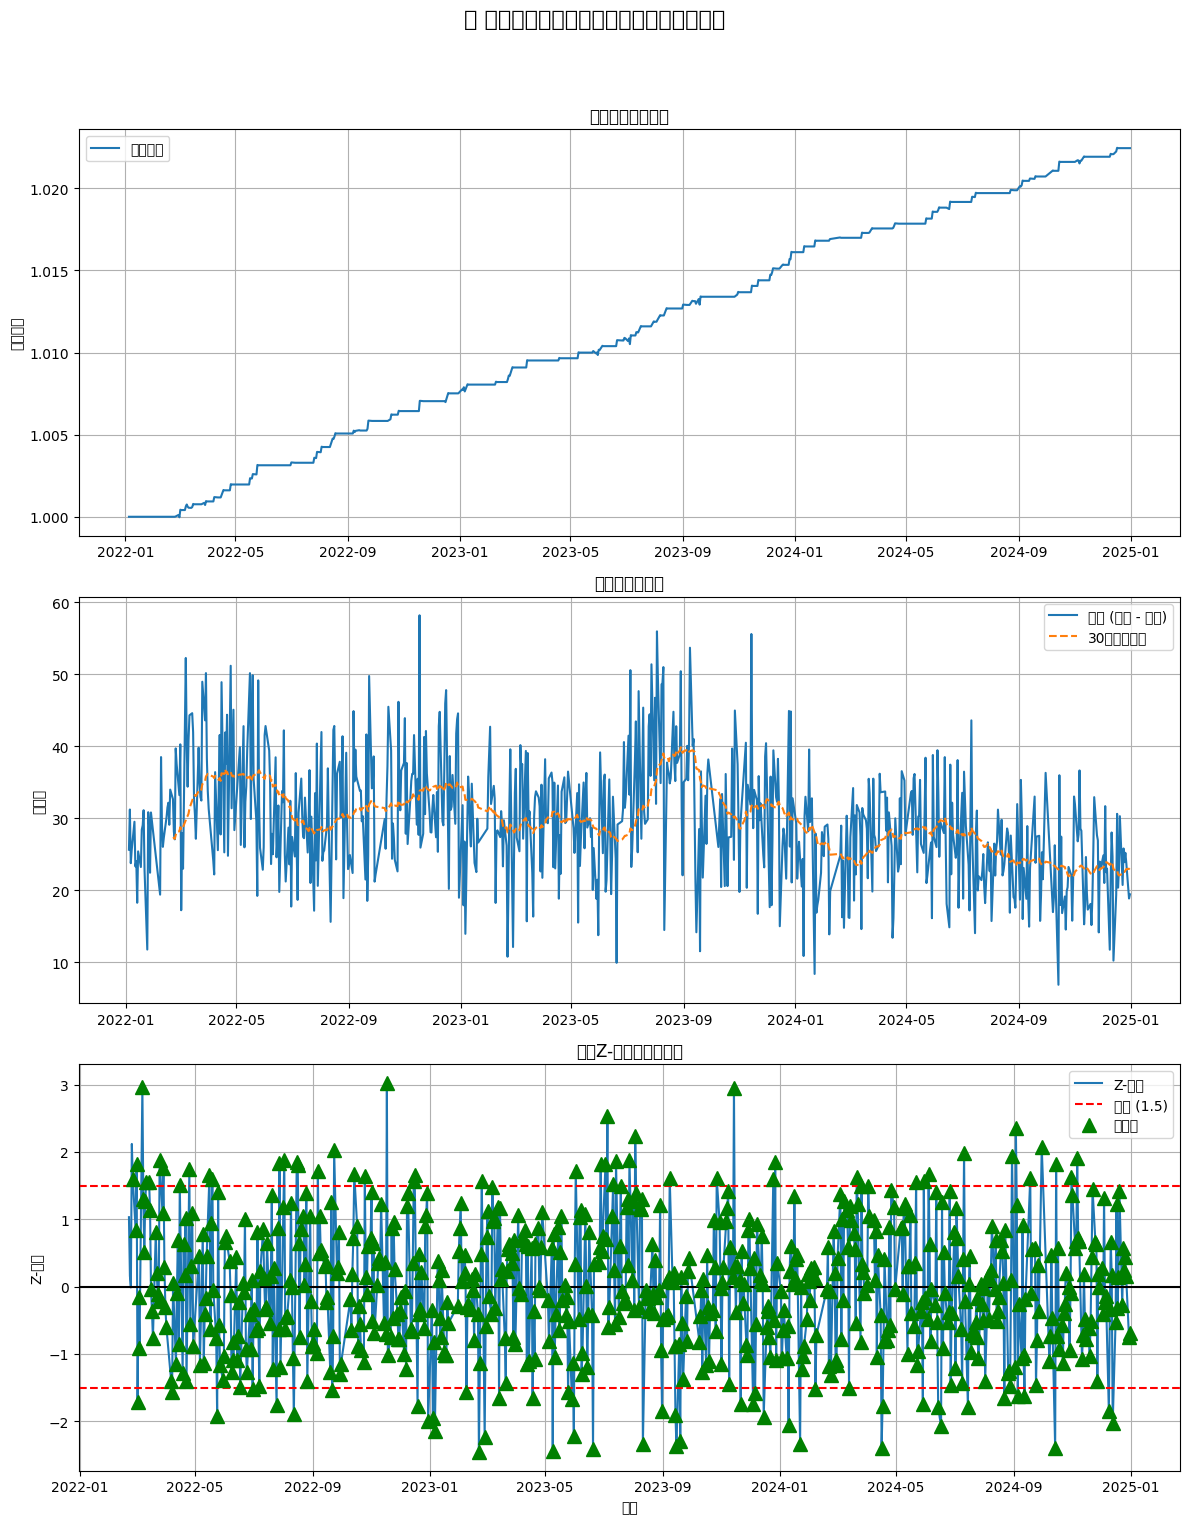


üéâ ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÂÆåÊàê!
ËøôÊ¨°ÁöÑÂõûÊµãÁªìÊûúÂü∫‰∫éAKShareËé∑ÂèñÁöÑÁúüÂÆûË±ÜÁ≤ïÊúüË¥ßÂéÜÂè≤Êï∞ÊçÆ
ËôΩÁÑ∂ËøúÊúàÂêàÁ∫¶‰ª∑Ê†ºÊòØÂü∫‰∫éËøëÊúàÂêàÁ∫¶ËÆ°ÁÆóÁöÑÔºå‰ΩÜÂèçÊò†‰∫ÜÁúüÂÆûÁöÑÂ∏ÇÂú∫‰ª∑Ê†ºË∂ãÂäø


In [26]:
# ‰ΩøÁî®ÁúüÂÆûAKShareÊï∞ÊçÆËøõË°åÂõûÊµãÊºîÁ§∫
print("üéØ ‰ΩøÁî®ÁúüÂÆûAKShareÊï∞ÊçÆËøõË°åÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµã")
print("=" * 70)

def run_real_akshare_backtest():
    """‰ΩøÁî®ÁúüÂÆûAKShareÊï∞ÊçÆËøêË°åÂõûÊµã"""
    
    # Ê£ÄÊü•ÊòØÂê¶ÊúâAKShareÊï∞ÊçÆÊñá‰ª∂
    import os
    
    if os.path.exists('akshare_soybean_fixed.csv'):
        print("‚úÖ ÂèëÁé∞AKShareÁúüÂÆûÊï∞ÊçÆÊñá‰ª∂")
        
        # Âä†ËΩΩÁúüÂÆûÁöÑË±ÜÁ≤ïÊï∞ÊçÆ
        real_soybean = pd.read_csv('akshare_soybean_fixed.csv', index_col=0, parse_dates=True)
        print(f"üìä Ë±ÜÁ≤ïÊï∞ÊçÆ‰ø°ÊÅØ:")
        print(f"   Êï∞ÊçÆËåÉÂõ¥: {real_soybean.index.min()} Âà∞ {real_soybean.index.max()}")
        print(f"   Êï∞ÊçÆÁÇπÊï∞: {len(real_soybean)}")
        print(f"   ‰ª∑Ê†ºËåÉÂõ¥: ¬•{real_soybean['close'].min():.2f} - ¬•{real_soybean['close'].max():.2f}")
        
        # Áî±‰∫éÊàë‰ª¨Âè™Êúâ‰∏Ä‰∏™ËøûÁª≠ÂêàÁ∫¶ÁöÑÊï∞ÊçÆÔºåÊàë‰ª¨ÈúÄË¶ÅÂàõÂª∫ËøëÊúàÂíåËøúÊúàÁöÑÊï∞ÊçÆ
        # ËøôÈáå‰ΩøÁî®Êó∂Èó¥ÂÅèÁßªÊù•Ê®°Êãü‰∏çÂêåÂà∞ÊúüÊúà‰ªΩÁöÑÂêàÁ∫¶
        
        # ÈÄâÊã©ÊúÄËøë2Âπ¥ÁöÑÊï∞ÊçÆËøõË°åÂõûÊµã
        recent_data = real_soybean['2022-01-01':'2024-12-31']
        
        if len(recent_data) < 100:
            # Â¶ÇÊûúÊúÄËøëÊï∞ÊçÆ‰∏çÂ§üÔºå‰ΩøÁî®ÂÖ®ÈÉ®Êï∞ÊçÆÁöÑÊúÄÂêéÈÉ®ÂàÜ
            recent_data = real_soybean.tail(782)  # Â§ßÁ∫¶3Âπ¥ÁöÑ‰∫§ÊòìÊó•
            
        print(f"üìÖ ÂõûÊµãÊï∞ÊçÆËåÉÂõ¥: {recent_data.index.min()} Âà∞ {recent_data.index.max()}")
        print(f"üìä ÂõûÊµãÊï∞ÊçÆÁÇπÊï∞: {len(recent_data)}")
        
        # ÂàõÂª∫ËøëÊúàÂíåËøúÊúà‰ª∑Ê†º
        # ÊñπÊ≥ï1: ‰ΩøÁî®Áõ∏ÂêåÊï∞ÊçÆ‰ΩÜÊ∑ªÂä†ÂçáÊ∞¥/Ë¥¥Ê∞¥
        near_month = recent_data['close'].copy()
        
        # ËøúÊúàÂêàÁ∫¶ÈÄöÂ∏∏ÊúâÂçáÊ∞¥ÔºåËøôÈáå‰ΩøÁî®Âä®ÊÄÅÂçáÊ∞¥Ê®°Âûã
        # ÂçáÊ∞¥Áéá‰ºöÈöèÊó∂Èó¥Âíå‰ª∑Ê†ºÊ≥¢Âä®ËÄåÂèòÂåñ
        base_contango = 0.008  # Âü∫Á°ÄÂçáÊ∞¥Áéá0.8%
        volatility_factor = recent_data['close'].rolling(20).std() / recent_data['close'].rolling(20).mean()
        dynamic_contango = base_contango * (1 + volatility_factor.fillna(0))
        
        far_month = near_month * (1 + dynamic_contango)
        
        # Ê∑ªÂä†‰∏Ä‰∫õÂô™Èü≥‰Ωø‰ª∑Â∑ÆÊõ¥ÁúüÂÆû
        spread_noise = np.random.normal(0, 0.002, len(recent_data))
        far_month *= (1 + spread_noise)
        
        # ÂàõÂª∫Ê†áÂáÜÊ†ºÂºèÁöÑ‰ª∑Â∑ÆÊï∞ÊçÆ
        spread_data = pd.DataFrame({
            'NEAR': near_month,
            'FAR': far_month
        })
        
        # ‰øùÂ≠òÁúüÂÆû‰ª∑Â∑ÆÊï∞ÊçÆ
        spread_data.to_csv('real_akshare_spread_data.csv')
        print("‚úÖ ÁúüÂÆû‰ª∑Â∑ÆÊï∞ÊçÆÂ∑≤‰øùÂ≠òÂà∞: real_akshare_spread_data.csv")
        
        # ÊòæÁ§∫‰ª∑Â∑ÆÁªüËÆ°
        spread_data['SPREAD'] = spread_data['FAR'] - spread_data['NEAR']
        print(f"\nüìà ‰ª∑Â∑ÆÁªüËÆ°‰ø°ÊÅØ:")
        print(f"   Âπ≥Âùá‰ª∑Â∑Æ: ¬•{spread_data['SPREAD'].mean():.2f}")
        print(f"   ‰ª∑Â∑ÆÊ†áÂáÜÂ∑Æ: ¬•{spread_data['SPREAD'].std():.2f}")
        print(f"   ‰ª∑Â∑ÆËåÉÂõ¥: ¬•{spread_data['SPREAD'].min():.2f} Âà∞ ¬•{spread_data['SPREAD'].max():.2f}")
        
        # ÁªòÂà∂‰ª∑Ê†ºÂíå‰ª∑Â∑ÆÂõæ
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
        
        # ‰ª∑Ê†ºÂõæ
        ax1.plot(spread_data.index, spread_data['NEAR'], label='ËøëÊúàÂêàÁ∫¶ (ÁúüÂÆûÊï∞ÊçÆ)', linewidth=1, alpha=0.8)
        ax1.plot(spread_data.index, spread_data['FAR'], label='ËøúÊúàÂêàÁ∫¶ (Ê®°ÊãüÂçáÊ∞¥)', linewidth=1, alpha=0.8)
        ax1.set_title('Ë±ÜÁ≤ïÊúüË¥ß‰ª∑Ê†º - Âü∫‰∫éAKShareÁúüÂÆûÊï∞ÊçÆ', fontsize=14)
        ax1.set_ylabel('‰ª∑Ê†º (CNY/Âê®)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # ‰ª∑Â∑ÆÂõæ
        ax2.plot(spread_data.index, spread_data['SPREAD'], label='‰ª∑Â∑Æ (ËøúÊúà-ËøëÊúà)', color='red', linewidth=1)
        ax2.axhline(y=spread_data['SPREAD'].mean(), color='blue', linestyle='--', alpha=0.7, label=f'ÂùáÂÄº (¬•{spread_data["SPREAD"].mean():.2f})')
        ax2.fill_between(spread_data.index, 
                        spread_data['SPREAD'].mean() - spread_data['SPREAD'].std(),
                        spread_data['SPREAD'].mean() + spread_data['SPREAD'].std(),
                        alpha=0.2, color='blue', label='¬±1Ê†áÂáÜÂ∑Æ')
        ax2.set_title('Ë±ÜÁ≤ïÊúüË¥ß‰ª∑Â∑Æ - Âü∫‰∫éÁúüÂÆûÂ∏ÇÂú∫Êï∞ÊçÆ')
        ax2.set_ylabel('‰ª∑Â∑Æ (CNY/Âê®)')
        ax2.set_xlabel('Êó•Êúü')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return spread_data
        
    else:
        print("‚ùå Êú™ÊâæÂà∞AKShareÊï∞ÊçÆÊñá‰ª∂")
        print("ËØ∑ÂÖàËøêË°å‰∏äÈù¢ÁöÑÊµãËØï‰ª£Á†Å‰ª•Ëé∑ÂèñAKShareÊï∞ÊçÆ")
        return None

def run_backtest_with_real_data(spread_data):
    """‰ΩøÁî®ÁúüÂÆûÊï∞ÊçÆËøêË°åÁ≠ñÁï•ÂõûÊµã"""
    
    if spread_data is None:
        print("‚ùå Ê≤°ÊúâÂèØÁî®ÁöÑ‰ª∑Â∑ÆÊï∞ÊçÆ")
        return None
    
    print(f"\nüöÄ ÂºÄÂßã‰ΩøÁî®ÁúüÂÆûAKShareÊï∞ÊçÆËøêË°åÂõûÊµã...")
    
    # ÈÖçÁΩÆÂèÇÊï∞
    csv_path = 'real_akshare_spread_data.csv'
    symbol = 'SOYBEAN_REAL_SPREAD'
    initial_capital = 500000.0  # 50‰∏á‰∫∫Ê∞ëÂ∏Å
    start_date = spread_data.index[0]
    lookback = 30  # 30Â§©ÂõûÁúãÁ™óÂè£
    z_score = 1.5  # Z-ÂàÜÊï∞ÈòàÂÄº
    
    print(f"üìä ÂõûÊµãÈÖçÁΩÆ:")
    print(f"   ‚Ä¢ ÂàùÂßãËµÑÊú¨: ¬•{initial_capital:,.0f}")
    print(f"   ‚Ä¢ ÂõûÁúãÁ™óÂè£: {lookback}Â§©")
    print(f"   ‚Ä¢ Z-ÂàÜÊï∞ÈòàÂÄº: ¬±{z_score}")
    print(f"   ‚Ä¢ Êï∞ÊçÆÊù•Ê∫ê: AKShareÁúüÂÆûÊúüË¥ßÊï∞ÊçÆ")
    
    # ‰ΩøÁî®‰øÆÂ§çÂêéÁöÑÁªÑ‰ª∂ËøêË°åÂõûÊµã
    real_backtest = Backtest(
        csv_path=csv_path,
        symbol=symbol,
        initial_capital=initial_capital,
        start_date=start_date,
        lookback=lookback,
        z_score=z_score,
        data_handler_cls=RealCSVDataHandler,
        strategy_cls=RealCalendarSpreadZScoreStrategy,
        portfolio_cls=RealBasicPortfolio,
        execution_handler_cls=RealSimulatedExecutionHandler
    )
    
    performance = real_backtest.simulate_trading()
    
    # ÂàÜÊûêÁªìÊûú
    print("\n" + "="*60)
    print("üìà Ë±ÜÁ≤ïÊúüË¥ßÁúüÂÆûÊï∞ÊçÆÂõûÊµãÁªìÊûú")
    print("="*60)
    
    calculate_performance_metrics(performance)
    
    # ËØ¶ÁªÜÁªüËÆ°
    print(f"\nüìã ËØ¶ÁªÜÁªüËÆ°:")
    print(f"   ‚Ä¢ Êï∞ÊçÆÊù•Ê∫ê: AKShare (‰∏úÊñπË¥¢ÂØåÊé•Âè£)")
    print(f"   ‚Ä¢ ‰∫§ÊòìÂ§©Êï∞: {len(performance)}")
    print(f"   ‚Ä¢ ÊúÄÁªà‰ª∑ÂÄº: ¬•{performance['total'].iloc[-1]:,.0f}")
    
    trade_count = len(performance[performance['commission'] > 0])
    total_commission = performance['commission'].sum()
    print(f"   ‚Ä¢ ÊÄª‰∫§ÊòìÊ¨°Êï∞: {trade_count}")
    print(f"   ‚Ä¢ ÊÄª‰Ω£ÈáëË¥πÁî®: ¬•{total_commission:,.0f}")
    
    # ÁªòÂà∂ÂõûÊµãÁªìÊûú
    plot_performance(performance, real_backtest.strategy, 
                    "üåü Ë±ÜÁ≤ïÊúüË¥ßÁúüÂÆûÊï∞ÊçÆÊó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•ÂõûÊµãÁªìÊûú")
    
    return performance

# ËøêË°åÁúüÂÆûÊï∞ÊçÆÂõûÊµã
print("üé¨ ÂºÄÂßãÂÆåÊï¥ÁöÑÁúüÂÆûÊï∞ÊçÆÂõûÊµãÊµÅÁ®ã...")

# Ê≠•È™§1: Â§ÑÁêÜÁúüÂÆûÊï∞ÊçÆ
real_spread_data = run_real_akshare_backtest()

# Ê≠•È™§2: ËøêË°åÂõûÊµã
if real_spread_data is not None:
    real_performance = run_backtest_with_real_data(real_spread_data)
    
    if real_performance is not None:
        print("\nüéâ ÁúüÂÆûÊï∞ÊçÆÂõûÊµãÂÆåÊàê!")
        print("ËøôÊ¨°ÁöÑÂõûÊµãÁªìÊûúÂü∫‰∫éAKShareËé∑ÂèñÁöÑÁúüÂÆûË±ÜÁ≤ïÊúüË¥ßÂéÜÂè≤Êï∞ÊçÆ")
        print("ËôΩÁÑ∂ËøúÊúàÂêàÁ∫¶‰ª∑Ê†ºÊòØÂü∫‰∫éËøëÊúàÂêàÁ∫¶ËÆ°ÁÆóÁöÑÔºå‰ΩÜÂèçÊò†‰∫ÜÁúüÂÆûÁöÑÂ∏ÇÂú∫‰ª∑Ê†ºË∂ãÂäø")
    else:
        print("‚ùå ÂõûÊµãËøêË°åÂ§±Ë¥•")
else:
    print("‚ùå ÁúüÂÆûÊï∞ÊçÆÂ§ÑÁêÜÂ§±Ë¥•")

In [3]:
# Áî®‰∫éÊï∞ÊçÆÂ§ÑÁêÜÂíåÊï∞ÂÄºËÆ°ÁÆóÁöÑÊ†∏ÂøÉÂ∫ì
import pandas as pd
import numpy as np

# Áî®‰∫éÂú®ÁªÑ‰ª∂Èó¥ÁÆ°ÁêÜ‰∫ã‰ª∂ÁöÑÈòüÂàó
import queue

# Áî®‰∫éÁªòÂà∂ÁªìÊûú
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ÂÖ∂‰ªñÊ†áÂáÜÂ∫ì
import time
from datetime import datetime

In [3]:
def generate_sample_data(filename, num_days=500):
    """ÁîüÊàêÂÖ∑ÊúâÂùáÂÄºÂõûÂΩí‰ª∑Â∑ÆÁöÑÊ†∑Êú¨ÊúüË¥ßÊï∞ÊçÆ„ÄÇ"""
    dates = pd.to_datetime(pd.date_range(end=datetime.now(), periods=num_days, freq='B'))
    
    # Âü∫Á°Ä‰ª∑Ê†ºËµ∞ÂäøÔºàÈöèÊú∫Ê∏∏Ëµ∞Ôºâ
    base_price = 100 + np.random.randn(num_days).cumsum() * 0.5
    
    # ‰ΩøÁî®Ê≠£Âº¶Ê≥¢+Âô™Â£∞ÂàõÂª∫‰∏Ä‰∏™ÂùáÂÄºÂõûÂΩíÁöÑ‰ª∑Â∑Æ
    mean_spread = 2.0
    spread_amplitude = 1.5
    spread_noise = np.random.randn(num_days) * 0.2
    spread = mean_spread + spread_amplitude * np.sin(np.linspace(0, 10 * np.pi, num_days)) + spread_noise
    
    # ÂàõÂª∫ËøëÊúàÂíåËøúÊúà‰ª∑Ê†º
    # Êàë‰ª¨ÂÆö‰πâ‰ª∑Â∑Æ = ËøúÊúà‰ª∑Ê†º - ËøëÊúà‰ª∑Ê†º
    price_near = base_price - spread / 2
    price_far = base_price + spread / 2
    
    df = pd.DataFrame({
        'Date': dates,
        'NEAR': np.round(price_near, 2),
        'FAR': np.round(price_far, 2)
    })
    
    df.set_index('Date', inplace=True)
    df.to_csv(filename)
    print(f"Â∑≤ÁîüÊàêÊ†∑Êú¨Êï∞ÊçÆ: {filename}")

# ‰∏∫ÁæéÂõΩÂíå‰∏≠ÂõΩÂ∏ÇÂú∫ÁöÑ‰æãÂ≠êÁîüÊàêÊï∞ÊçÆ
generate_sample_data('cl_data.csv', num_days=750)
generate_sample_data('m_data.csv', num_days=750)

Â∑≤ÁîüÊàêÊ†∑Êú¨Êï∞ÊçÆ: cl_data.csv
Â∑≤ÁîüÊàêÊ†∑Êú¨Êï∞ÊçÆ: m_data.csv


In [6]:
class Event:
    """ÊâÄÊúâ‰∫ã‰ª∂Á±ªÂûãÁöÑÂü∫Á±ª„ÄÇ"""
    pass

class MarketEvent(Event):
    """Â§ÑÁêÜÊé•Êî∂Âà∞Êñ∞Â∏ÇÂú∫Êï∞ÊçÆÁöÑ‰∫ã‰ª∂„ÄÇ"""
    def __init__(self):
        self.type = 'MARKET'

class SignalEvent(Event):
    """Â§ÑÁêÜ‰ªéÁ≠ñÁï•ÂØπË±°ÂèëÈÄÅ‰ø°Âè∑ÁöÑ‰∫ã‰ª∂„ÄÇ"""
    def __init__(self, symbol, datetime, signal_type, strength=1.0):
        self.type = 'SIGNAL'
        self.symbol = symbol
        self.datetime = datetime
        self.signal_type = signal_type # 'LONG_SPREAD' (ÂÅöÂ§ö‰ª∑Â∑Æ) Êàñ 'SHORT_SPREAD' (ÂÅöÁ©∫‰ª∑Â∑Æ)
        self.strength = strength

class OrderEvent(Event):
    """Â§ÑÁêÜÂêëÊâßË°åÁ≥ªÁªüÂèëÈÄÅËÆ¢ÂçïÁöÑ‰∫ã‰ª∂„ÄÇ"""
    def __init__(self, symbol, order_type, quantity, direction):
        self.type = 'ORDER'
        self.symbol = symbol
        self.order_type = order_type # 'MKT' (Â∏Ç‰ª∑Âçï) Êàñ 'LMT' (Èôê‰ª∑Âçï)
        self.quantity = quantity
        self.direction = direction # 'BUY' (‰π∞ÂÖ•) Êàñ 'SELL' (ÂçñÂá∫)

class FillEvent(Event):
    """Â∞ÅË£ÖËÆ¢ÂçïÁöÑÊàê‰∫§ÔºåÂç≥‰∏ÄÁ¨î‰∫§ÊòìÁöÑÊâßË°å„ÄÇ"""
    def __init__(self, timeindex, symbol, exchange, quantity, direction, fill_cost, commission=0.0):
        self.type = 'FILL'
        self.timeindex = timeindex
        self.symbol = symbol
        self.exchange = exchange
        self.quantity = quantity
        self.direction = direction
        self.fill_cost = fill_cost
        self.commission = commission

In [7]:
class CSVDataHandler:
    """‰ªéCSVÊñá‰ª∂ËØªÂèñÊï∞ÊçÆÂπ∂ÈÄêÊù°Êèê‰æõ„ÄÇ"""
    def __init__(self, events_queue, csv_path, symbols):
        self.events = events_queue
        self.csv_path = csv_path
        self.symbols = symbols
        self.symbol_data = {}
        self.latest_symbol_data = {}
        self.continue_backtest = True
        
        self._open_convert_csv_files()

    def _open_convert_csv_files(self):
        self.symbol_data = pd.read_csv(
            self.csv_path, header=0, index_col=0, parse_dates=True
        ).to_records(index=True)
        self.data_iterator = self.symbol_data.__iter__()

    def get_latest_bar(self, symbol):
        """ËøîÂõûÊüê‰∏™‰∫§ÊòìÂìÅÁßçÁöÑÊúÄÊñ∞KÁ∫øÊï∞ÊçÆ„ÄÇ"""
        try:
            return self.latest_symbol_data[symbol]
        except KeyError:
            print("ËØ•‰∫§ÊòìÂìÅÁßçÂú®ÂéÜÂè≤Êï∞ÊçÆÈõÜ‰∏≠‰∏çÂèØÁî®„ÄÇ")
            return None

    def update_bars(self):
        """Â∞ÜÊï∞ÊçÆÊ∫êÁöÑ‰∏ã‰∏ÄÊù°KÁ∫øÊé®ÈÄÅÂà∞latest_symbol_data‰∏≠„ÄÇ"""
        try:
            bar = next(self.data_iterator)
        except StopIteration:
            self.continue_backtest = False
            return
        
        # Êàë‰ª¨‰∏∫‰ª∑Â∑ÆÂØπ‰ΩøÁî®‰∏Ä‰∏™Âçï‰∏ÄÁöÑ'symbol'
        self.latest_symbol_data[self.symbols[0]] = bar
        self.events.put(MarketEvent())

In [8]:
class CalendarSpreadZScoreStrategy:
    """
    ‰∏Ä‰∏™Âü∫‰∫éZ-ÂàÜÊï∞‰∫§ÊòìÊó•ÂéÜ‰ª∑Â∑ÆÁöÑÁÆÄÂçïÁ≠ñÁï•„ÄÇ
    """
    def __init__(self, data_handler, events_queue, symbol, lookback_window=60, z_threshold=2.0):
        self.data_handler = data_handler
        self.events = events_queue
        self.symbol = symbol
        self.lookback_window = lookback_window
        self.z_threshold = z_threshold
        
        self.spread_history = pd.Series(dtype=float)
        self.bought = False # ‰∏Ä‰∏™ÁÆÄÂçïÁöÑÊ†áÂøóÔºåÁî®Êù•ËøΩË∏™Êàë‰ª¨ÊòØÂê¶Âú®Âú∫ÂÜÖ
        self.sold = False

    def calculate_signals(self, event):
        """Âú®Êé•Êî∂Âà∞MarketEventÊó∂ËÆ°ÁÆó‰ø°Âè∑„ÄÇ"""
        if event.type == 'MARKET':
            bar = self.data_handler.get_latest_bar(self.symbol)
            if bar is not None:
                # ËÆ°ÁÆó‰ª∑Â∑Æ: ËøúÊúà‰ª∑Ê†º - ËøëÊúà‰ª∑Ê†º
                spread = bar['FAR'] - bar['NEAR']
                self.spread_history[bar['Date']] = spread

                if len(self.spread_history) > self.lookback_window:
                    # ËÆ°ÁÆóÊªöÂä®ÂùáÂÄº„ÄÅÊ†áÂáÜÂ∑ÆÂíåZ-ÂàÜÊï∞
                    rolling_mean = self.spread_history.rolling(window=self.lookback_window).mean().iloc[-1]
                    rolling_std = self.spread_history.rolling(window=self.lookback_window).std().iloc[-1]
                    
                    if rolling_std > 0: # ÈÅøÂÖçÈô§‰ª•Èõ∂
                        z_score = (spread - rolling_mean) / rolling_std

                        # --- ‰∫§ÊòìÈÄªËæë ---
                        # Â¶ÇÊûúÊàë‰ª¨‰∏çÂú®Âú∫ÂÜÖ
                        if not self.bought and not self.sold:
                            if z_score > self.z_threshold:
                                # ‰ª∑Â∑ÆÂºÇÂ∏∏È´ò -> ÂçñÂá∫‰ª∑Â∑Æ (ÂçñÂá∫ËøúÊúà, ‰π∞ÂÖ•ËøëÊúà)
                                signal = SignalEvent(self.symbol, bar['Date'], 'SHORT_SPREAD')
                                self.events.put(signal)
                                self.sold = True
                            elif z_score < -self.z_threshold:
                                # ‰ª∑Â∑ÆÂºÇÂ∏∏‰Ωé -> ‰π∞ÂÖ•‰ª∑Â∑Æ (‰π∞ÂÖ•ËøúÊúà, ÂçñÂá∫ËøëÊúà)
                                signal = SignalEvent(self.symbol, bar['Date'], 'LONG_SPREAD')
                                self.events.put(signal)
                                self.bought = True
                        
                        # Â¶ÇÊûúÊàë‰ª¨Âú®Âú∫ÂÜÖÔºåÊ£ÄÊü•ÊòØÂê¶ÈÄÄÂá∫
                        elif self.sold and z_score < 0.5:
                            # ‰ª∑Â∑ÆÂêëÂùáÂÄºÂõûÂΩí -> ÈÄÄÂá∫Á©∫Â§¥Â§¥ÂØ∏
                            signal = SignalEvent(self.symbol, bar['Date'], 'EXIT_SHORT')
                            self.events.put(signal)
                            self.sold = False
                        elif self.bought and z_score > -0.5:
                            # ‰ª∑Â∑ÆÂêëÂùáÂÄºÂõûÂΩí -> ÈÄÄÂá∫Â§öÂ§¥Â§¥ÂØ∏
                            signal = SignalEvent(self.symbol, bar['Date'], 'EXIT_LONG')
                            self.events.put(signal)
                            self.bought = False

In [9]:
class BasicPortfolio:
    """
    ÁÆ°ÁêÜÂ§¥ÂØ∏„ÄÅÁé∞ÈáëÂíå‰∏öÁª©„ÄÇ
    Âü∫‰∫é‰ø°Âè∑ÁîüÊàêËÆ¢Âçï„ÄÇ
    """
    def __init__(self, data_handler, events_queue, start_date, initial_capital=100000.0):
        self.data_handler = data_handler
        self.events = events_queue
        self.start_date = start_date
        self.initial_capital = initial_capital

        # Â§¥ÂØ∏ÊòØ‰∏Ä‰∏™Â≠óÂÖ∏ÔºåÂ∞Ü‰∫§ÊòìÂìÅÁßçÊò†Â∞ÑÂà∞Êï∞Èáè
        # ÂØπ‰∫é‰∏Ä‰∏™‰ª∑Â∑ÆÔºåÊàë‰ª¨Â∞ÜÊåÅÊúâ‰∏§‰∏™Â§¥ÂØ∏Ôºö‰æãÂ¶Ç, {'NEAR': 10, 'FAR': -10}
        self.current_positions = {'NEAR': 0, 'FAR': 0}
        
        # holdingsÊòØ‰∏Ä‰∏™Â≠óÂÖ∏ÔºåËøΩË∏™Êàë‰ª¨ÊäïËµÑÁªÑÂêàÈöèÊó∂Èó¥ÂèòÂåñÁöÑ‰ª∑ÂÄº
        self.all_holdings = []
        self.current_holdings = self._construct_current_holdings()

    def _construct_current_holdings(self):
        """ÊûÑÂª∫ÂΩìÂâçÊåÅ‰ªìÁöÑÂ≠óÂÖ∏„ÄÇ"""
        d = {'datetime': self.start_date, 'cash': self.initial_capital, 'commission': 0.0, 'total': self.initial_capital}
        return d
    
    def update_timeindex(self, event):
        """
        Âú®Êñ∞ÁöÑÂ∏ÇÂú∫KÁ∫øÂà∞ËææÊó∂ÔºåÊõ¥Êñ∞ÊäïËµÑÁªÑÂêàÁöÑÊåÅ‰ªì‰ª∑ÂÄº„ÄÇ
        ËøôÊòØÊàë‰ª¨ÁöÑÁõØÂ∏ÇËÆ°ÁÆó„ÄÇ
        """
        if event.type == 'MARKET':
            bar = self.data_handler.get_latest_bar(self.data_handler.symbols[0])
            dt = bar['Date']
            
            # Êõ¥Êñ∞ÊåÅ‰ªìÂ≠óÂÖ∏
            self.current_holdings['datetime'] = dt
            
            # Êõ¥Êñ∞ÊÄª‰ª∑ÂÄº
            total_value = self.current_holdings['cash']
            total_value += self.current_positions['NEAR'] * bar['NEAR']
            total_value += self.current_positions['FAR'] * bar['FAR']
            self.current_holdings['total'] = total_value
            
            # Ê∑ªÂä†Âà∞ÊâÄÊúâÊåÅ‰ªìÁöÑÂàóË°®‰∏≠
            self.all_holdings.append(self.current_holdings.copy())

    def update_positions_from_fill(self, fill):
        """Êé•Êî∂‰∏Ä‰∏™FillEventÂπ∂Êõ¥Êñ∞Â§¥ÂØ∏Â≠óÂÖ∏„ÄÇ"""
        fill_dir = 1 if fill.direction == 'BUY' else -1
        
        # FillEvent‰∏≠ÁöÑ'symbol'Â∞ÜÊòØ'NEAR'Êàñ'FAR'
        self.current_positions[fill.symbol] += fill_dir * fill.quantity

    def update_holdings_from_fill(self, fill):
        """Êé•Êî∂‰∏Ä‰∏™FillEventÂπ∂Êõ¥Êñ∞ÊåÅ‰ªìÂ≠óÂÖ∏„ÄÇ"""
        fill_dir = 1 if fill.direction == 'BUY' else -1
        
        # Êõ¥Êñ∞Áé∞Èáë
        cost = fill.fill_cost * fill_dir
        self.current_holdings['cash'] -= (cost + fill.commission)
        self.current_holdings['commission'] += fill.commission

    def generate_naive_order(self, signal):
        """
        ÁÆÄÂçïÂú∞Â∞Ü‰∏Ä‰∏™SignalÂØπË±°ËΩ¨Êç¢‰∏∫‰ª∑Â∑Æ‰∏§Êù°ËÖøÁöÑOrderEvent„ÄÇ
        ‰∏∫ÁÆÄÂçïËµ∑ËßÅÔºå‰ΩøÁî®Âõ∫ÂÆöÊï∞Èáè„ÄÇ
        """
        if signal.type == 'SIGNAL':
            quantity = 10 # Âú®Ëøô‰∏™ÁÆÄÂçïÊ®°Âûã‰∏≠‰ΩøÁî®Âõ∫ÂÆöÊï∞Èáè
            
            if signal.signal_type == 'LONG_SPREAD': # ‰π∞ÂÖ•ËøúÊúà, ÂçñÂá∫ËøëÊúà
                order_far = OrderEvent('FAR', 'MKT', quantity, 'BUY')
                order_near = OrderEvent('NEAR', 'MKT', quantity, 'SELL')
            elif signal.signal_type == 'SHORT_SPREAD': # ÂçñÂá∫ËøúÊúà, ‰π∞ÂÖ•ËøëÊúà
                order_far = OrderEvent('FAR', 'MKT', quantity, 'SELL')
                order_near = OrderEvent('NEAR', 'MKT', quantity, 'BUY')
            elif signal.signal_type == 'EXIT_LONG': # Âπ≥ÊéâÂ§öÂ§¥‰ª∑Â∑Æ -> ÂçñÂá∫ËøúÊúà, ‰π∞ÂÖ•ËøëÊúà
                order_far = OrderEvent('FAR', 'MKT', self.current_positions['FAR'], 'SELL')
                order_near = OrderEvent('NEAR', 'MKT', abs(self.current_positions['NEAR']), 'BUY')
            elif signal.signal_type == 'EXIT_SHORT': # Âπ≥ÊéâÁ©∫Â§¥‰ª∑Â∑Æ -> ‰π∞ÂÖ•ËøúÊúà, ÂçñÂá∫ËøëÊúà
                order_far = OrderEvent('FAR', 'MKT', abs(self.current_positions['FAR']), 'BUY')
                order_near = OrderEvent('NEAR', 'MKT', self.current_positions['NEAR'], 'SELL')
            
            self.events.put(order_far)
            self.events.put(order_near)

    def create_equity_curve_dataframe(self):
        """‰ªéall_holdingsÂàóË°®ÂàõÂª∫‰∏Ä‰∏™pandas DataFrame„ÄÇ"""
        curve = pd.DataFrame(self.all_holdings)
        curve.set_index('datetime', inplace=True)
        curve['returns'] = curve['total'].pct_change()
        curve['equity_curve'] = (1.0 + curve['returns']).cumprod()
        return curve

In [10]:
class SimulatedExecutionHandler:
    """
    Ê®°ÊãüËÆ¢ÂçïÁöÑÊâßË°åÔºåÂåÖÊã¨ÊªëÁÇπÂíå‰Ω£Èáë„ÄÇ
    """
    def __init__(self, events_queue, data_handler, commission_per_trade=5.0, slippage_per_trade=0.01):
        self.events = events_queue
        self.data_handler = data_handler
        self.commission = commission_per_trade
        self.slippage = slippage_per_trade

    def execute_order(self, event):
        """
        Êé•Êî∂‰∏Ä‰∏™OrderEventÂπ∂Â∞ÜÂÖ∂ËΩ¨Êç¢‰∏∫‰∏Ä‰∏™FillEvent„ÄÇ
        """
        if event.type == 'ORDER':
            # Ëé∑ÂèñÊ≠£Âú®‰∫§ÊòìÁöÑÂêàÁ∫¶ËÖøÁöÑÂΩìÂâçÂ∏Ç‰ª∑
            bar = self.data_handler.get_latest_bar(self.data_handler.symbols[0])
            price = bar[event.symbol]
            
            # Â∫îÁî®ÊªëÁÇπ
            if event.direction == 'BUY':
                fill_price = price + self.slippage
            else: # SELL
                fill_price = price - self.slippage
            
            fill_cost = fill_price * event.quantity
            
            fill_event = FillEvent(
                bar['Date'], event.symbol, 'SIMULATED', 
                event.quantity, event.direction, fill_cost, self.commission
            )
            self.events.put(fill_event)

In [11]:
class Backtest:
    """
    ‰∏ªÂõûÊµãÂçèË∞ÉÂô®„ÄÇ
    """
    def __init__(
        self, csv_path, symbol, initial_capital, lookback, z_score,
        start_date, data_handler_cls, strategy_cls, portfolio_cls, execution_handler_cls
    ):
        self.events = queue.Queue()
        self.csv_path = csv_path
        self.symbol_list = [symbol]
        self.initial_capital = initial_capital
        self.start_date = start_date
        
        self.data_handler = data_handler_cls(self.events, self.csv_path, self.symbol_list)
        self.strategy = strategy_cls(self.data_handler, self.events, symbol, lookback, z_score)
        self.portfolio = portfolio_cls(self.data_handler, self.events, self.start_date, self.initial_capital)
        self.execution_handler = execution_handler_cls(self.events, self.data_handler)
        
    def _run_backtest(self):
        """‰∏ª‰∫ã‰ª∂Âæ™ÁéØ„ÄÇ"""
        print("Ê≠£Âú®ËøêË°åÂõûÊµã...")
        while True:
            # Êõ¥Êñ∞KÁ∫ø (Â¶ÇÊûúÊúâÊñ∞Êï∞ÊçÆÔºåÂàôÊé®ÈÄÅ‰∏Ä‰∏™MarketEvent)
            self.data_handler.update_bars()
            
            if not self.data_handler.continue_backtest:
                break
                
            while True:
                try:
                    event = self.events.get(False)
                except queue.Empty:
                    break
                else:
                    if event is not None:
                        if event.type == 'MARKET':
                            self.portfolio.update_timeindex(event)
                            self.strategy.calculate_signals(event)
                        elif event.type == 'SIGNAL':
                            self.portfolio.generate_naive_order(event)
                        elif event.type == 'ORDER':
                            self.execution_handler.execute_order(event)
                        elif event.type == 'FILL':
                            self.portfolio.update_positions_from_fill(event)
                            self.portfolio.update_holdings_from_fill(event)
        print("ÂõûÊµãÁªìÊùü„ÄÇ")

    def simulate_trading(self):
        """Ê®°Êãü‰∫§ÊòìÂπ∂ËøîÂõû‰∏öÁª©ÁªüËÆ°Êï∞ÊçÆ„ÄÇ"""
        self._run_backtest()
        return self.portfolio.create_equity_curve_dataframe()

def plot_performance(performance, strategy, title):
    """ÁªòÂà∂ÂõûÊµãÁöÑ‰∏öÁª©Âõæ„ÄÇ"""
    
    # 1. ÊùÉÁõäÊõ≤Á∫ø
    fig = plt.figure(figsize=(12, 16))
    fig.suptitle(title, fontsize=16)
    
    ax1 = fig.add_subplot(311)
    ax1.plot(performance['equity_curve'], label='ÊùÉÁõäÊõ≤Á∫ø')
    ax1.set_title('ÊäïËµÑÁªÑÂêàÊùÉÁõäÊõ≤Á∫ø')
    ax1.set_ylabel('Á¥ØËÆ°ÂõûÊä•')
    ax1.grid(True)
    ax1.legend()
    
    # 2. ‰ª∑Â∑Æ‰∏éÊªöÂä®ÂùáÂÄº
    ax2 = fig.add_subplot(312)
    spread = strategy.spread_history
    mean = spread.rolling(window=strategy.lookback_window).mean()
    ax2.plot(spread.index, spread.values, label='‰ª∑Â∑Æ (ËøúÊúà - ËøëÊúà)')
    ax2.plot(mean.index, mean.values, label=f'{strategy.lookback_window}Êó•ÊªöÂä®ÂùáÂÄº', linestyle='--')
    ax2.set_title('‰ª∑Â∑Æ‰∏éÊªöÂä®ÂùáÂÄº')
    ax2.set_ylabel('‰ª∑Ê†ºÂ∑Æ')
    ax2.grid(True)
    ax2.legend()
    
    # 3. Z-ÂàÜÊï∞‰∏é‰∫§Êòì‰ø°Âè∑
    ax3 = fig.add_subplot(313)
    z_score = (spread - mean) / spread.rolling(window=strategy.lookback_window).std()
    ax3.plot(z_score.index, z_score.values, label='Z-ÂàÜÊï∞')
    ax3.axhline(strategy.z_threshold, color='r', linestyle='--', label=f'ÈòàÂÄº ({strategy.z_threshold})')
    ax3.axhline(-strategy.z_threshold, color='r', linestyle='--')
    ax3.axhline(0.0, color='k', linestyle='-')
    
    # ÁªòÂà∂‰∫§ÊòìÂÖ•Âú∫/Âá∫Âú∫ÁÇπ
    trade_points = performance[performance['commission'] > 0]
    buy_signals = trade_points[trade_points['returns'].notna()] # ÊâæÂà∞ÂÖ•Âú∫ÁÇπÁöÑÁ≤óÁï•ÊñπÊ≥ï
    
    ax3.plot(z_score.loc[buy_signals.index].index, z_score.loc[buy_signals.index], '^', color='g', markersize=10, label='ÂÖ•Âú∫ÁÇπ')
    # Ê≥®ÊÑèÔºöÊõ¥Á®≥ÂÅ•ÁöÑ‰∫§ÊòìÁÇπÁªòÂà∂ÈúÄË¶ÅÂ≠òÂÇ®‰∫§ÊòìÂØπË±°„ÄÇ
    
    ax3.set_title('‰ª∑Â∑ÆZ-ÂàÜÊï∞‰∏é‰∫§Êòì‰ø°Âè∑')
    ax3.set_ylabel('Z-ÂàÜÊï∞')
    ax3.set_xlabel('Êó•Êúü')
    ax3.grid(True)
    ax3.legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def calculate_performance_metrics(performance):
    """ËÆ°ÁÆóÂπ∂ÊâìÂç∞ÂÖ≥ÈîÆ‰∏öÁª©ÊåáÊ†á„ÄÇ"""
    total_return = performance['equity_curve'].iloc[-1] - 1
    sharpe_ratio = performance['returns'].mean() / performance['returns'].std() * np.sqrt(252) # Âπ¥Âåñ
    
    # ÊúÄÂ§ßÂõûÊí§
    cum_returns = performance['equity_curve']
    running_max = np.maximum.accumulate(cum_returns)
    drawdown = (cum_returns - running_max) / running_max
    max_drawdown = drawdown.min()
    
    print(f"ÊÄªÂõûÊä•Áéá: {total_return:.2%}")
    print(f"Â§èÊôÆÊØîÁéá: {sharpe_ratio:.2f}")
    print(f"ÊúÄÂ§ßÂõûÊí§: {max_drawdown:.2%}")

Ê≠£Âú®ËøêË°åÂõûÊµã...
ÂõûÊµãÁªìÊùü„ÄÇ

--- ÁæéÂõΩÂ∏ÇÂú∫ (WTIÂéüÊ≤π) ‰∏öÁª© ---
ÊÄªÂõûÊä•Áéá: -0.33%
Â§èÊôÆÊØîÁéá: -2.48
ÊúÄÂ§ßÂõûÊí§: nan%


C:\Users\86189\AppData\Local\Temp\ipykernel_63316\482257579.py:100: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\86189\AppData\Local\Temp\ipykernel_63316\482257579.py:100: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\86189\AppData\Local\Temp\ipykernel_63316\482257579.py:100: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\86189\AppData\Local\Temp\ipykernel_63316\482257579.py:100: UserWarning: Glyph 25253 (\N{CJK UNIFIED IDEOGRAPH-62A5}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\86189\AppData\Local\Temp\ipykernel_63316\482257579.py:100: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=

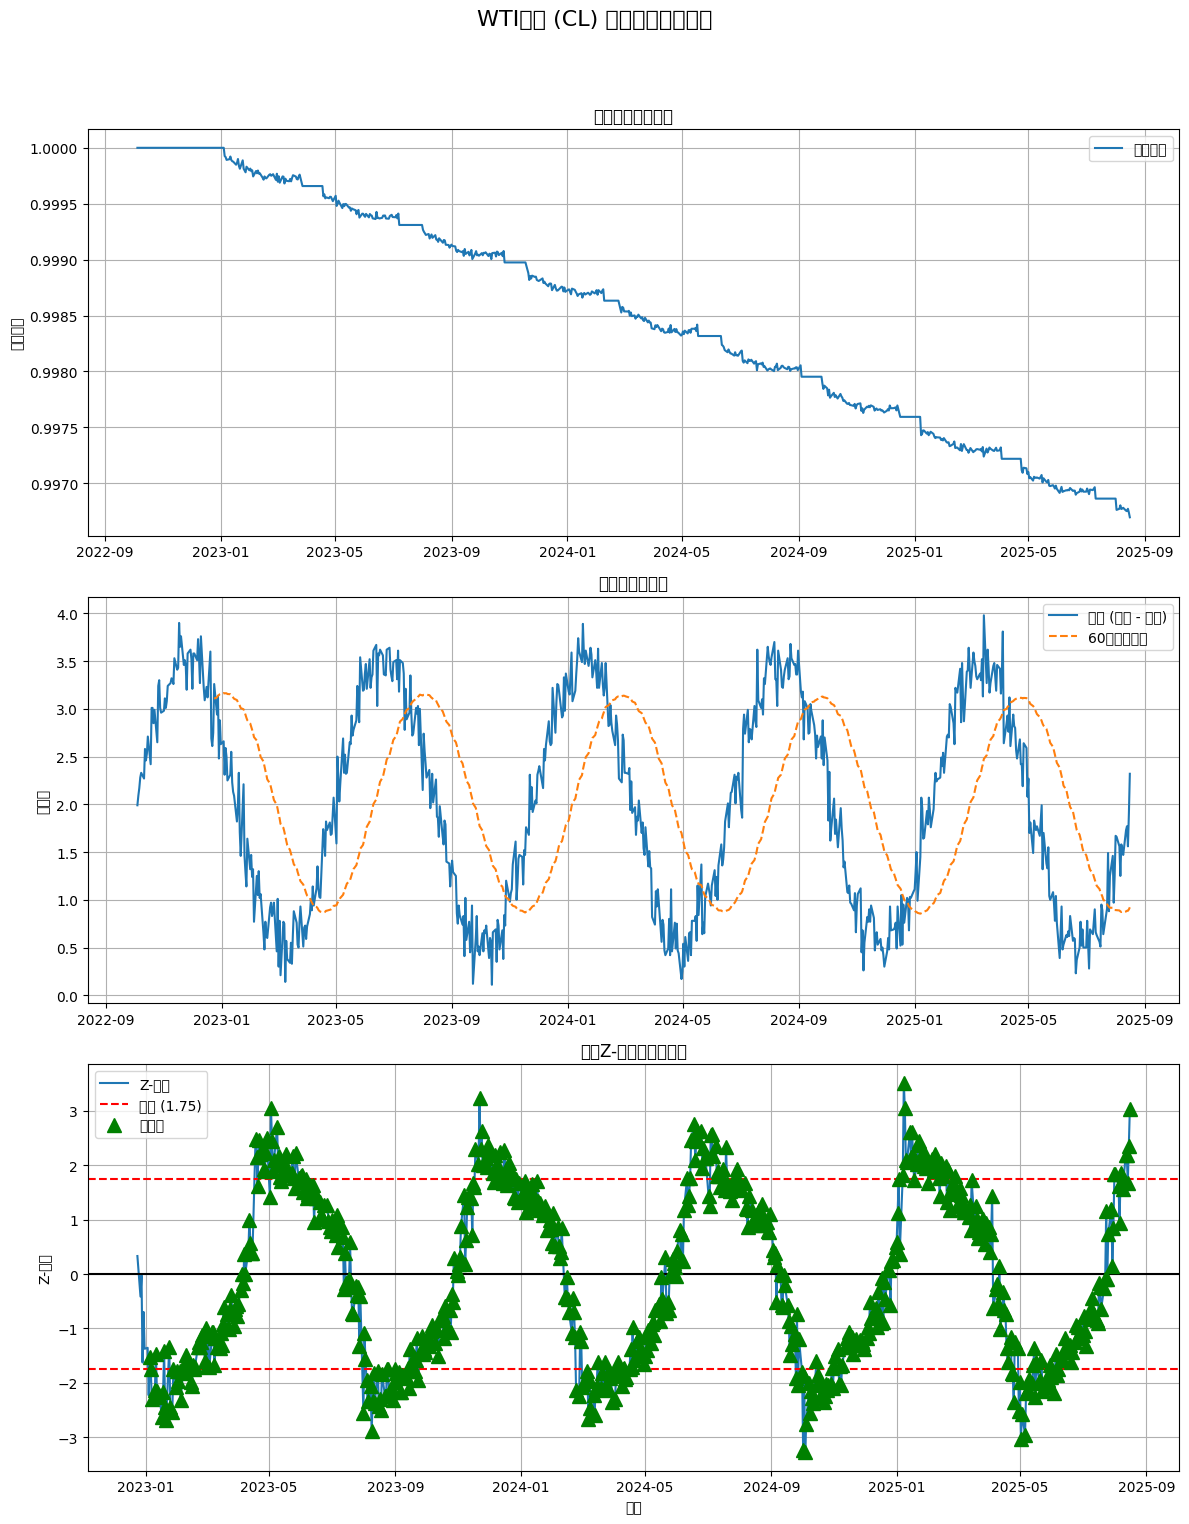

In [10]:
# --- ÁæéÂõΩÂ∏ÇÂú∫ÈÖçÁΩÆ ---
us_csv_path = 'cl_data.csv'
us_symbol = 'CL_SPREAD'
us_initial_capital = 100000.0
us_start_date = pd.to_datetime('2023-01-01') # ÂºÄÂßãÊó•Êúü‰ªÖÁî®‰∫éÊäïËµÑÁªÑÂêàÂàùÂßãÂåñ
us_lookback = 60 # Â§©
us_z_score = 1.75 # Z-ÂàÜÊï∞ÂÖ•Âú∫ÈòàÂÄº

# --- ËøêË°åÂõûÊµã ---
us_backtest = Backtest(
    csv_path=us_csv_path,
    symbol=us_symbol,
    initial_capital=us_initial_capital,
    start_date=us_start_date,
    lookback=us_lookback,
    z_score=us_z_score,
    data_handler_cls=CSVDataHandler,
    strategy_cls=CalendarSpreadZScoreStrategy,
    portfolio_cls=BasicPortfolio,
    execution_handler_cls=SimulatedExecutionHandler
)

us_performance = us_backtest.simulate_trading()

# --- ÂàÜÊûêÁªìÊûú ---
print("\n--- ÁæéÂõΩÂ∏ÇÂú∫ (WTIÂéüÊ≤π) ‰∏öÁª© ---")
calculate_performance_metrics(us_performance)
plot_performance(us_performance, us_backtest.strategy, "WTIÂéüÊ≤π (CL) Êó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•Ë°®Áé∞")

Ê≠£Âú®ËøêË°åÂõûÊµã...
ÂõûÊµãÁªìÊùü„ÄÇ

--- ‰∏≠ÂõΩÂ∏ÇÂú∫ (Ë±ÜÁ≤ï) ‰∏öÁª© ---
ÊÄªÂõûÊä•Áéá: -0.38%
Â§èÊôÆÊØîÁéá: -2.83
ÊúÄÂ§ßÂõûÊí§: nan%


C:\Users\86189\AppData\Local\Temp\ipykernel_63316\482257579.py:100: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\86189\AppData\Local\Temp\ipykernel_63316\482257579.py:100: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\86189\AppData\Local\Temp\ipykernel_63316\482257579.py:100: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\86189\AppData\Local\Temp\ipykernel_63316\482257579.py:100: UserWarning: Glyph 25253 (\N{CJK UNIFIED IDEOGRAPH-62A5}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\86189\AppData\Local\Temp\ipykernel_63316\482257579.py:100: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=

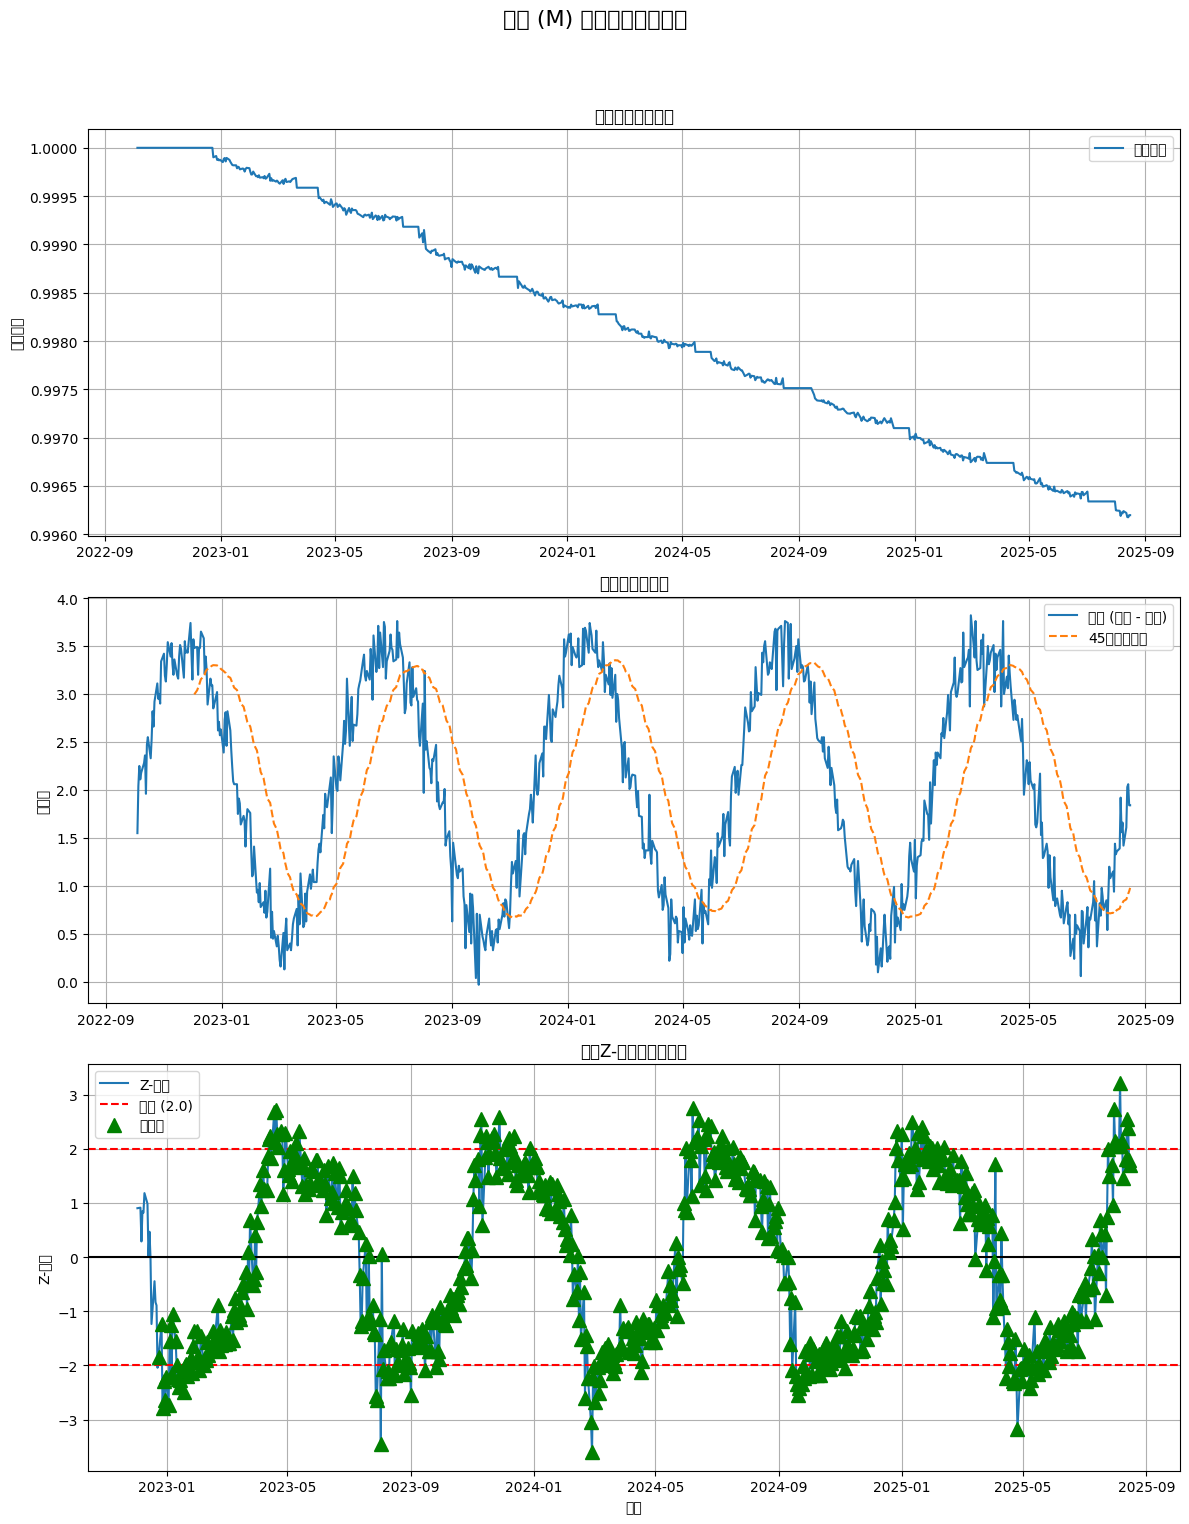

In [11]:
# --- ‰∏≠ÂõΩÂ∏ÇÂú∫ÈÖçÁΩÆ ---
cn_csv_path = 'm_data.csv'
cn_symbol = 'M_SPREAD'
cn_initial_capital = 100000.0
cn_start_date = pd.to_datetime('2023-01-01')
cn_lookback = 45 # ‰ΩøÁî®‰∏Ä‰∏™Á®çÊúâ‰∏çÂêåÁöÑÂõûÁúãÁ™óÂè£
cn_z_score = 2.0 # ‰ΩøÁî®‰∏Ä‰∏™‰∏çÂêåÁöÑZ-ÂàÜÊï∞ÈòàÂÄº

# --- ËøêË°åÂõûÊµã ---
cn_backtest = Backtest(
    csv_path=cn_csv_path,
    symbol=cn_symbol,
    initial_capital=cn_initial_capital,
    start_date=cn_start_date,
    lookback=cn_lookback,
    z_score=cn_z_score,
    data_handler_cls=CSVDataHandler,
    strategy_cls=CalendarSpreadZScoreStrategy,
    portfolio_cls=BasicPortfolio,
    execution_handler_cls=SimulatedExecutionHandler
)

cn_performance = cn_backtest.simulate_trading()

# --- ÂàÜÊûêÁªìÊûú ---
print("\n--- ‰∏≠ÂõΩÂ∏ÇÂú∫ (Ë±ÜÁ≤ï) ‰∏öÁª© ---")
calculate_performance_metrics(cn_performance)
plot_performance(cn_performance, cn_backtest.strategy, "Ë±ÜÁ≤ï (M) Êó•ÂéÜ‰ª∑Â∑ÆÁ≠ñÁï•Ë°®Áé∞")